# Practical Application III: Apply and Compare 5 Common Classifiers to Predict Direct Deposit Outcomes in Banking Marketing Campaigns

**Overview/Learning Goal**:

In this practical application, my learning goal is to compare the performance of four classifiers learned, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines. A dataset related to marketing bank products over the telephone is used for the applicaiton. 




**Methodology**: CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>

**Business Understandings: Context, Goal and Benefits**

In today's competitive market, optimizing the efficiency and effectiveness of direct marketing campaigns is crucial for increasing customer engagement and maximizing returns on business investment.

**Business/ML Goal:**
Use ML techniques to predict which clients are most likely to subscribe to a deposit after being contacted.


**Business Benefits:**

 **1. Targeted Campaigns:** By predicting which clients are most likely to respond positively, we can focus our efforts on high-potential leads. This means more effective use of our marketing budget and resources.

 **2. Resource Optimization:** ML helps us understand the factors that drive successful client subscriptions. This insight allows us to allocate our resources—such as human effort, phone calls, and time—more efficiently. Instead of a broad approach, we can tailor our strategies to where they are most effective.

 **3. Improved Customer Engagement:** By identifying the key characteristics of clients who are likely to subscribe, we can personalize our marketing messages and offers. This leads to higher engagement rates and better customer satisfaction.For example, targeting specific groups like retirees with tailored offers

 **4. Cost Efficiency:** Focusing on the most promising leads reduces wasted efforts and costs associated with less effective campaigns. ML helps us find the balance between quality and affordability when selecting potential customers ensuring high precision and recall in marketing efforts.

 **5. Strategic Insights:** The data-driven insights from ML provide a deeper understanding of our customer base and campaign performance. These insights enable us to refine our strategies continually, leading to ongoing improvements in our marketing effectiveness by evaluating, deploying, monitoring, and tuning our models to ensure optimal performance and continuous improvement.

By leveraging machine learning and CRIP methodology, we can continousely transform our marketing campaigns from broad, generalized efforts to highly targeted and efficient operations, even highly personalized campaigns. This not only boosts our successful bank product subsribers but also ensures that we are using our resources in the most impactful way possible. 

## Data Source and Background

The dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset was collected from a Portuguese bank that conducted direct marketing campaigns using their contact center. 
The primary marketing channel was telephone calls by human agents, sometimes supplemented by online banking via the Internet. 
Each campaign was managed integrally, with combined results from all channels.

The dataset encompasses *17 campaigns* from *May 2008 to November 2010, totaling 41,188 contacts*. These campaigns promoted a long-term deposit application with attractive interest rates. For each contact, numerous attributes were recorded, including whether the campaign was successful as the target variable. Out of the entire dataset, there were 6,499 successful subscriptions, resulting in an 8% success rate.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [75]:
# EDA models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

print("All modules loaded properly")

All modules loaded properly


In [76]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [77]:
df.shape

(41188, 21)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



## Is the dataset balanced?

Class Distribution (Percentage)
y
no     89.0
yes    11.0
Name: proportion, dtype: float64


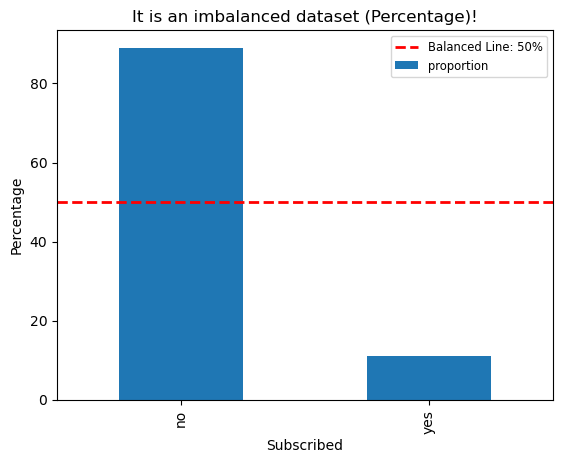

In [78]:
# Step 1: Calculate the percentage distribution
target_counts = df['y'].value_counts(normalize=True) * 100
target_counts = target_counts.round(0)

# Step 2: Print the class distribution in percentages
print("Class Distribution (Percentage)")
print(target_counts)

# Step 3: Calculate the average success percentage
BalancedLine = target_counts.mean()

# Step 4: Visualize the Class Distribution as a percentage with an average line
ax = target_counts.plot(kind='bar', title='It is an imbalanced dataset (Percentage)!', grid=False)
plt.xlabel('Subscribed')
plt.ylabel('Percentage')

# Step 5: Add a Balance Line Reference
plt.axhline(BalancedLine, color='red', linestyle='dashed', linewidth=2, label=f'Balanced Line: {BalancedLine:.0f}%')

# Step 6: Add a legend with a smaller font size
plt.legend(loc='upper right', fontsize='small')

# Step 7: Show the plot
plt.show()

### Problem 4: Understanding the Task and Methodology

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective**

Predict whether direct marketing campaingns result in a subscribed term deposit using 19 predictors

CRISP-DM Steps taken in the applciation: 

1. EDA and Data Preprocessing
Handle Missing and Duplicate Values: Ensure thorough handling of missing data (imputation, removal) and check for duplicates.
Understand the Balance of Dataset: Check class distribution and handle imbalanced datasets using techniques adjust the class_weight of classifers. 

2. Feature Selection Techniques
Visualization and Plots: Use histograms, boxplots, and pair plots to understand distributions and relationships.
Correlation Analysis: Analyze correlations between numerical features and the target variable. Use heatmaps to visualize correlations.
Statistical Tests: Perform t-tests for numerical features and Chi-square tests for categorical features to determine significance.
Model-Based Selection: Use Random Forest models to identify top important features.

3. Feature Engineering Techniques
Encoding Categorical Variables: Use one-hot encoding, label encoding, or target encoding based on the nature of the categorical data.
Transformation of Numerical Variables: Apply log transformation, and binning for skewed distributions.


3. Model Training
Train and evaluate multiple classification models to determine which one performs best from each using grid search. 

Random Forest
Logistic Regression
Decision Tree
K-Nearest Neighbors (KNN)
Support Vector Machine (SVM)

4. Model Evaluation
Train-test split: Divide the data into training and testing sets.
Cross-validation: Use 5 fold to ensure the model’s robustness.
Evaluation metrics: Use accuracy, precision, recall, F1-score, and ROC-AUC to evaluate model performance.
Visualizations for all four models if possible, especially for SMV using different kernals as videish suggested. 
diferent paramerters to select decision trees, depth, number of . etc. 

5. Model Interpretation
Coefficient analysis (for logistic regression): Interpret the coefficients to understand the impact of each predictor.
Feature importance (for decision tree): Assess the importance of each feature in decision-making.



In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [80]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [81]:
df.duplicated().sum()

12

In [82]:
df.drop_duplicates(inplace  = True)

In [83]:
df.shape

(41176, 21)

## EDA.1 Explore on Categorical Varaibles and Response Variable

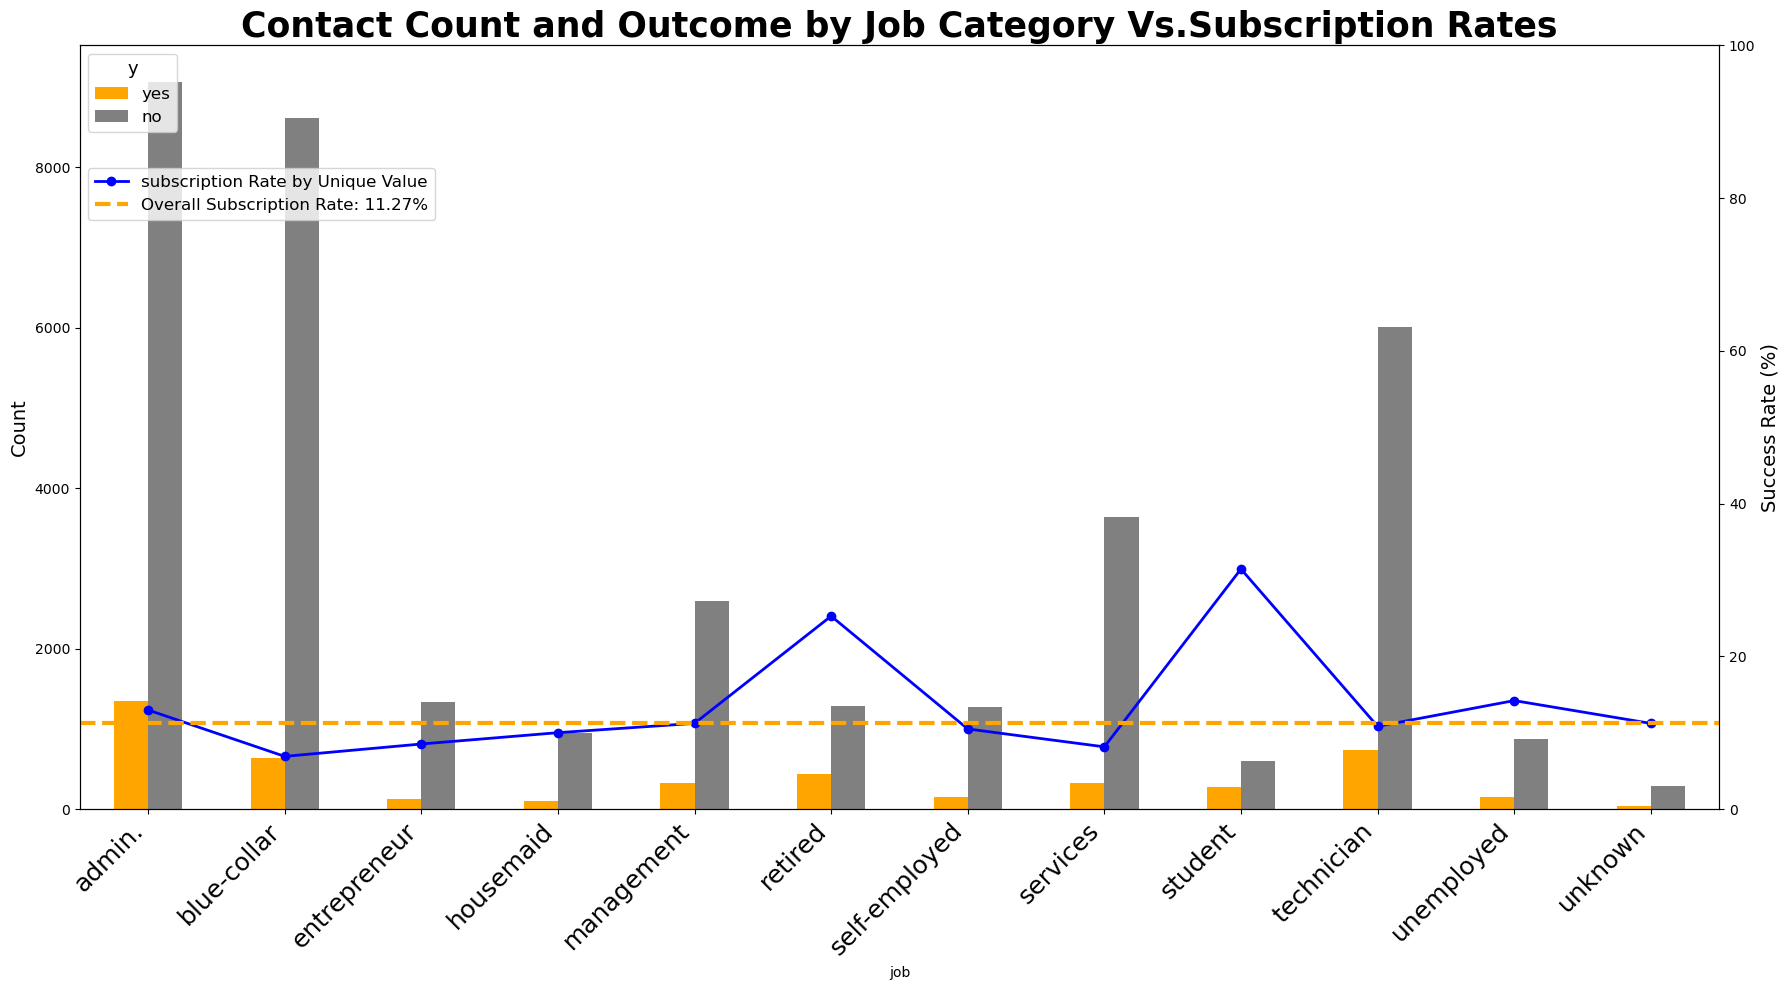

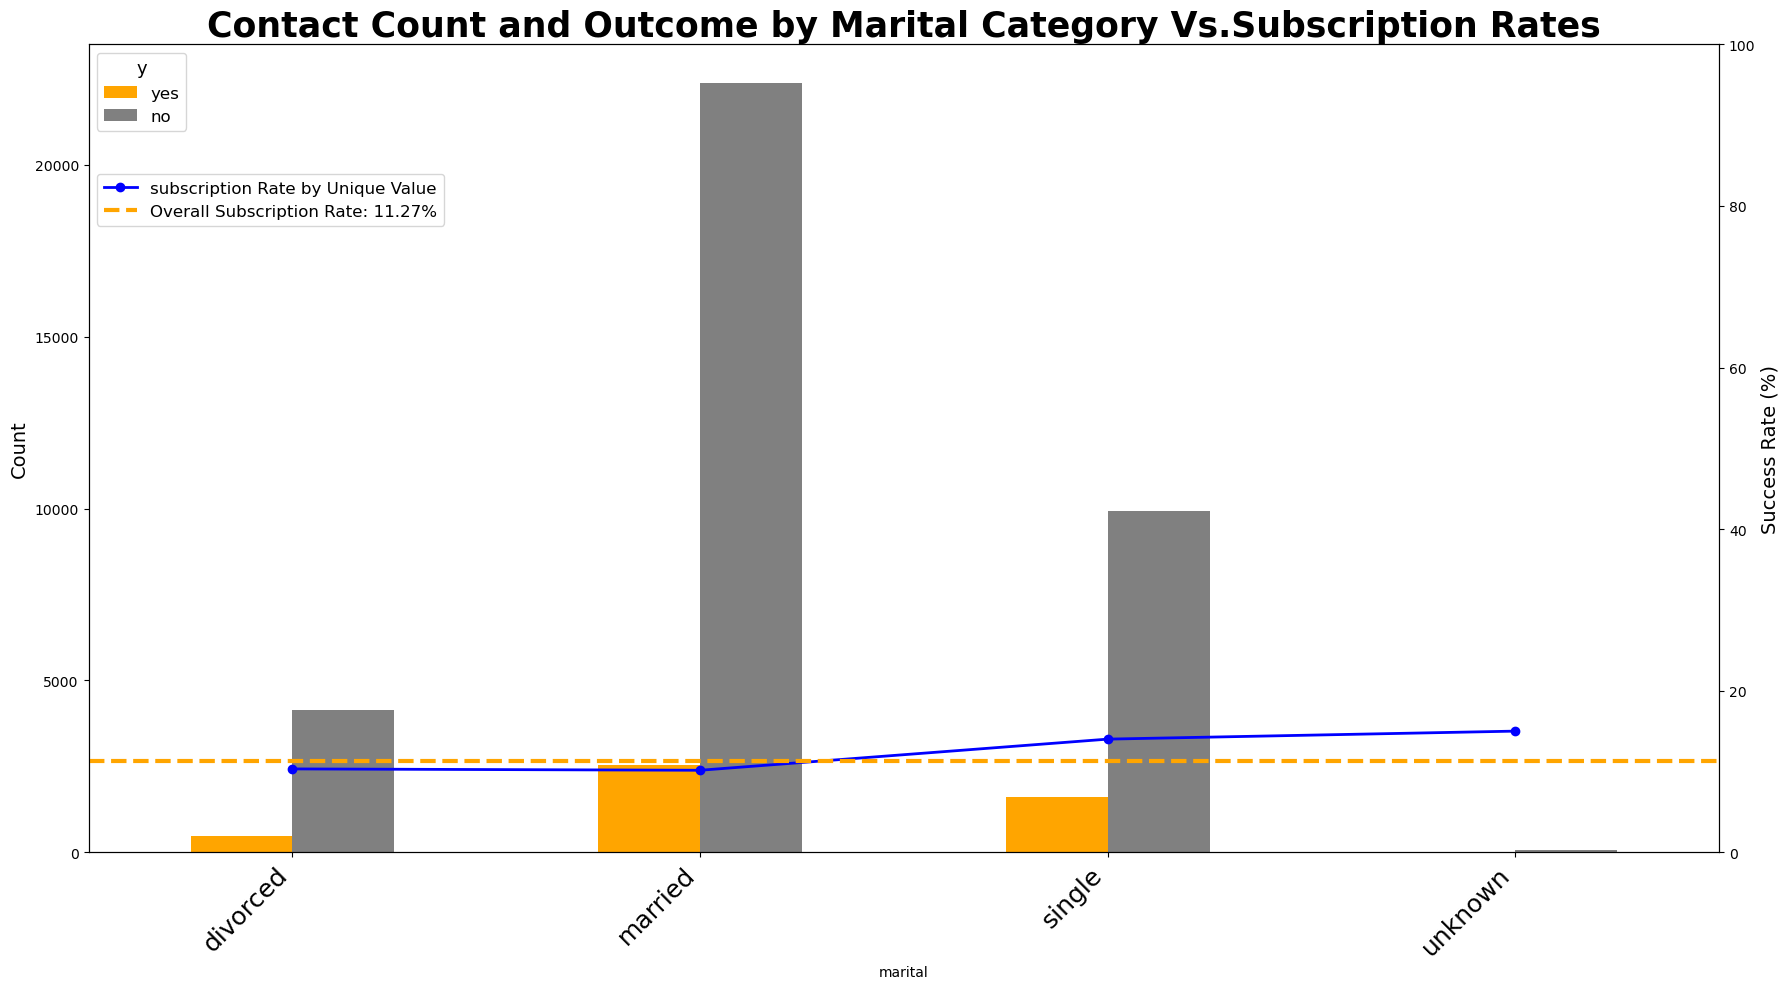

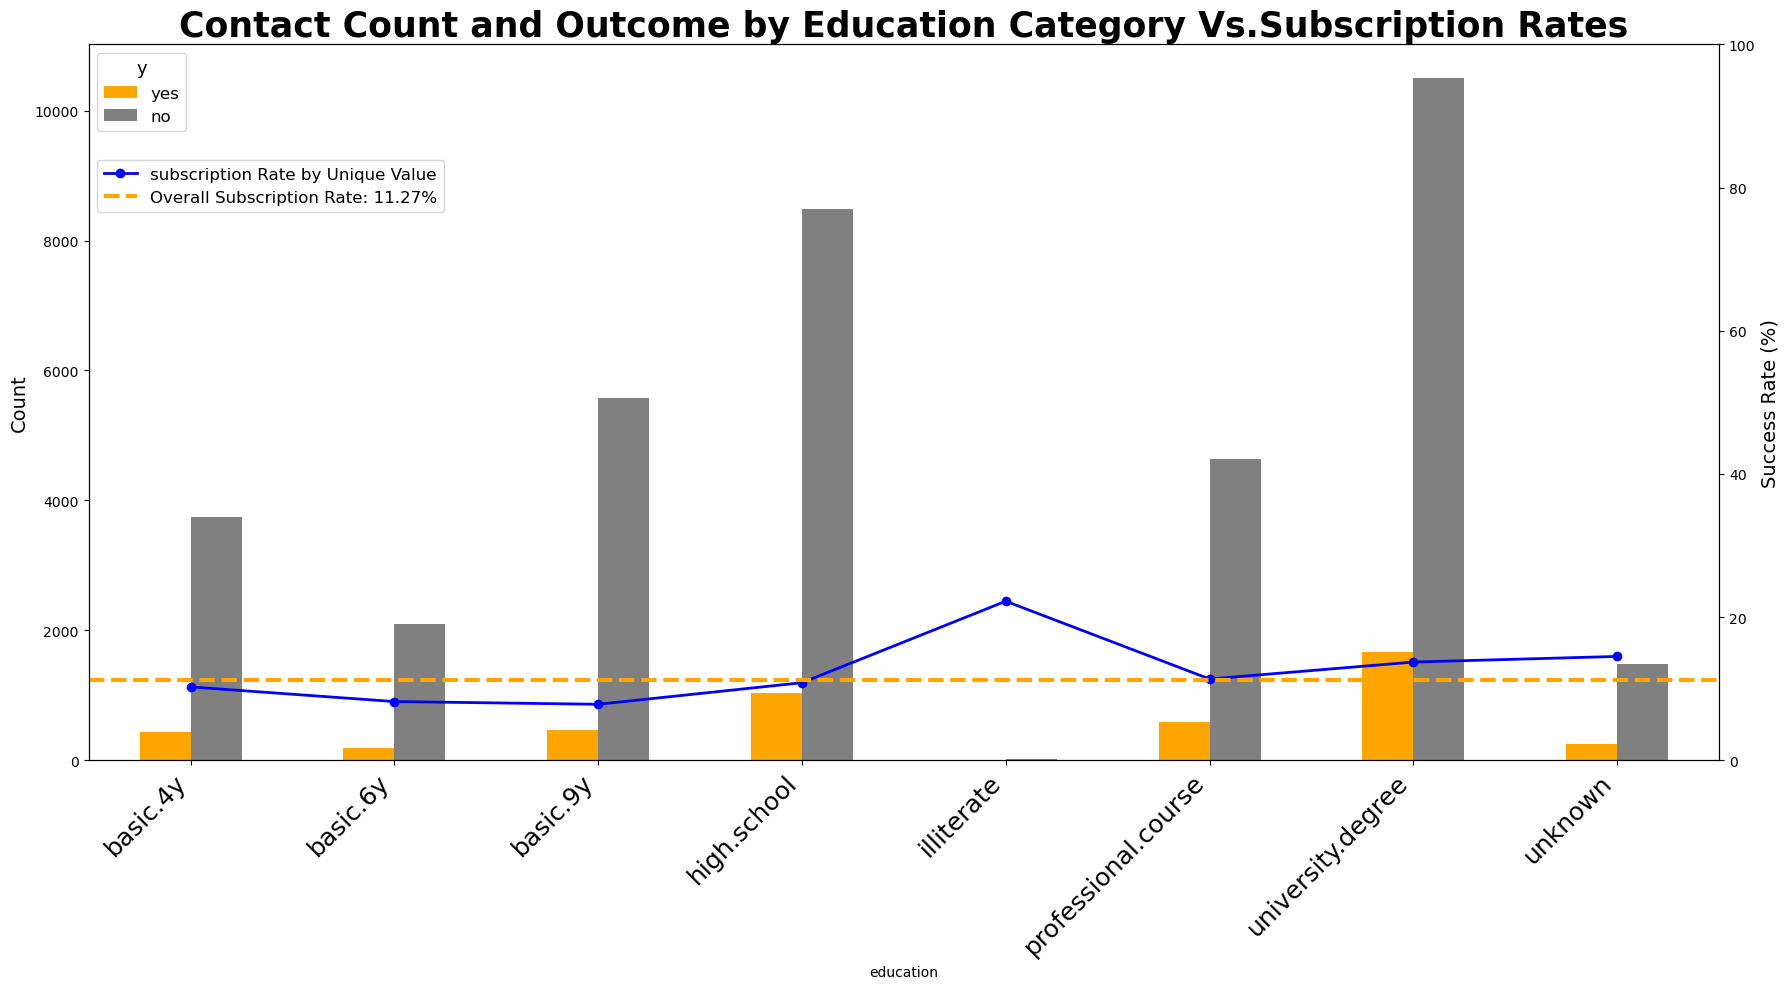

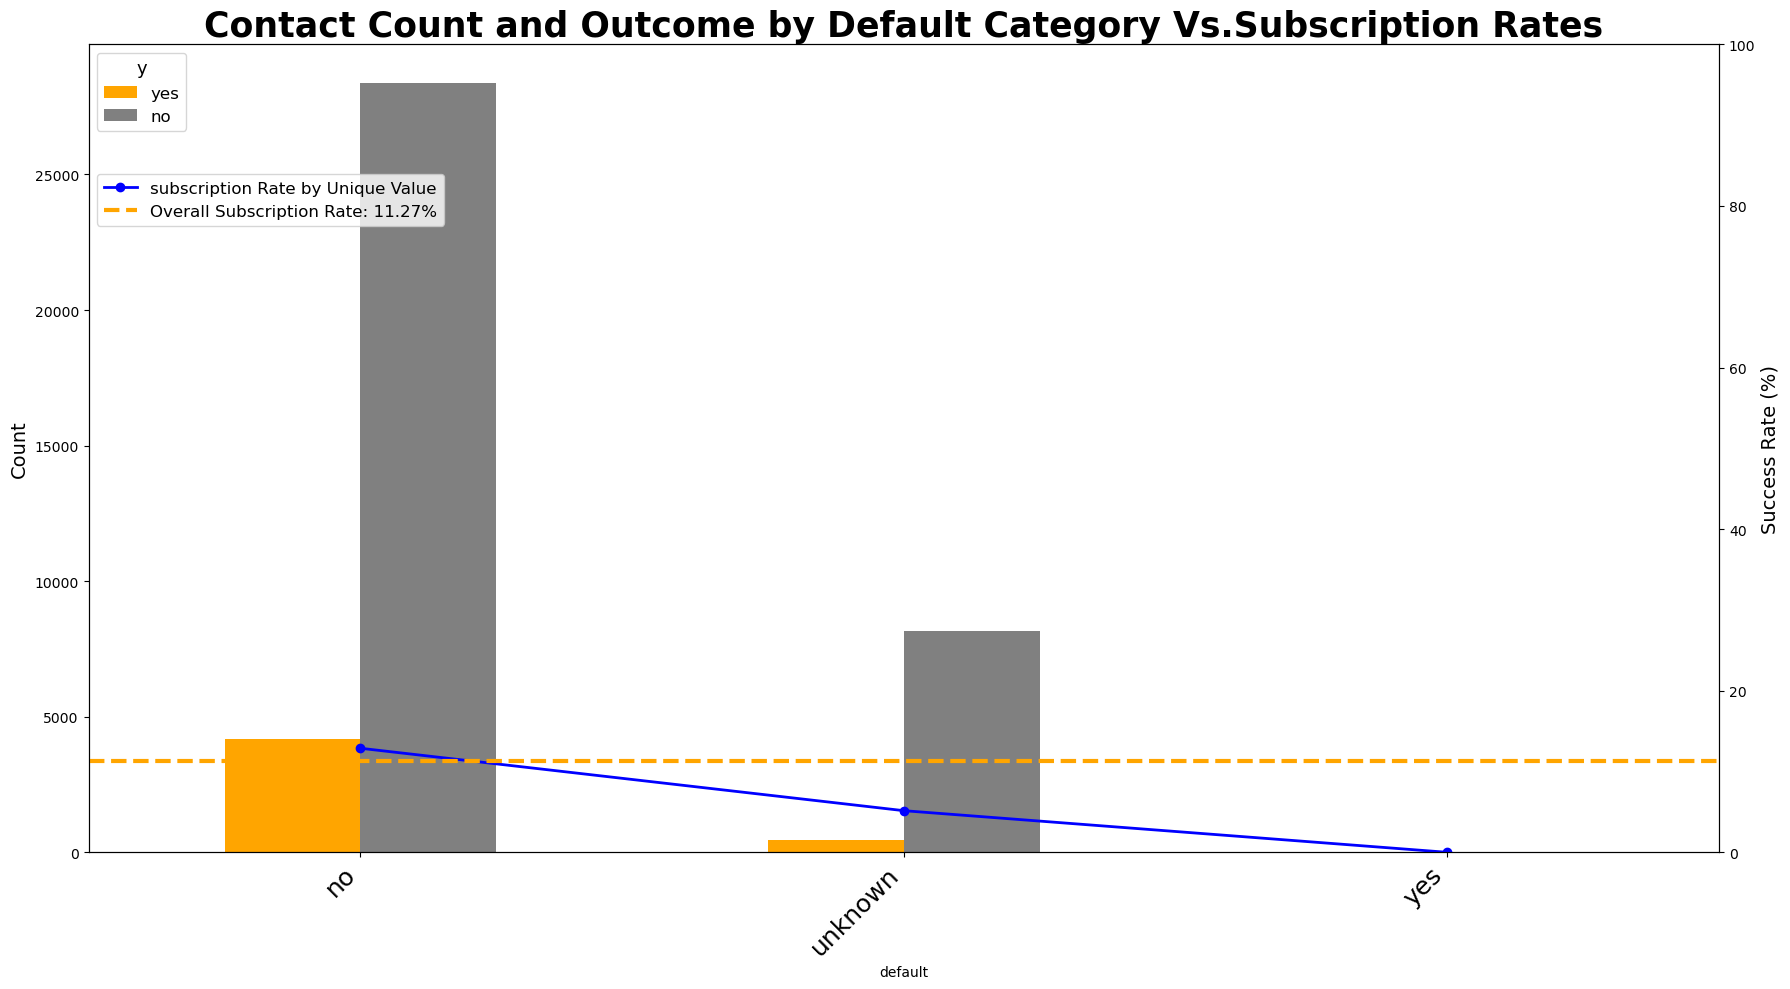

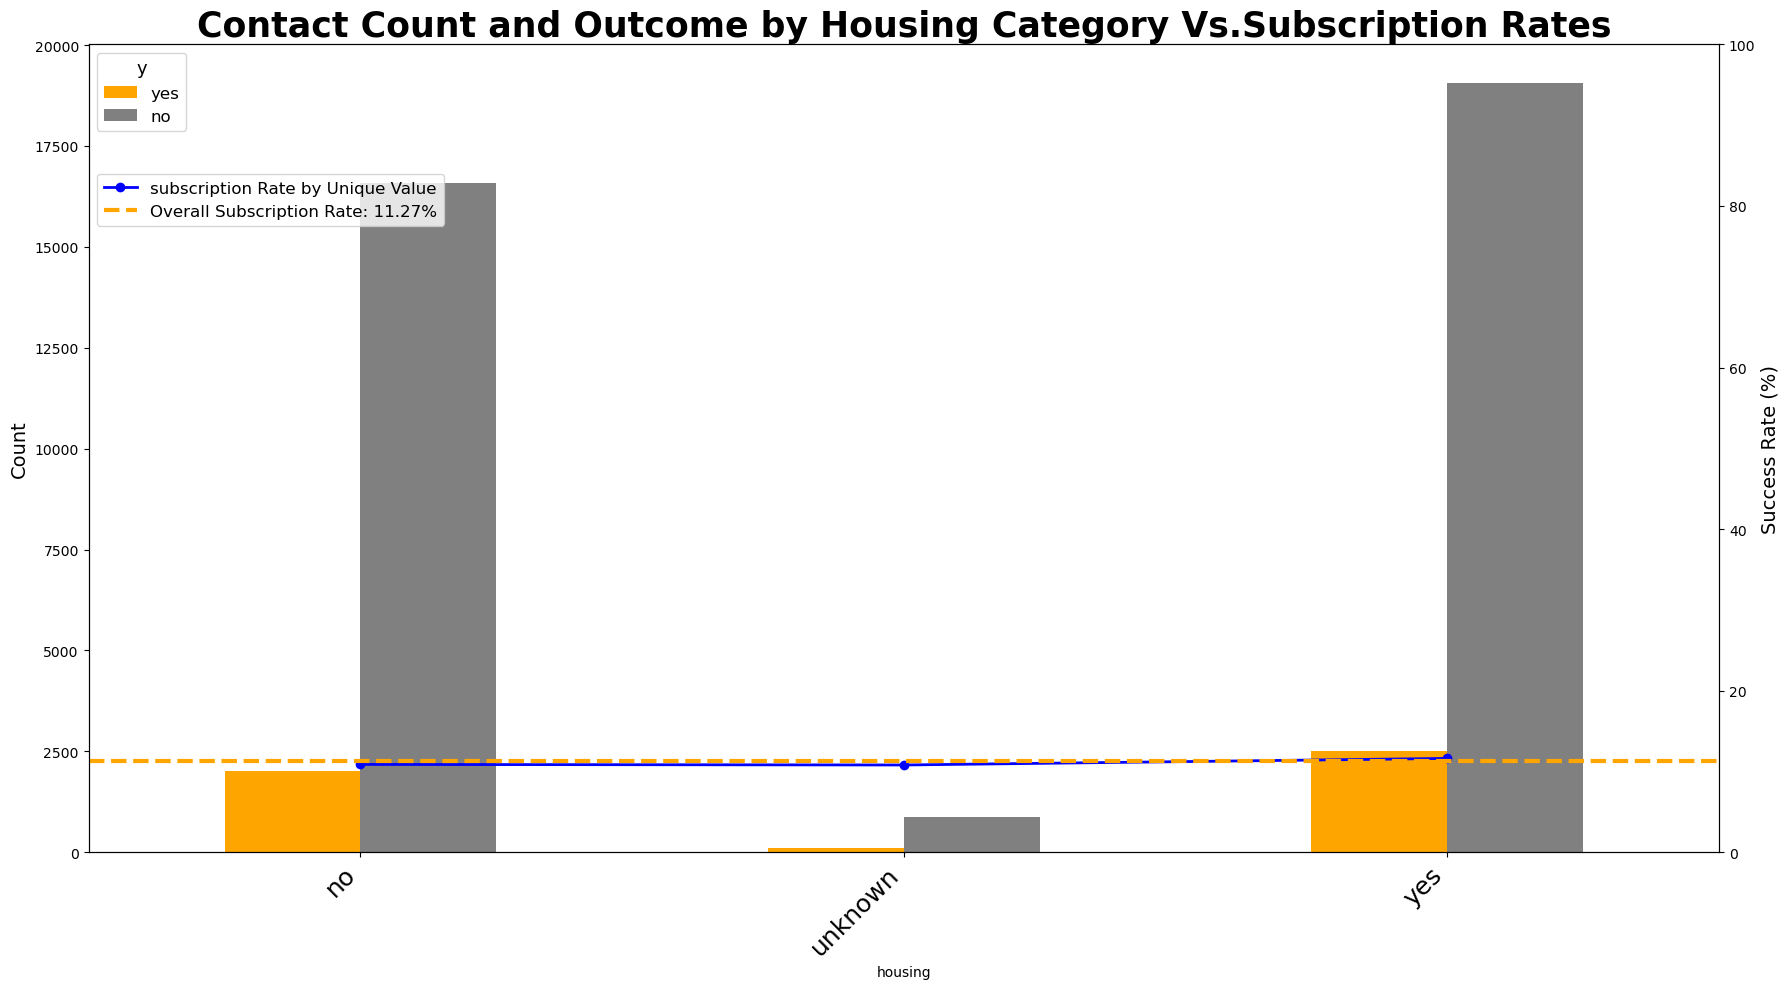

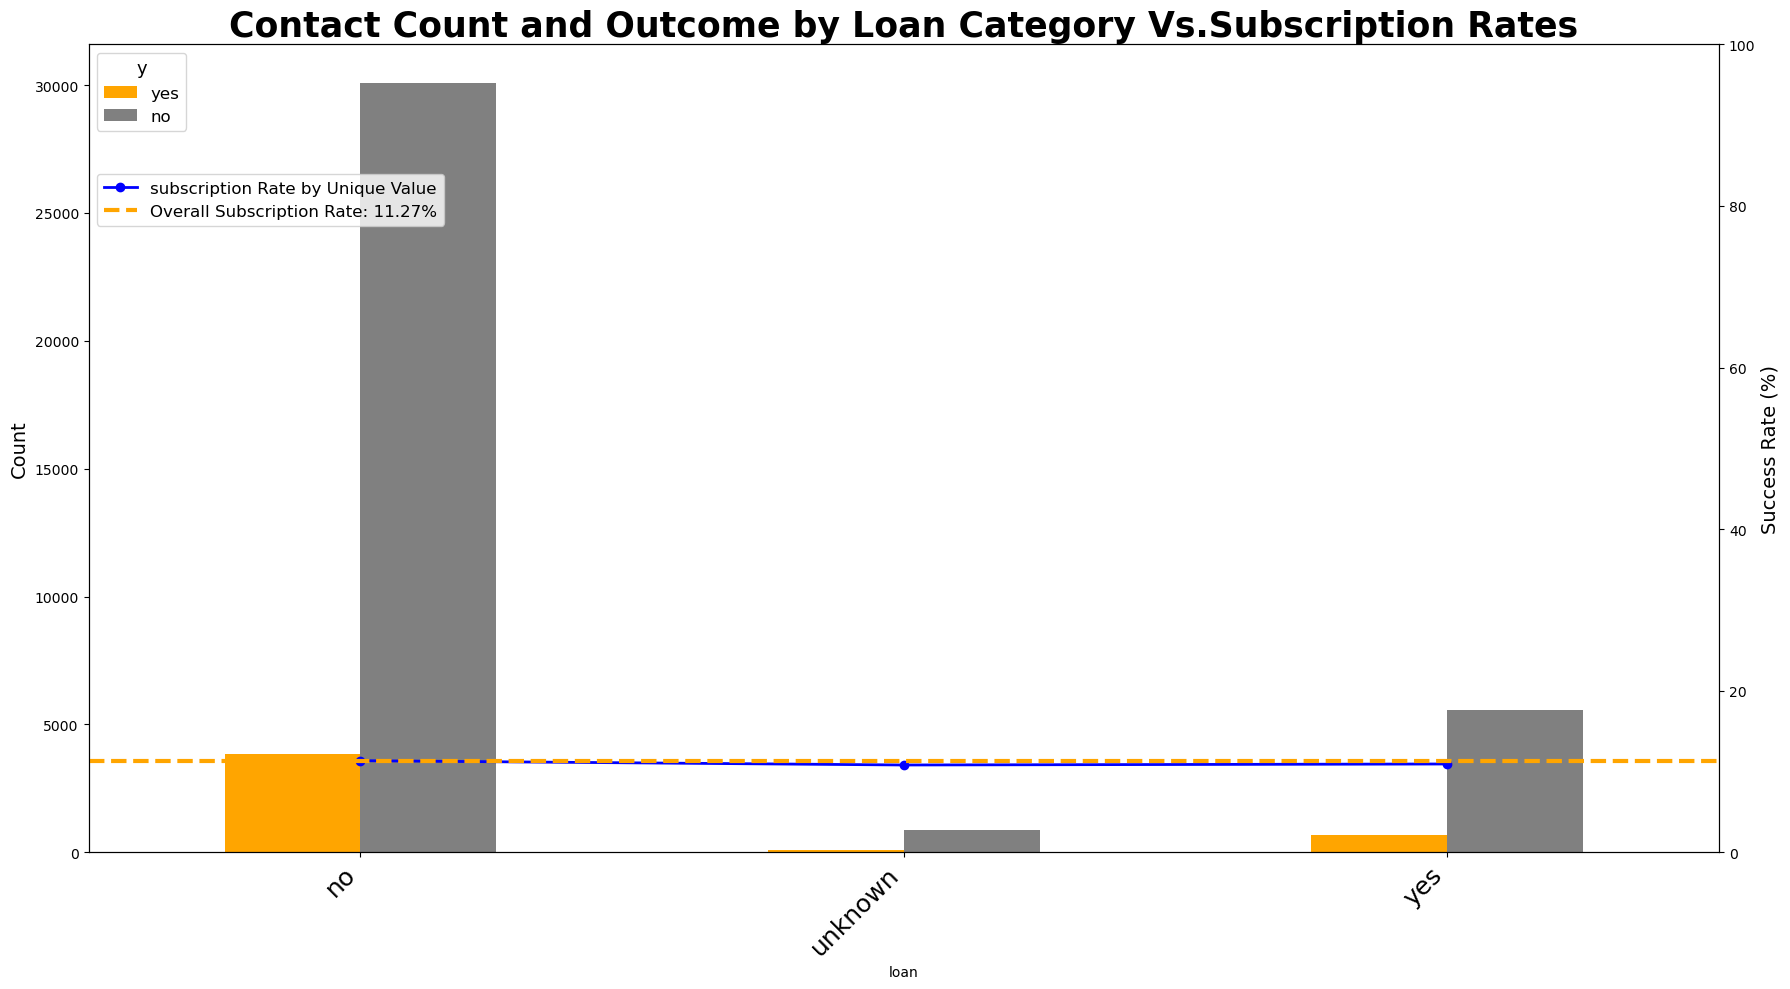

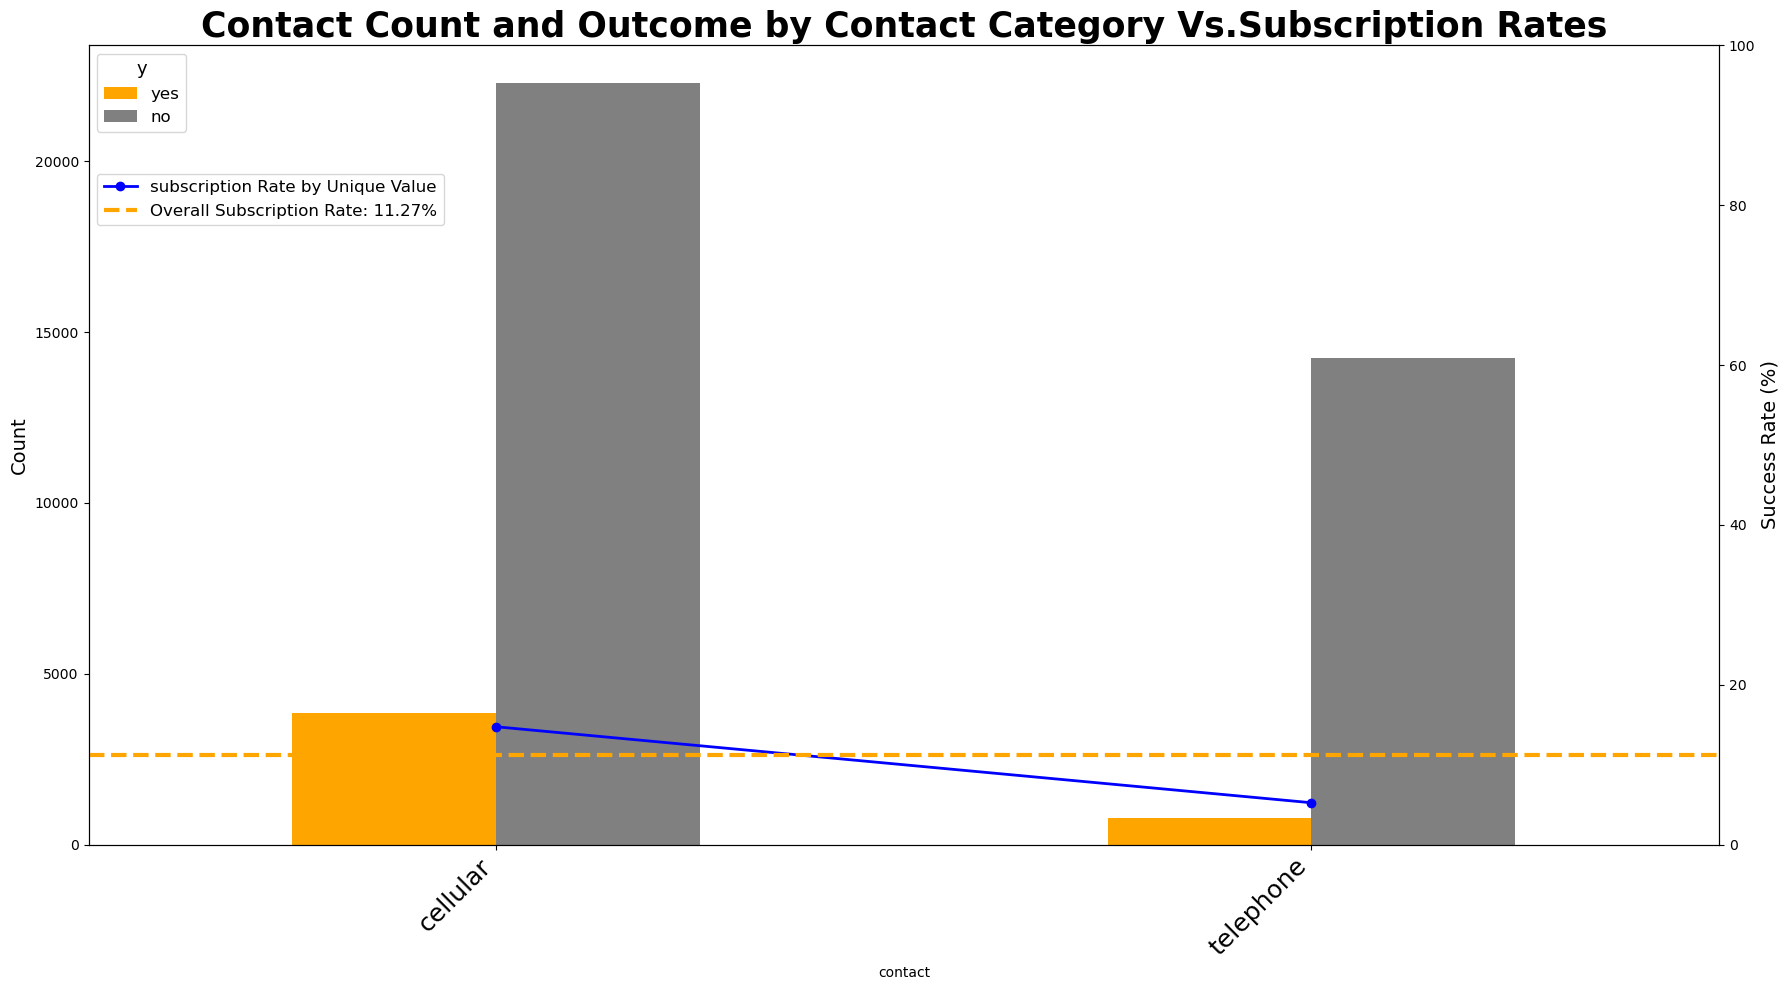

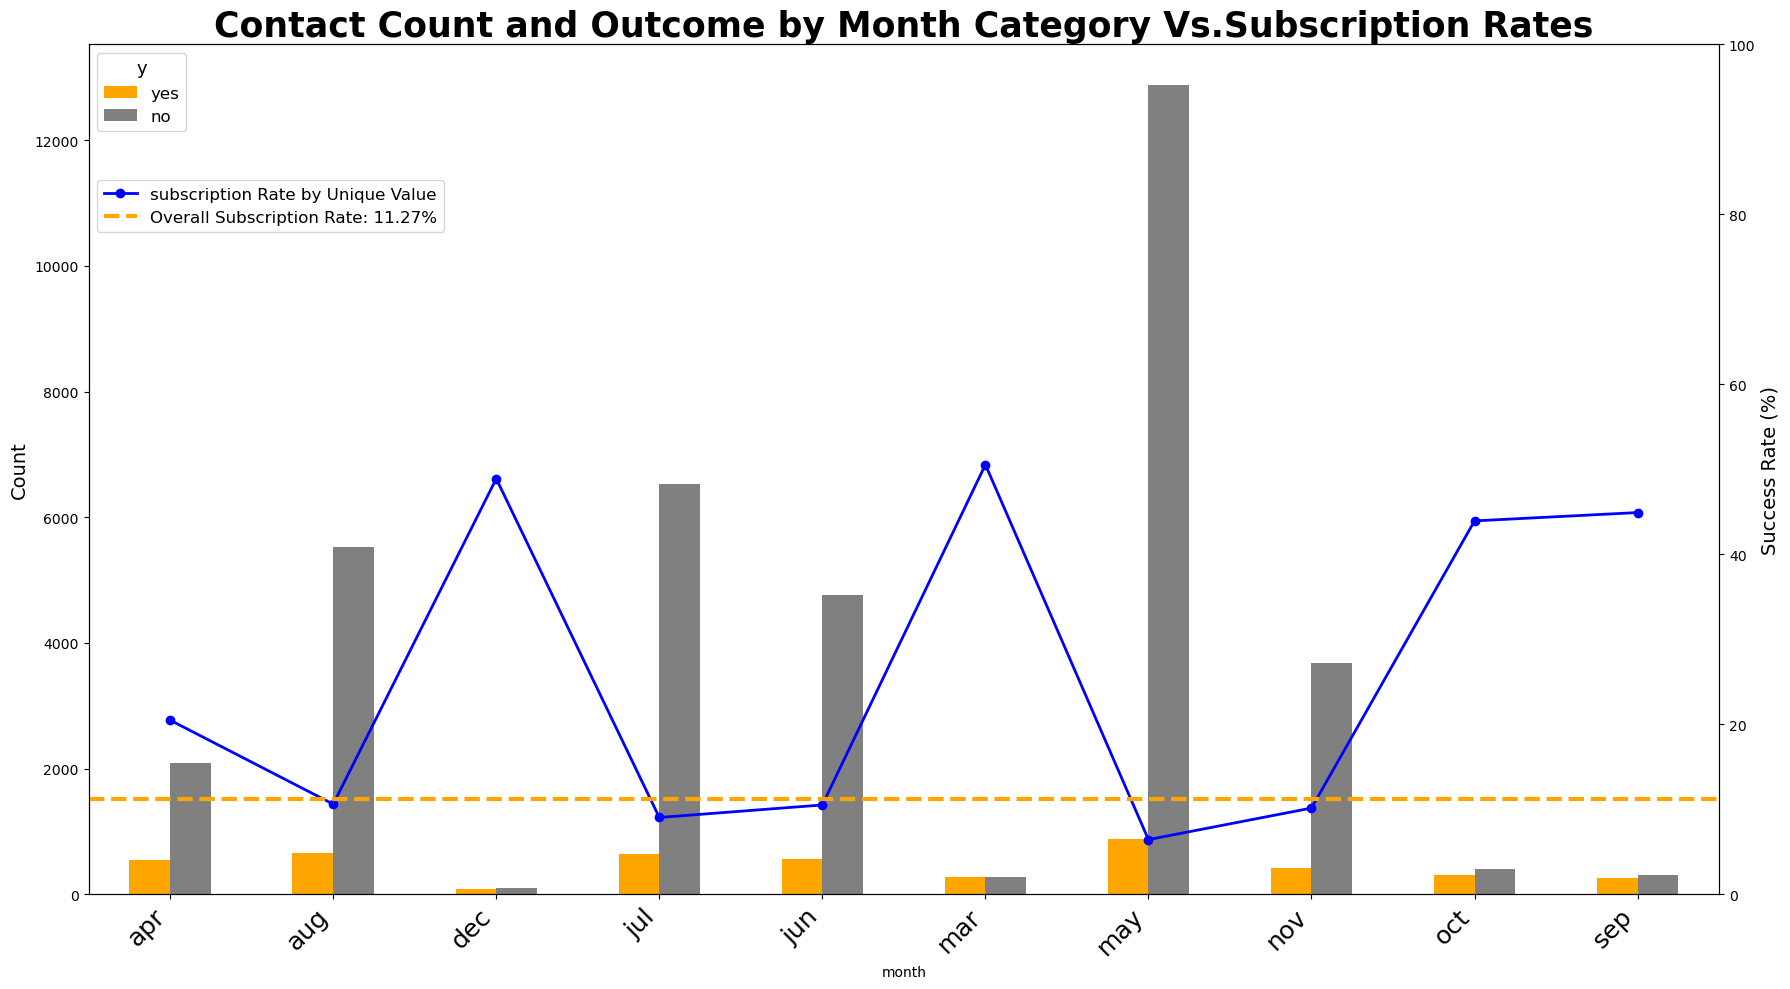

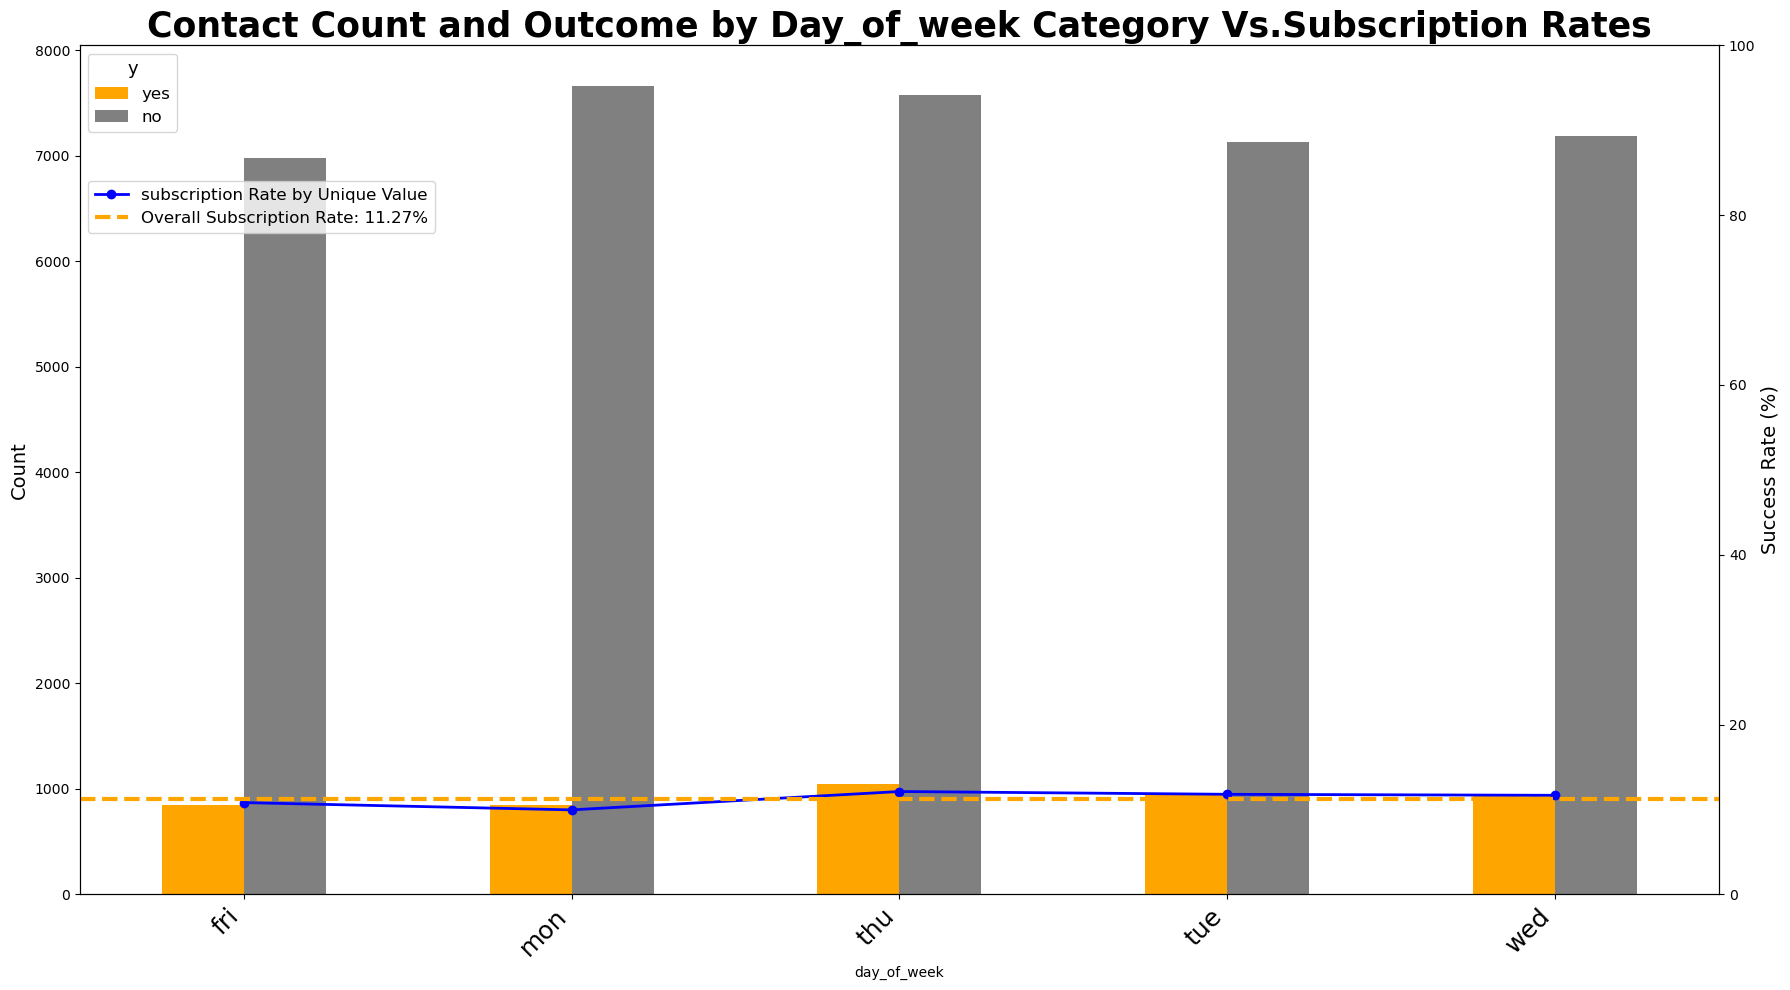

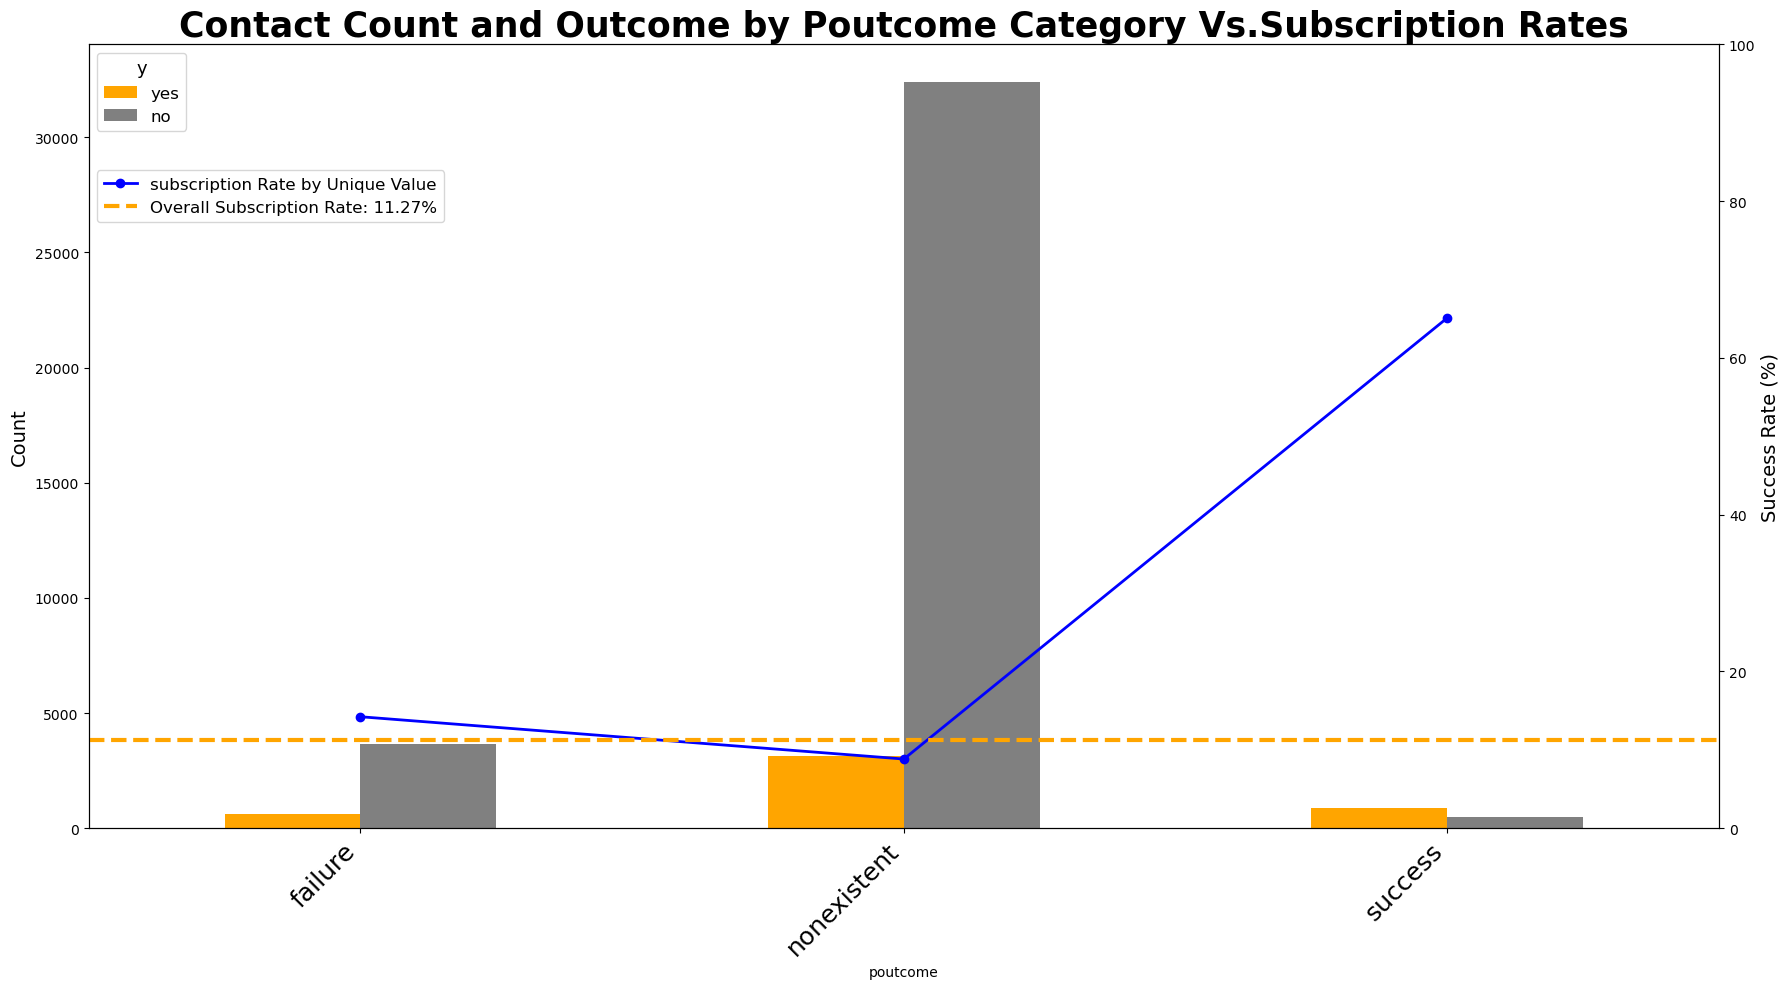

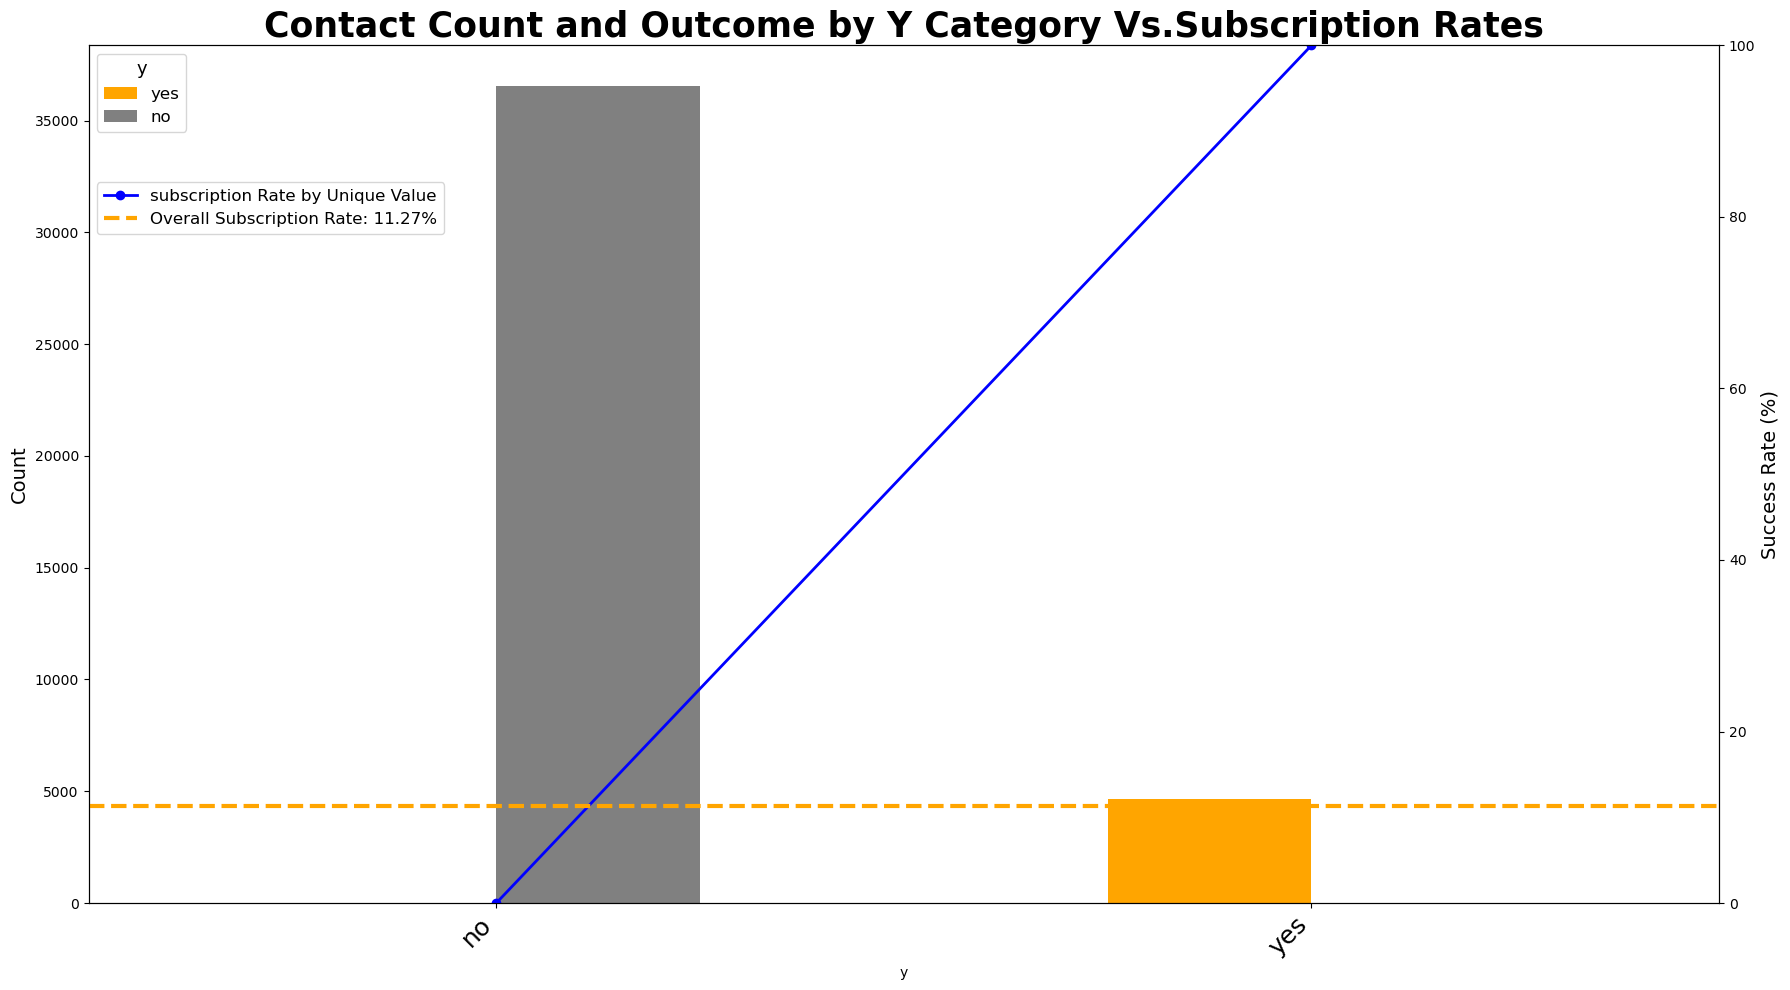

In [84]:
# Using customized colors to differentiate the outcomes: Yes or No
colors = ['orange', 'gray']

# Calculate the overall success rate
overall_success_rate = df['y'].value_counts(normalize=True)['yes'] * 100

# Create a list of categorical columns to plot
categorical_columns = df.select_dtypes(include='object').columns

# Function to plot counts and success rates
def plot_counts_and_success_rates(df, col):
    # Calculate the counts for each category
    category_counts = df.groupby([col, 'y']).size().unstack().fillna(0)
    
    # Ensure the 'yes' category is at the bottom
    category_counts = category_counts[['yes', 'no']]
    
    # Calculate total counts for each category
    total_counts = category_counts.sum(axis=1)
    
    # Calculate success counts for 'yes' responses
    success_counts = category_counts['yes']
    
    # Calculate success rates correctly
    success_rates = (success_counts / total_counts).fillna(0) * 100

    fig, ax1 = plt.subplots(figsize=(18, 10))

    # Plot counts as side-by-side bar chart
    category_counts.plot(kind='bar', color=colors, ax=ax1, position=0.5)
    ax1.set_ylabel('Count', fontsize=14)
    ax1.set_title(f'Contact Count and Outcome by {col.capitalize()} Category Vs.Subscription Rates', fontsize=25, weight='bold')

    # Plot success rates
    ax2 = ax1.twinx()
    ax2.plot(success_rates.index, success_rates.values, color='blue', marker='o', linestyle='-', linewidth=2, label='subscription Rate by Unique Value')
    ax2.set_ylabel('Success Rate (%)', fontsize=14)
    ax2.set_ylim(0, 100)

    # Add overall success rate line
    ax2.axhline(overall_success_rate, color='orange', linestyle='--', linewidth=3, label=f'Overall Subscription Rate: {overall_success_rate:.2f}%')

    # Adjust x-axis labels
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=18)

    # Adjust legends
    ax1.legend(title='y', loc='upper left', fontsize=12, title_fontsize='13')
    ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.85), fontsize=12)

    fig.tight_layout()
    plt.show()

# Plot for each categorical column
for col in categorical_columns:
    plot_counts_and_success_rates(df, col)


**Findings and recommendation next steps

1) Job, education, contact, previous outcome, and month appear to be more influential in determining the outcome.

2) Housing, loan, and day of the week do not contribute to the success at all; their success rates are equal to the overall success rate.

3) Marital status and default have a slight influence on the outcome.



## Highlighted Findings and Insights from Categorical Variables

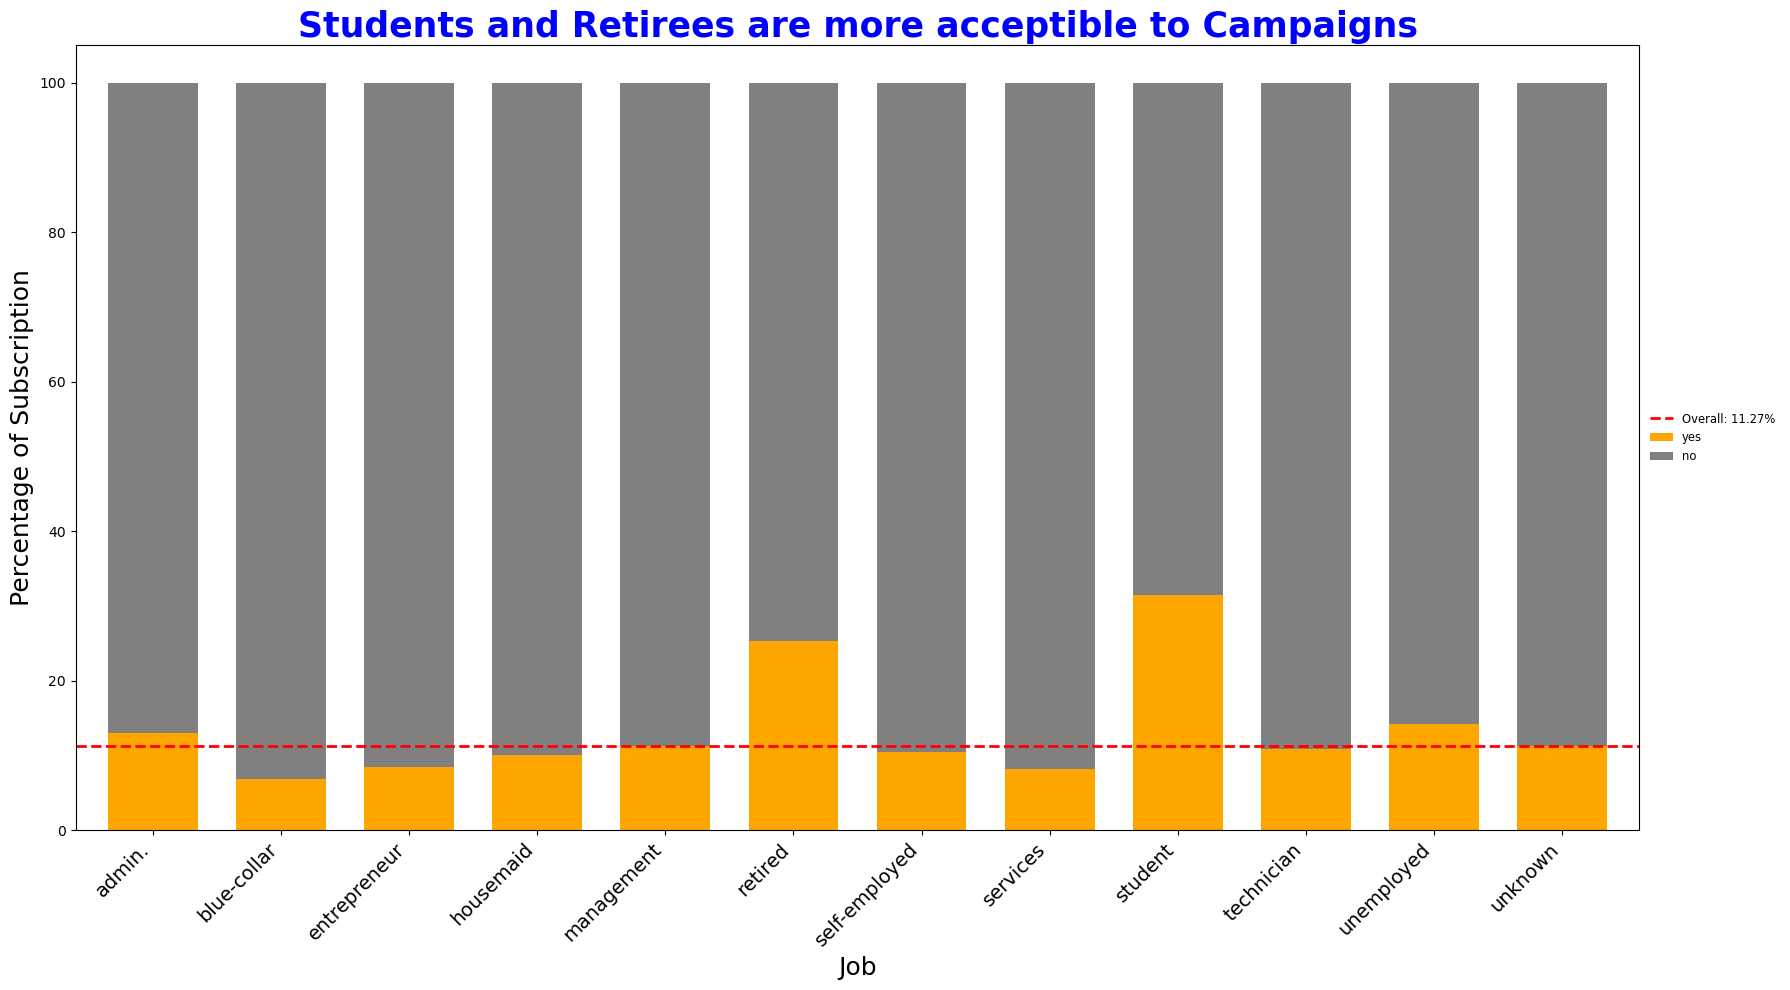

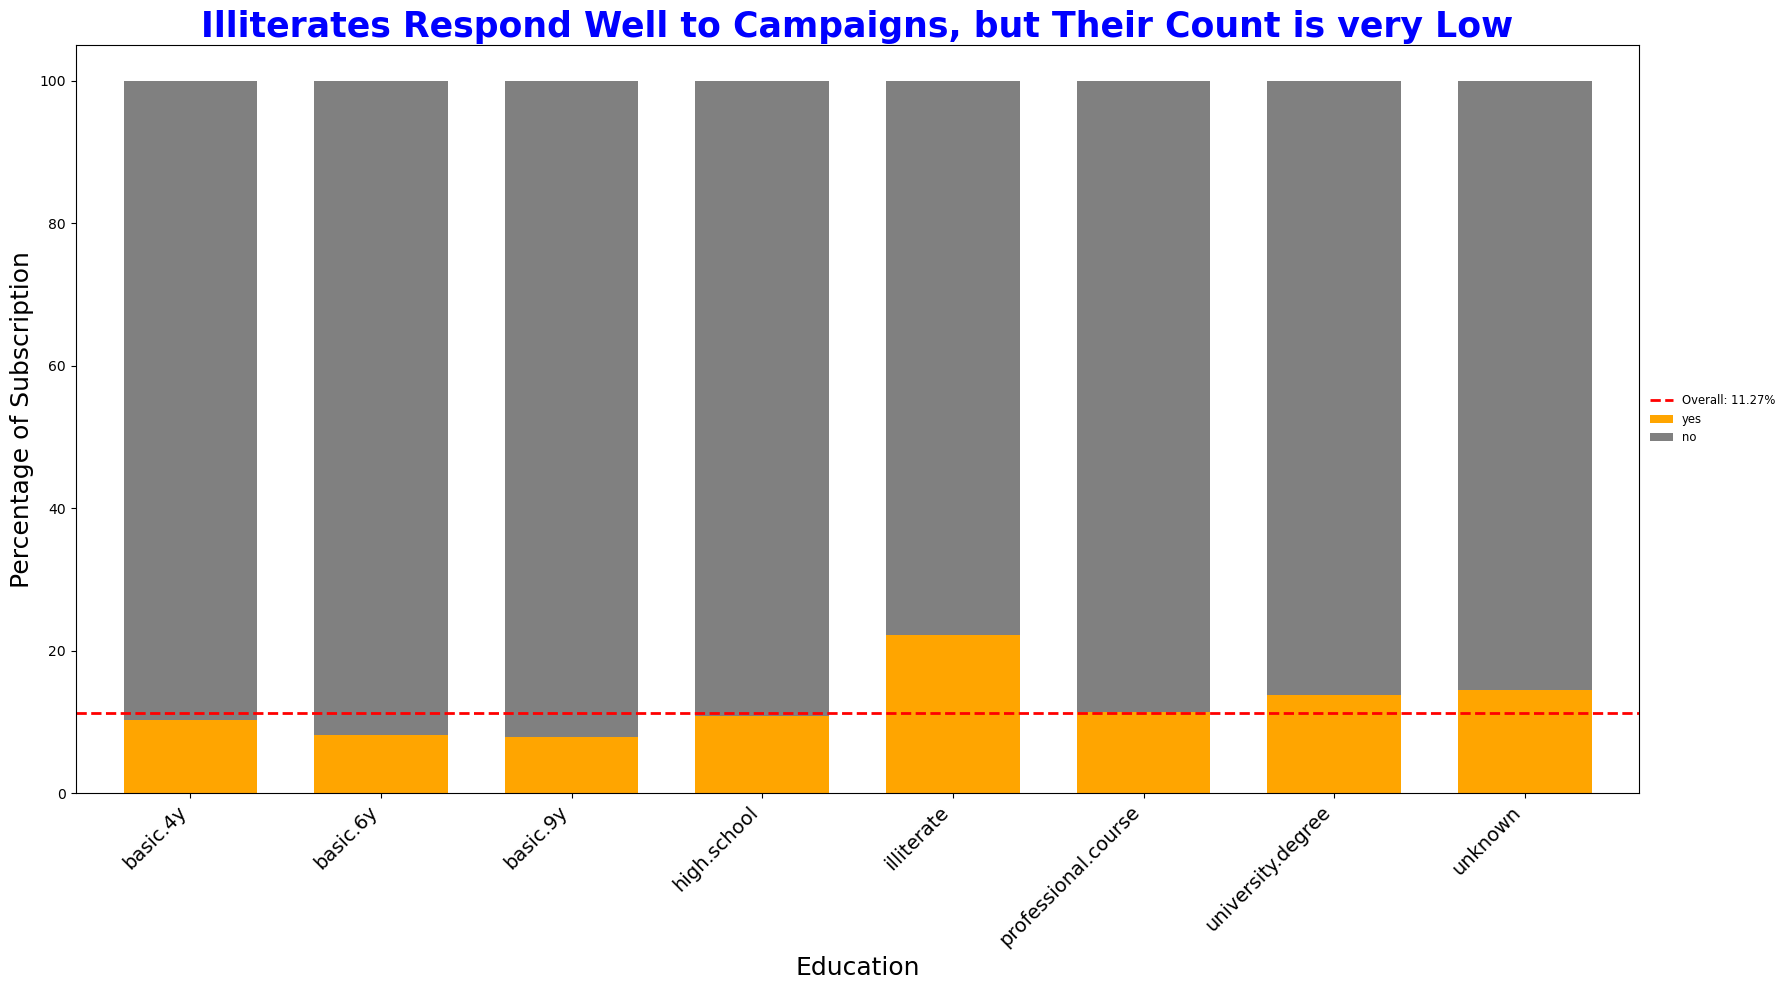

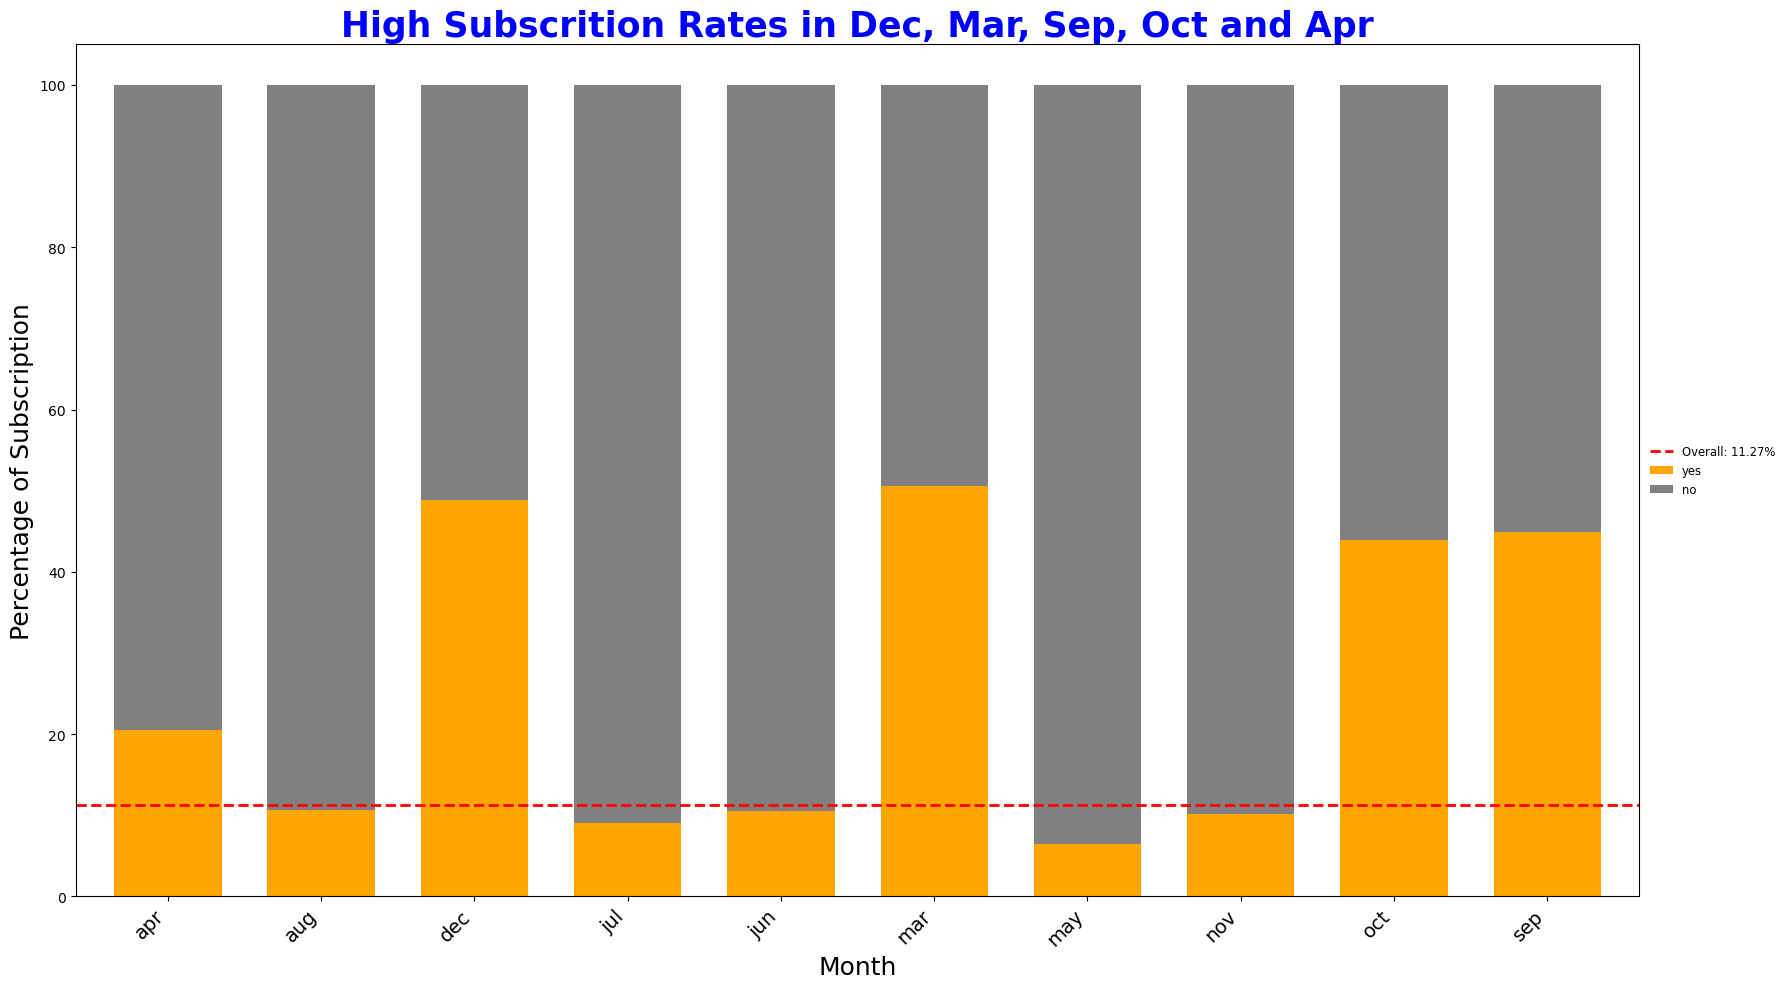

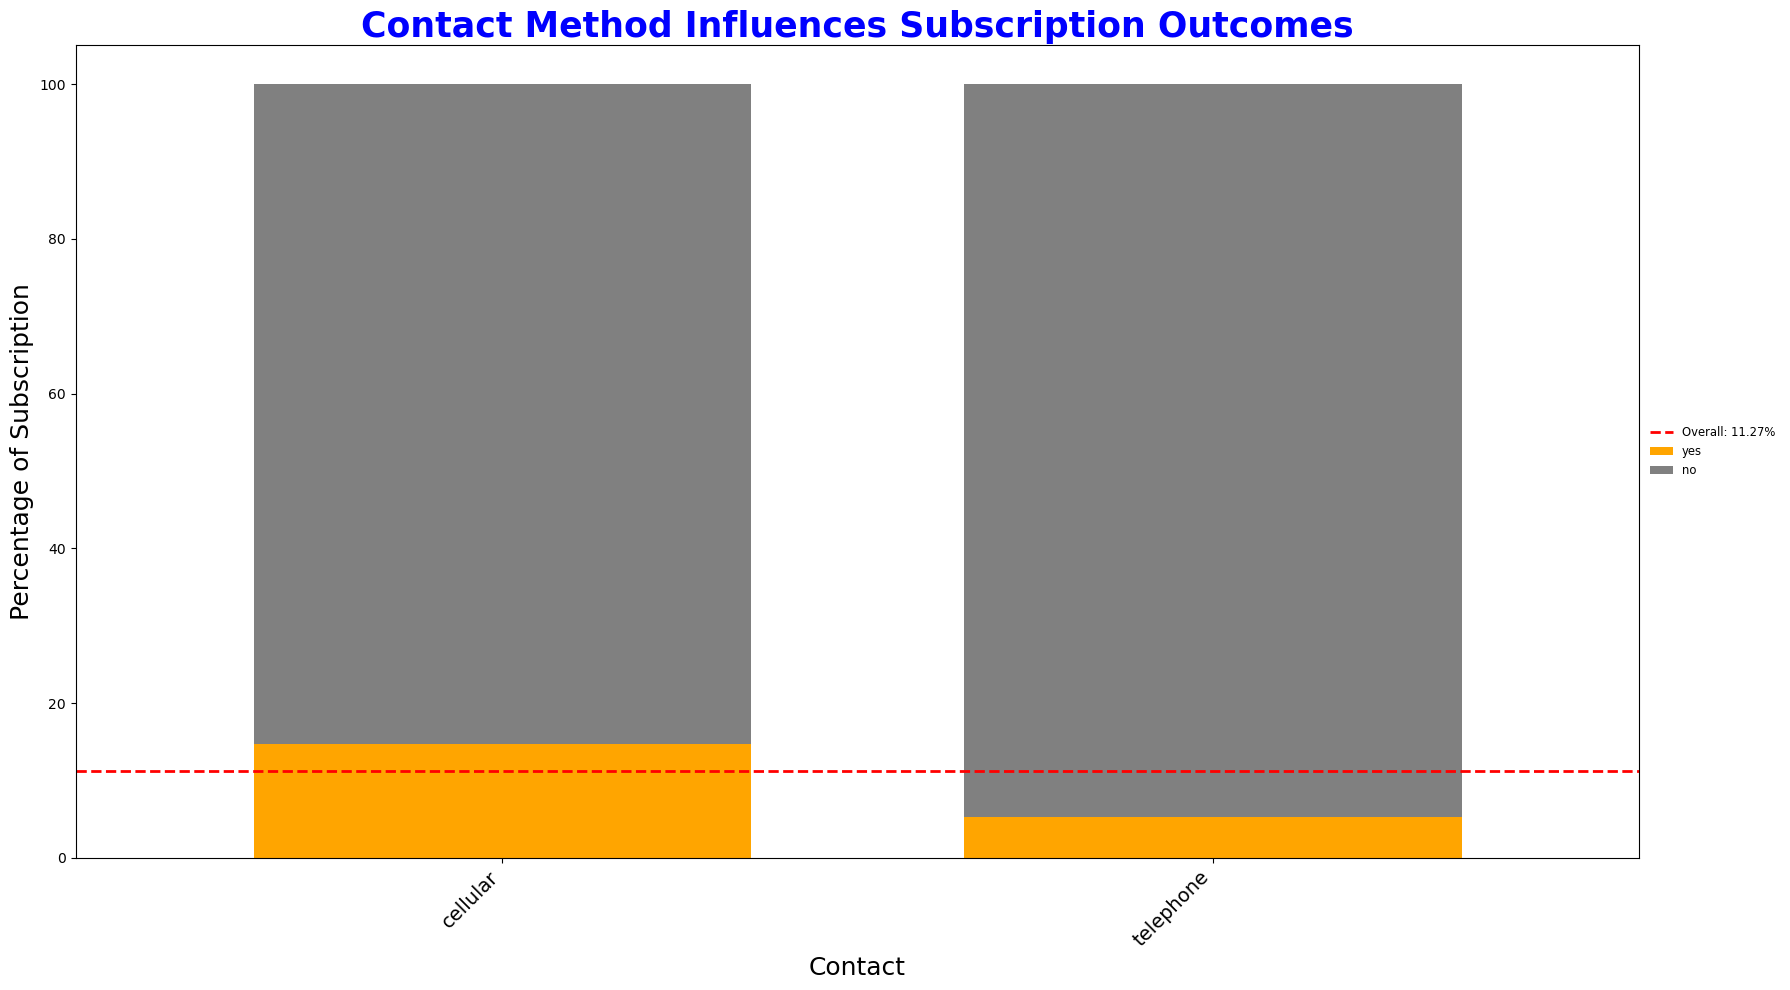

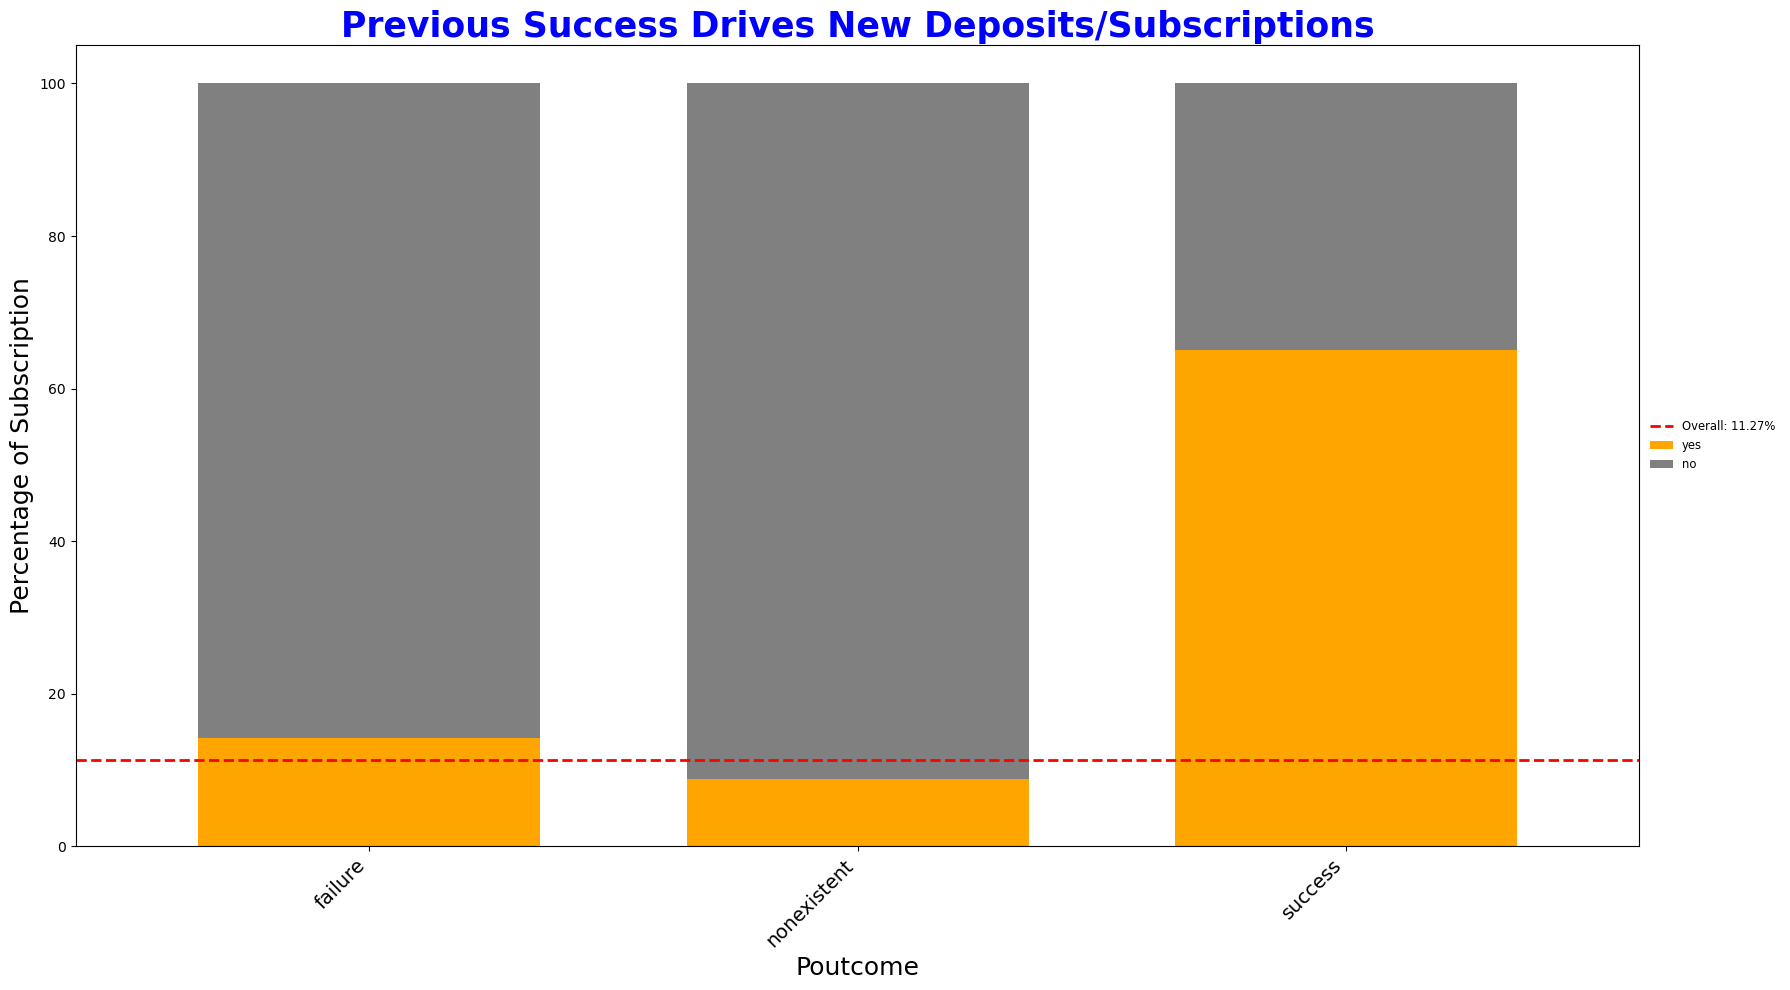

In [85]:
# Using customized colors to differentiate the outcomes: Yes or No
colors = ['orange', 'gray']

# Create a list of selected categorical columns to plot
selected_columns = ['job', 'education', 'month', 'contact', 'poutcome']

# Define concise custom titles for each plot
titles = {
    'job': "Students and Retirees are more acceptible to Campaigns",
    'education': "Illiterates Respond Well to Campaigns, but Their Count is very Low",
    'month': "High Subscrition Rates in Dec, Mar, Sep, Oct and Apr",
    'poutcome': "Previous Success Drives New Deposits/Subscriptions",
    'contact': "Contact Method Influences Subscription Outcomes"
}

# Function to plot stacked bar charts with success rates
def plot_stacked_bars(df, col):
    # Calculate the normalized counts for each category
    category_counts = df.groupby([col, 'y']).size().unstack().fillna(0)
    category_counts = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
    
    # Ensure the 'yes' category is at the bottom
    category_counts = category_counts[['yes', 'no']] if 'yes' in category_counts.columns and 'no' in category_counts.columns else category_counts
    
    ax = category_counts.plot(kind='bar', stacked=True, color=colors, width=0.7, figsize=(18, 10))  # Adjust bar width and size
    
    plt.title(titles[col], fontsize=25, weight = 'bold', color = 'blue')  # Use the concise custom title for each plot with a larger font size
    plt.xlabel(col.capitalize(), fontsize=18)
    plt.ylabel('Percentage of Subscription', fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=14)  # Adjust the rotation and horizontal alignment
    
    # Add a horizontal line for the overall success rate
    plt.axhline(overall_success_rate, color='red', linestyle='dashed', linewidth=2, label=f'Overall: {overall_success_rate:.2f}%')
    
    # Adjust the legend to be on the side with reduced font size
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', frameon=False)
    
    plt.tight_layout()
    plt.show()

# Plot for each selected categorical column
for col in selected_columns:
    plot_stacked_bars(df, col)

### Proposed Steps For Data Preparation and Feature Engineering ( Categorical) 

**Job Category: Encoding 

Insight: Different job categories have varying subscription rates.

Action:
Encoding: Apply one-hot encoding to convert the categorical job feature into multiple binary features.
Binning: Consider binning less frequent job categories into an "Other" category to reduce dimensionality.

**Marital Status: Encoding

Insight: Marital status shows some influence on subscription rates.

Action:
Encoding: Apply one-hot encoding to convert the categorical marital status feature into multiple binary features.

**Education: Encoding

Insight: Different education levels have varying subscription rates.
Action:
Encoding: Apply one-hot encoding to convert the categorical education feature into multiple binary features.

**Default: Feature Importance: Exclude it for second round of Modelling. 

Insight: The default status has minimal influence on subscription rates.
Action:
Feature Importance: Evaluate the importance of the default feature in your model and consider excluding it if it does not significantly contribute to prediction accuracy.

Housing: Encoding

Insight: Housing loan status shows some influence on subscription rates.
Action:
Encoding: Apply one-hot encoding to convert the categorical housing loan feature into multiple binary features.

Personal Loan: Encoding

Insight: Personal loan status shows some influence on subscription rates.
Action:
Encoding: Apply one-hot encoding to convert the categorical personal loan feature into multiple binary features.

Contact: Encoding

Insight: Different contact types have varying subscription rates.
Action:
Encoding: Apply one-hot encoding to convert the categorical contact feature into multiple binary features.

Month: Encoding

Insight: The month of contact has a significant influence on subscription rates.
Action:
Encoding: Apply one-hot encoding to convert the categorical month feature into multiple binary features.
Cyclic Feature Encoding: Alternatively, consider cyclic encoding for the month to capture the cyclic nature of months in a year.

Day of the Week: Feature Importance

Insight: The day of the week of contact has minimal influence on subscription rates.
Action:
Feature Importance: Evaluate the importance of the day of the week feature in your model and consider excluding it if it does not significantly contribute to prediction accuracy.

Poutcome (Previous Outcome): Encoding

Insight: Previous campaign outcomes significantly influence subscription rates.
Action:
Encoding: Apply one-hot encoding to convert the categorical previous outcome feature into multiple binary features.

## EDA 2: Explore on Numerical Variables and Response Variable

In [86]:
df.describe()
df.describe(percentiles=[0, 0.25, 0.5, 0.75,0.80,0.90,0.95, 0.99,1]) # one can also specify the percentiles

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
0%        17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
80%       49.00000    368.000000      3.000000    999.000000      0.000000   
90%       55.00000    551.000000      5.000000    999.000000      1.000000   
95%       58.00000    753.000000      7.000000    999.000000      1.000000   
99%       71.00000   1271.250000     14.000000    999.000000      2.000000   
100%      98.00000   4918.000000     56.000000    999.000000      7.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
0%        -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
80%        1.400000       93.994000     -36.400000      4.962000   5228.100000  
90%        1.400000       94.465000     -36.100000      4.964000   5228.100000  
95%        1.400000       94.465000     -33.600000      4.966000   5228.100000  
99%        1.400000       94.465000     -26.900000      4.968000   5228.100000  
100%       1.400000       94.767000     -26.900000      5.045000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

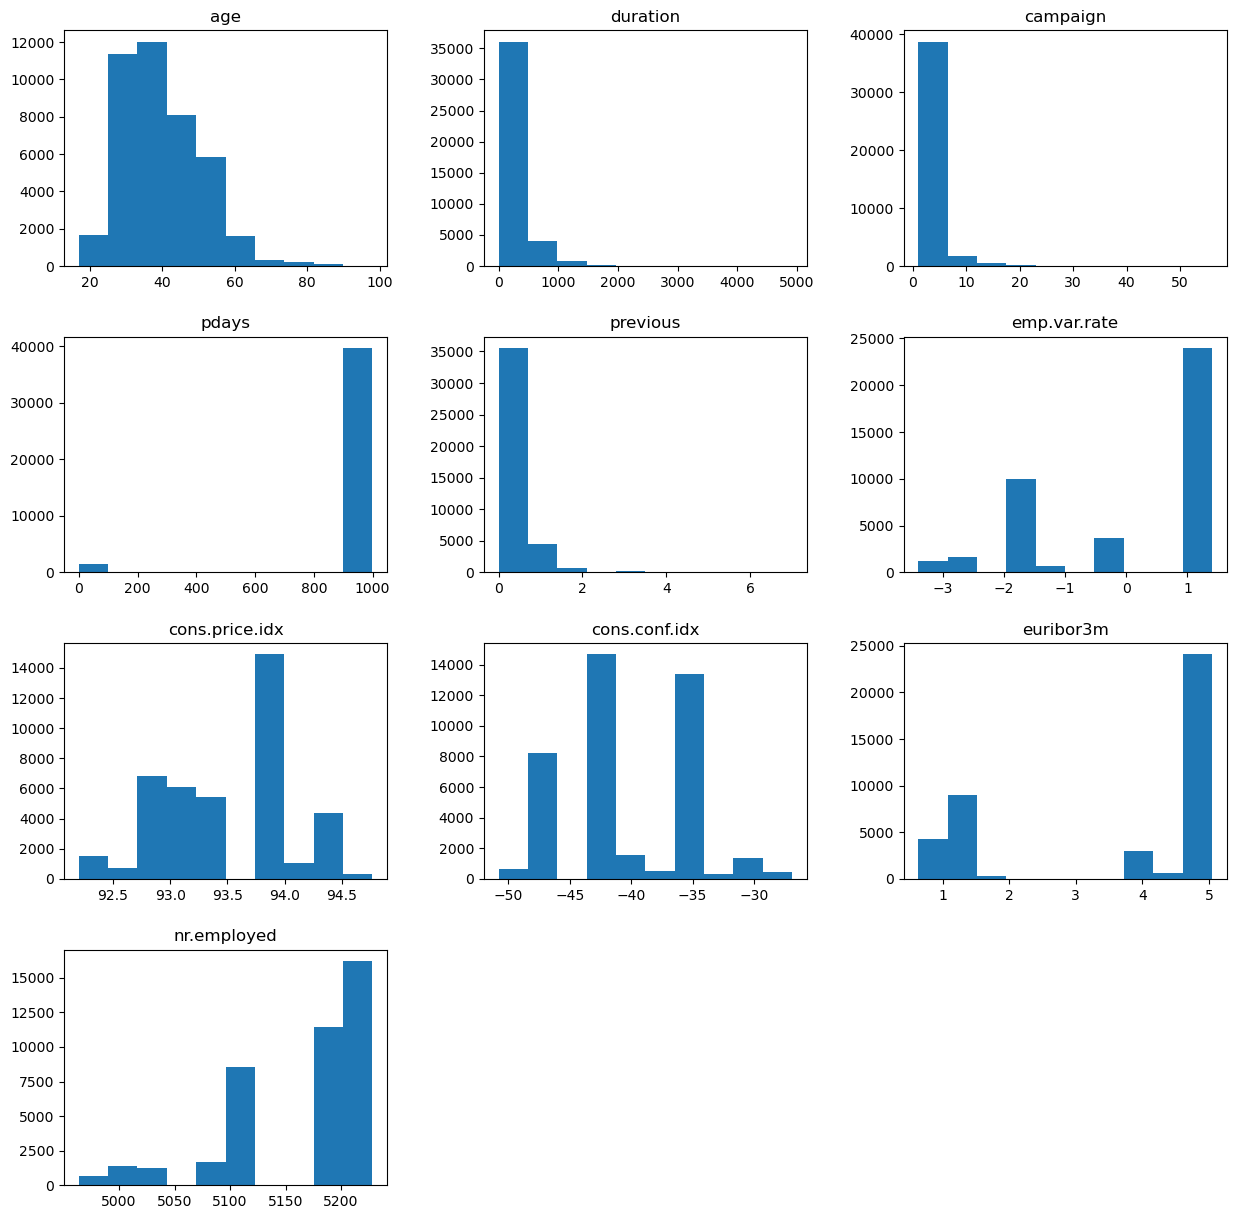

In [87]:
plt.style.use('default') # overrides the fiverthirthy eight
df.hist(figsize = (15, 15), grid=False);

**FINDINGS**

*Age:

Most of the observations are clustered around the younger ages, with a significant drop-off as age increases. This suggests that **the majority of the customers are younger.**

*Campaign:

The number of contacts performed during this campaign is highly skewed towards fewer contacts, with most customers being contacted only a few times. **Very few customers are contacted many times.**

*Previous:

Most customers have not been contacted in previous campaigns (value is 0), and very few have been contacted more than once or twice in previous campaigns.

Emp.var.rate (Employment Variation Rate):

The employment variation rate shows a distribution centered around a few key values, with a significant number of observations at 1, indicating relatively stable employment conditions.

Pdays:

**The plot shows that most customers have not been contacted in previous campaigns within the last 1000 days, suggesting a large gap between contacts for many customers.

Cons.price.idx (Consumer Price Index):

The consumer price index values are clustered around a few key values, indicating specific periods of consumer pricing conditions.

Cons.conf.idx (Consumer Confidence Index):

The consumer confidence index values are also clustered around a few key values, suggesting periods of specific consumer confidence conditions.

Euribor3m (Euribor 3 Month Rate):

The Euribor rate distribution shows that most observations are centered around higher values, indicating periods of higher interest rates.

Nr.employed (Number of Employees):

The number of employees shows a distribution centered around a few key values, suggesting periods with specific employment levels.

**Summary Insights:**

1) Skewed Distributions: 

Several features, such as pdays, previous, and campaign, show highly skewed distributions, indicating that most customers fall into a narrow range for these features.

2) Clustered Values: 

Features like emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed show values clustered around specific points, suggesting stable economic conditions during the data collection period.

3) Customer Contact Patterns:
The plots for campaign and previous suggest that customers are rarely contacted multiple times, both in the current and previous campaigns.


In [88]:
grouped_desc = df.groupby('y').describe().T

# Step 3: Display all rows
# Set pandas options to display more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(grouped_desc)

y                               no          yes
age            count  36537.000000  4639.000000
               mean      39.910994    40.912266
               std        9.897176    13.838838
               min       17.000000    17.000000
               25%       32.000000    31.000000
               50%       38.000000    37.000000
               75%       47.000000    50.000000
               max       95.000000    98.000000
duration       count  36537.000000  4639.000000
               mean     220.868079   553.256090
               std      207.116178   401.190736
               min        0.000000    37.000000
               25%       95.000000   253.500000
               50%      164.000000   449.000000
               75%      279.000000   741.500000
               max     4918.000000  4199.000000
campaign       count  36537.000000  4639.000000
               mean       2.633385     2.051951
               std        2.873768     1.666353
               min        1.000000     1

## BoxBlot

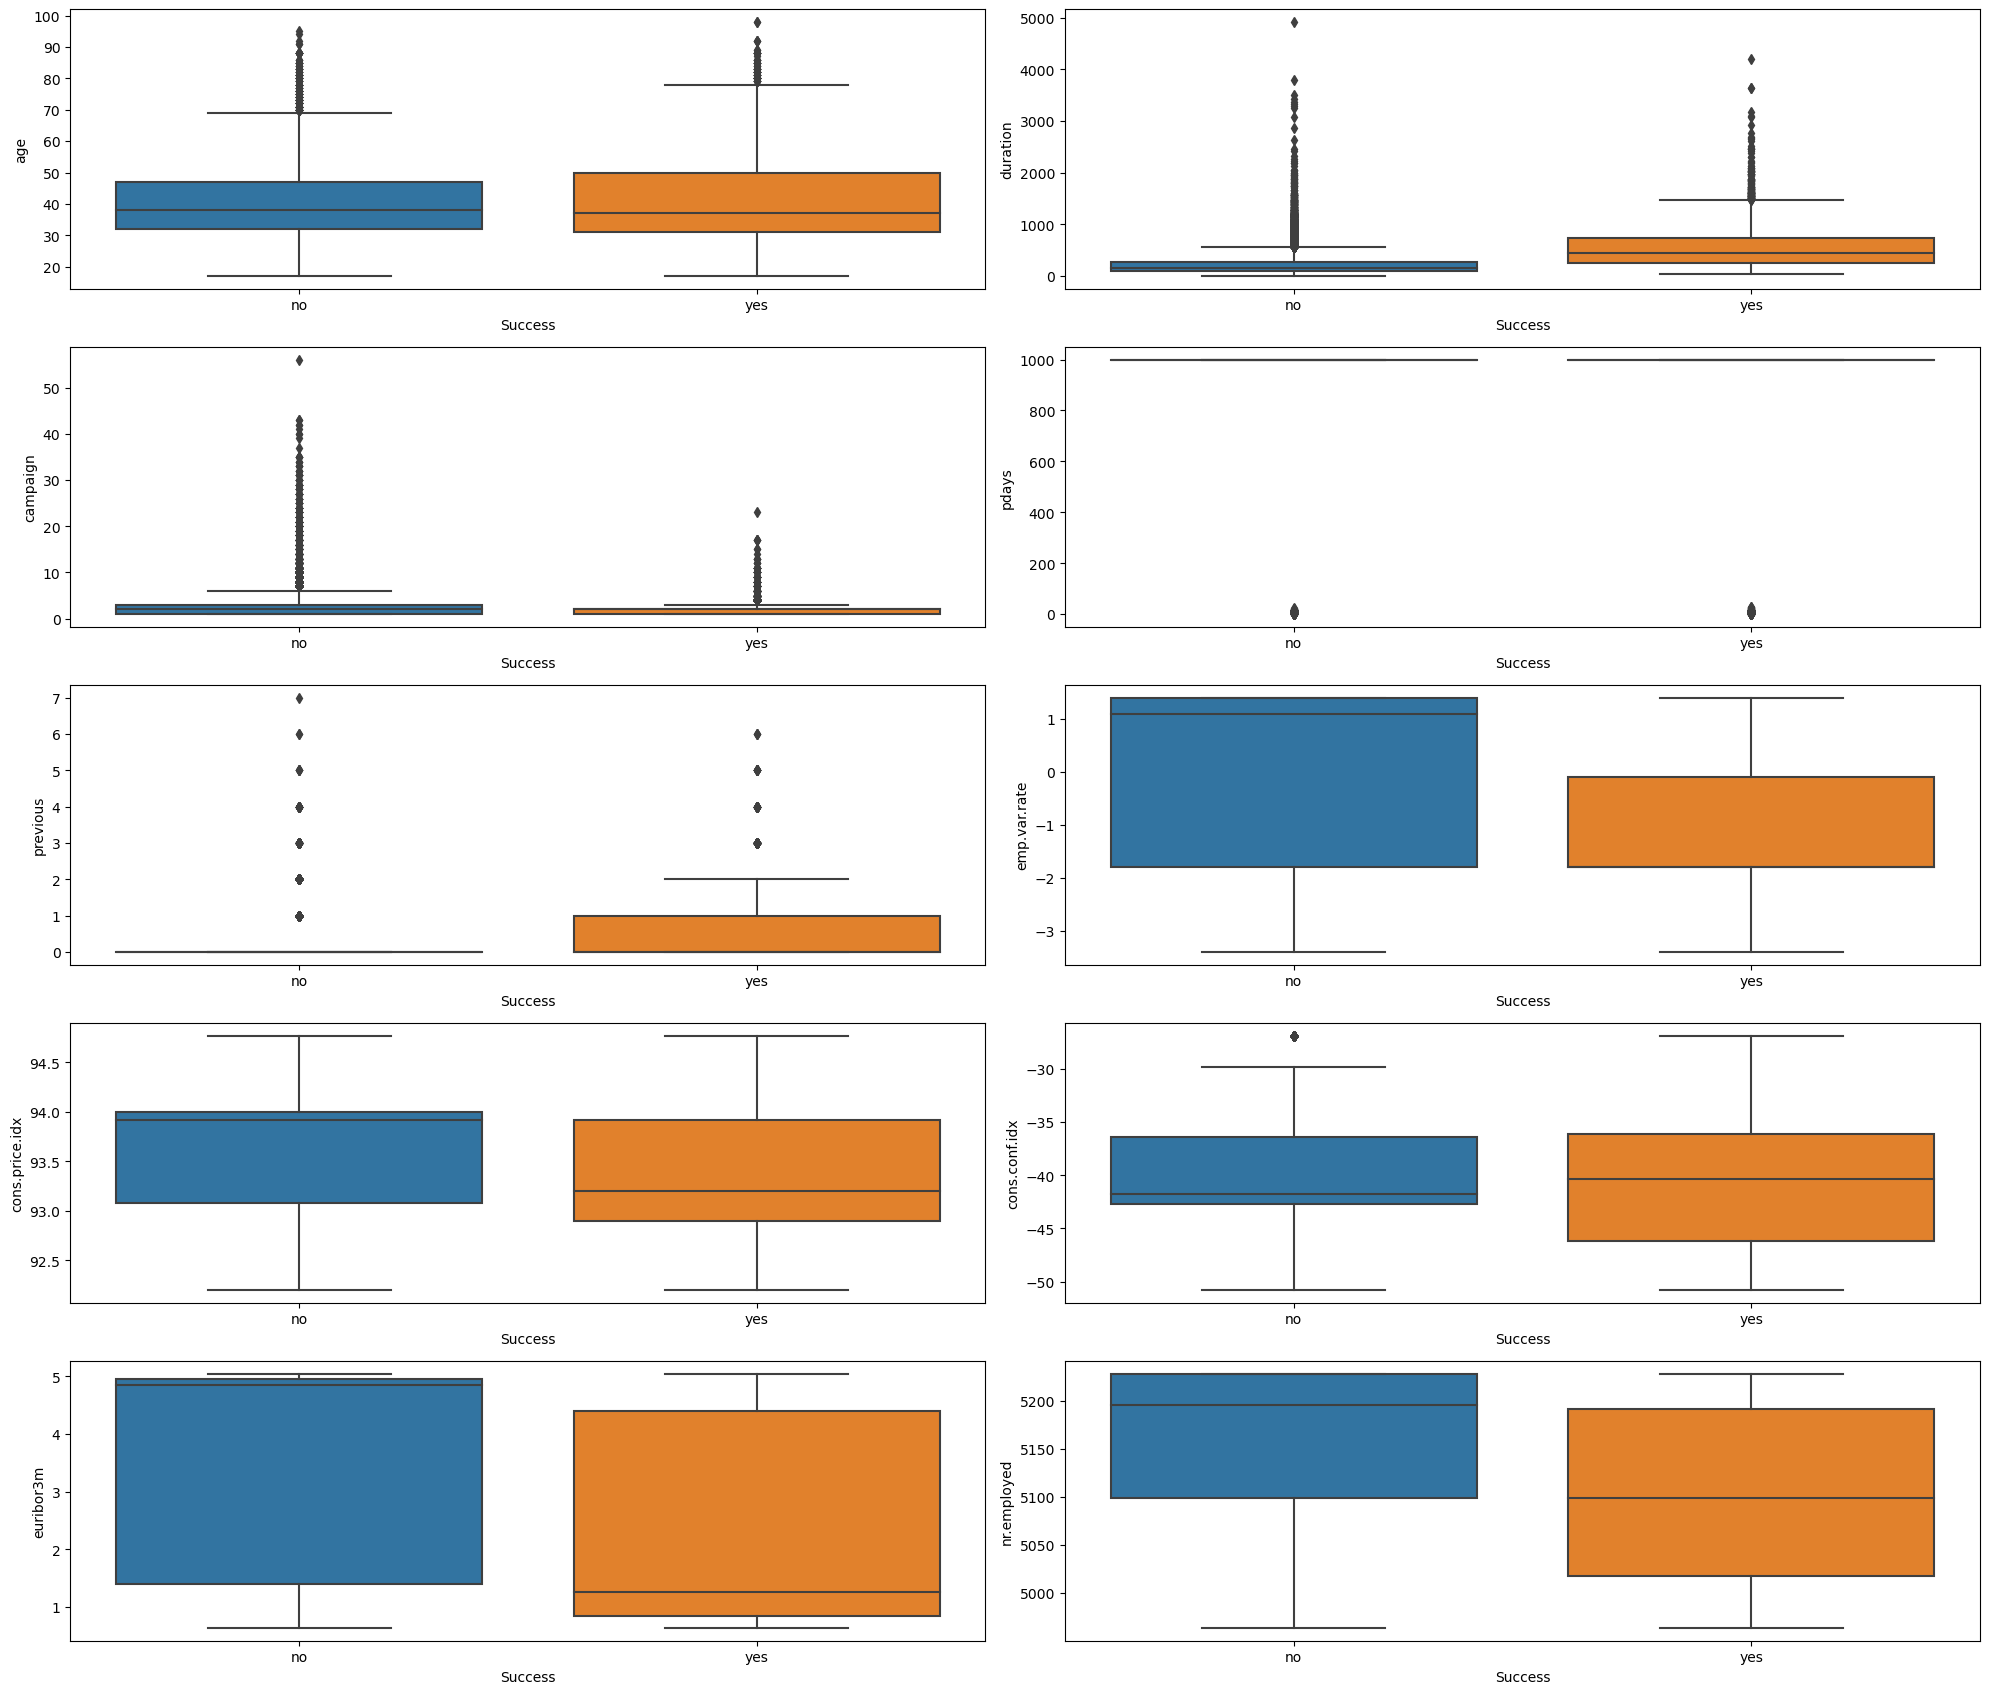

In [89]:
# Set up the figure size
plt.figure(figsize=(20, 20))

# Get the list of numerical columns to plot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a box plot for each numerical column
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 2 + 1, 2, i + 1)
    sns.boxplot(x='y', y=col, data=df)
    plt.xlabel('Success')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Age:**

The average age is slightly higher for those who said "yes" compared to "no" (40.91 vs. 39.91).
The age distribution for "yes" responses is more spread out (higher std) than for "no" responses.

**Duration:**

The average duration of the call is significantly higher for "yes" responses (553.26 vs. 220.87). This suggests that longer calls are more likely to result in a "yes".
There is a large spread in call duration for both groups, but more so for "yes" responses.

**Campaign:**

The average number of contacts performed during this campaign for the client is slightly higher for "no" responses (2.63 vs. 2.05).
The distribution of the campaign contacts shows a higher spread for "no" responses.


**Pdays:**

The average number of days since the client was last contacted is lower for "yes" responses (791.99 vs. 984.11). However, both groups have a large number of contacts with a pdays value of 999, indicating that many clients have not been contacted before this campaign.

**Previous:**

Clients who responded "yes" have a higher average number of previous contacts (0.49 vs. 0.13).
The distribution of previous contacts is more spread out for "yes" responses.

**Emp.var.rate:**

The average employment variation rate is lower (negative) for "yes" responses (-1.23) compared to "no" responses (0.25).
The spread is higher for "yes" responses.

**Cons.price.idx:**

The average consumer price index is similar between the two groups, with a slight decrease for "yes" responses (93.35 vs. 93.60).

**Cons.conf.idx:**

The average consumer confidence index is higher (less negative) for "yes" responses (-39.79 vs. -40.59).
The spread is higher for "yes" responses.

**Euribor3m:**

The average 3-month Euribor rate is lower for "yes" responses (2.12 vs. 3.81).
There is a wide spread in the Euribor rate for both groups, with "yes" responses showing a slightly higher variation.

**Nr.employed:**

The average number of employees is lower for "yes" responses (5095.12 vs. 5176.17).
There is a wider spread in the number of employees for "yes" responses.

**Summary:**

*Duration of the call* is a significant differentiator, with longer calls associated with a "yes".
*Pdays and previous contacts* indicate that recent and frequent contacts are more likely to result in a "yes".

Economic indicators like employment variation rate, consumer confidence index, and Euribor rate show different distributions for "yes" and "no" responses.

Age and campaign contacts have less pronounced but still notable differences between the two groups.

Findings:
    
**Highly Informative Features:**

1) Duration:

The mean and spread of the duration of calls show significant differences between "yes" and "no" responses. This suggests that call duration is a strong indicator of the likelihood of a positive response.

2) Pdays:

The number of days since the client was last contacted shows differences, with "yes" responses having lower averages. However, the high frequency of the value 999 (indicating never contacted) might need special handling.

3) Previous:

The number of previous contacts is higher for "yes" responses, indicating that clients with more previous contacts are more likely to respond positively.

4) Emp.var.rate:

Employment variation rate shows a notable difference, with a lower average (often negative) for "yes" responses. This might indicate economic conditions affecting client decisions.

5) Euribor3m:

The 3-month Euribor rate shows different means and spreads between the two groups, making it a potential feature for modeling.

6) Nr.employed:

The number of employees is lower for "yes" responses, suggesting it may be a useful feature, though its variability should be considered.



**Moderately Informative Features:**

Campaign:

Although differences exist, the overlap in distributions suggests it is moderately informative. The number of contacts performed during the campaign can still provide some insights.
Age:

Age shows some differences but is less pronounced than other features. It may still provide value in combination with other features.

Cons.conf.idx:

Consumer confidence index differences are subtle but can be useful in conjunction with other economic indicators.
Cons.price.idx:

Consumer price index differences are minor but may add value in a combined feature set.

Less Informative Features:

Features with minimal differences or high overlap in distributions might be less informative. However, they can still be included as part of a broader feature set if they interact with other features in meaningful ways.




##  Histogram & BoxPlot

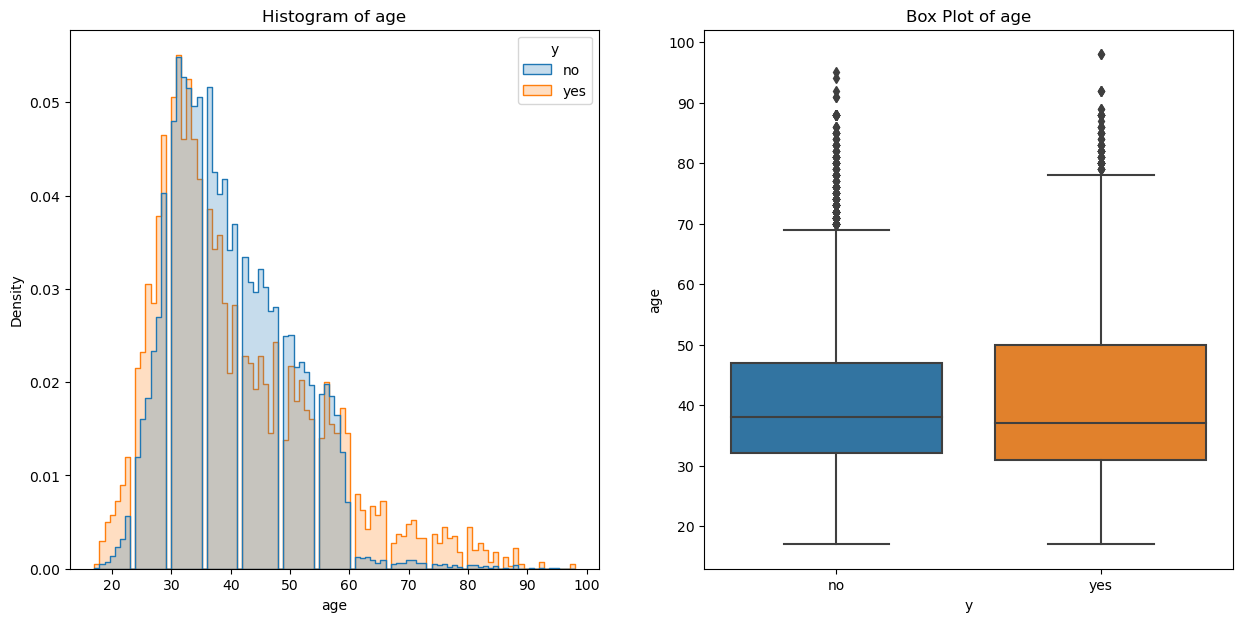

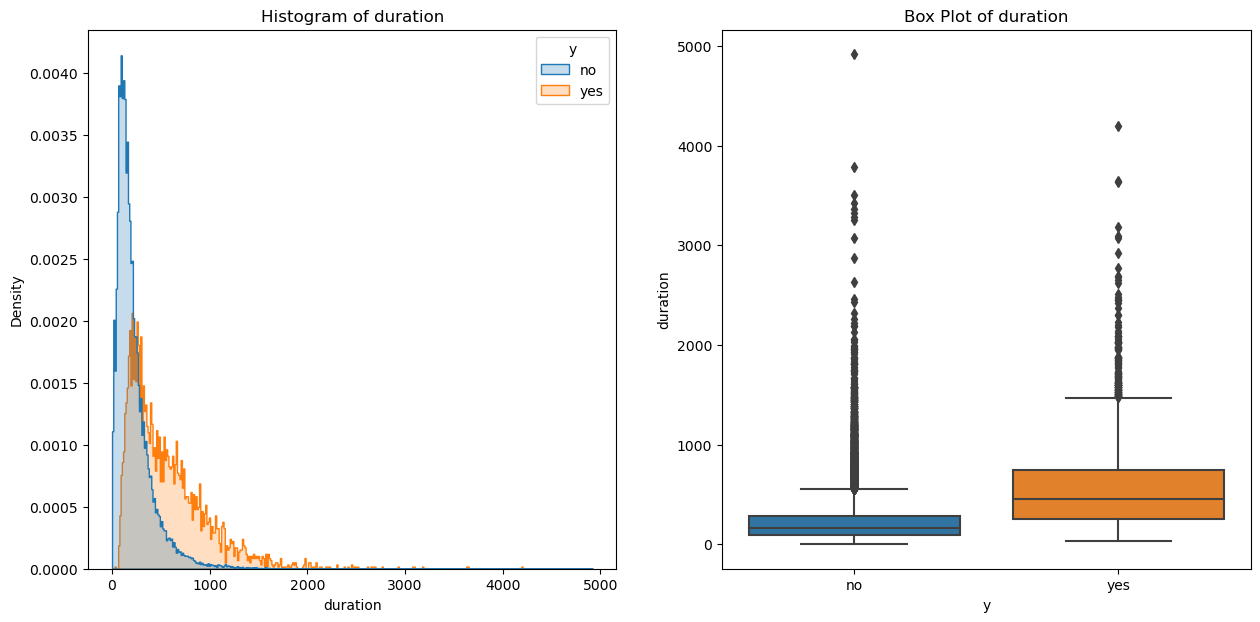

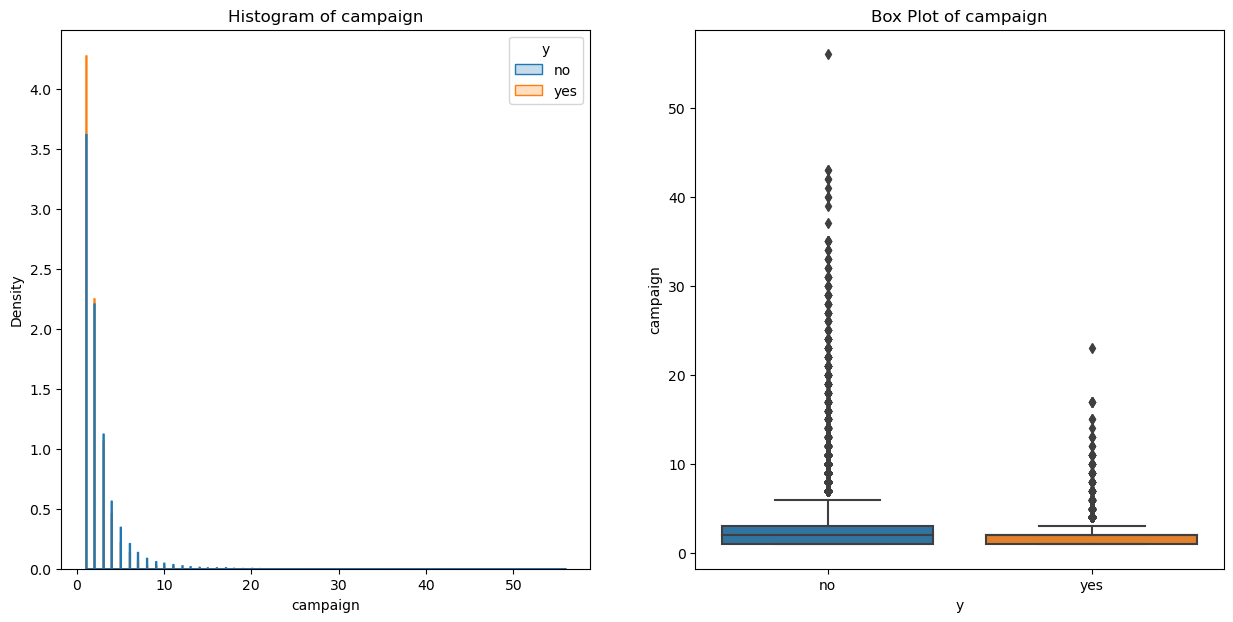

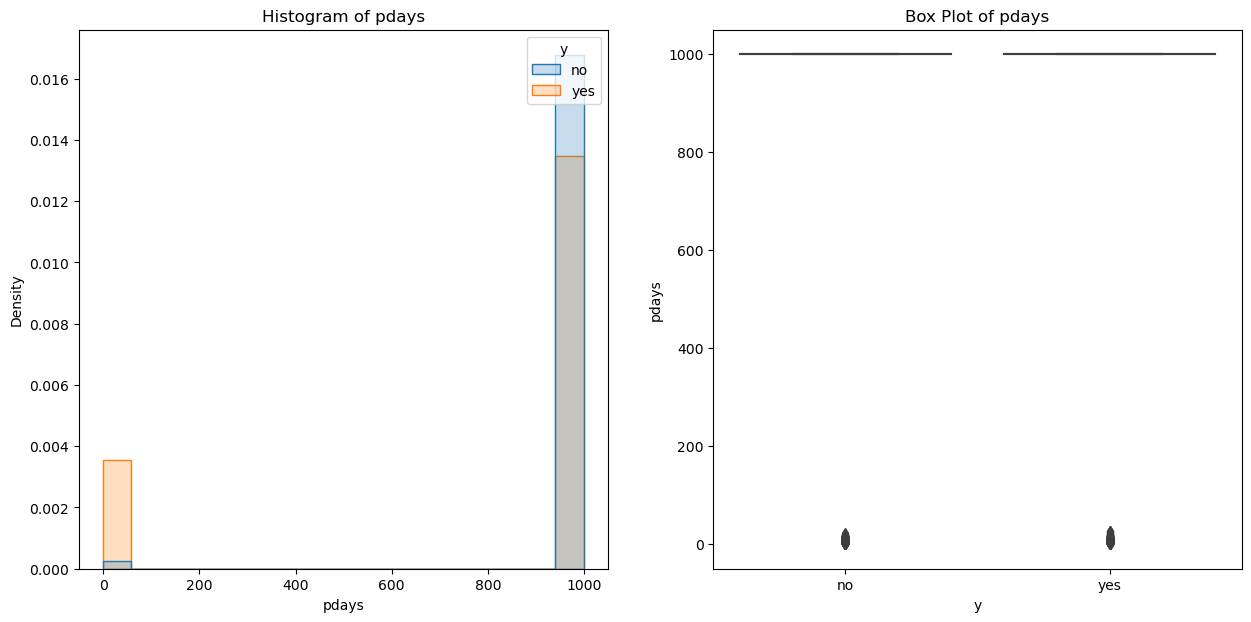

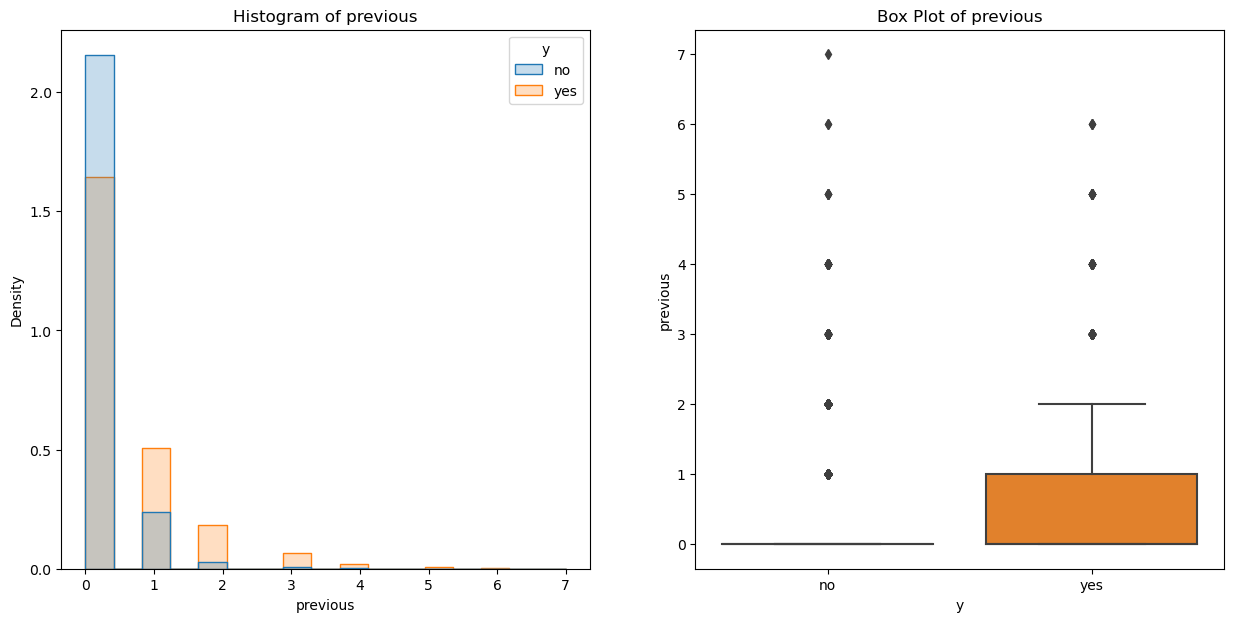

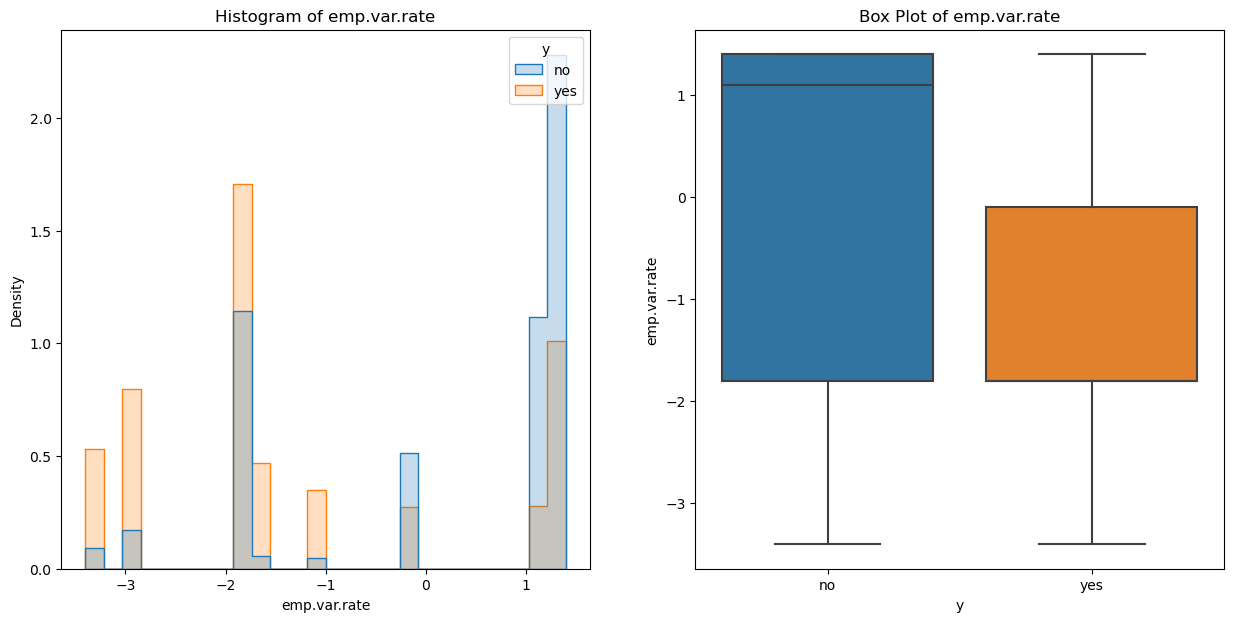

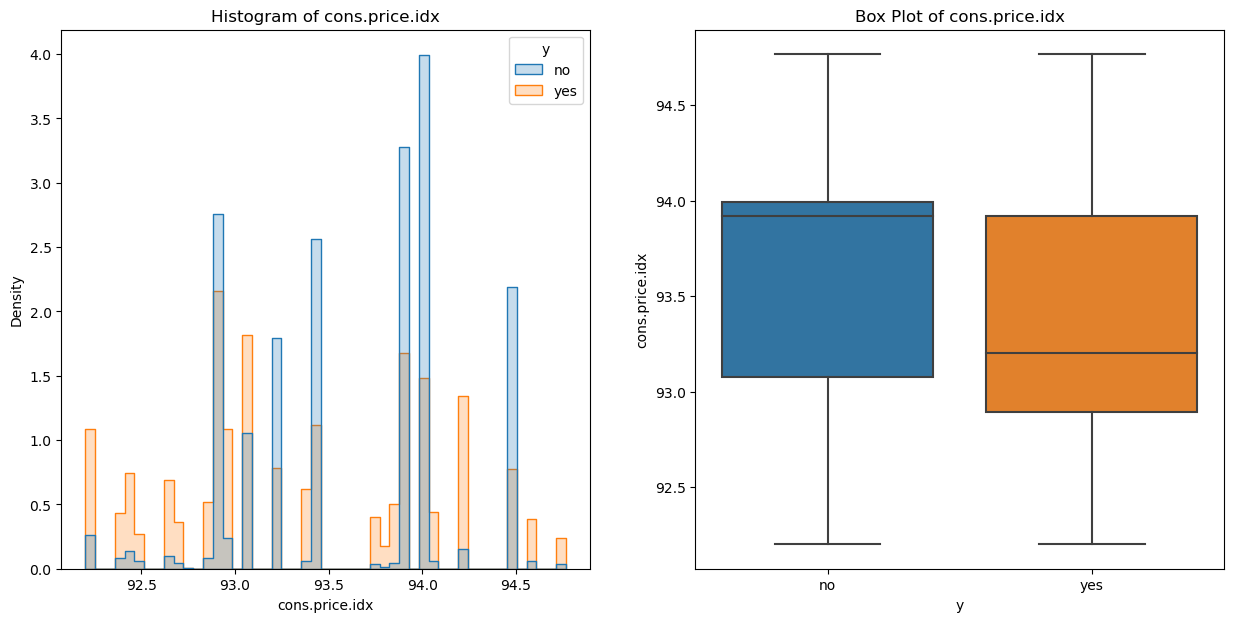

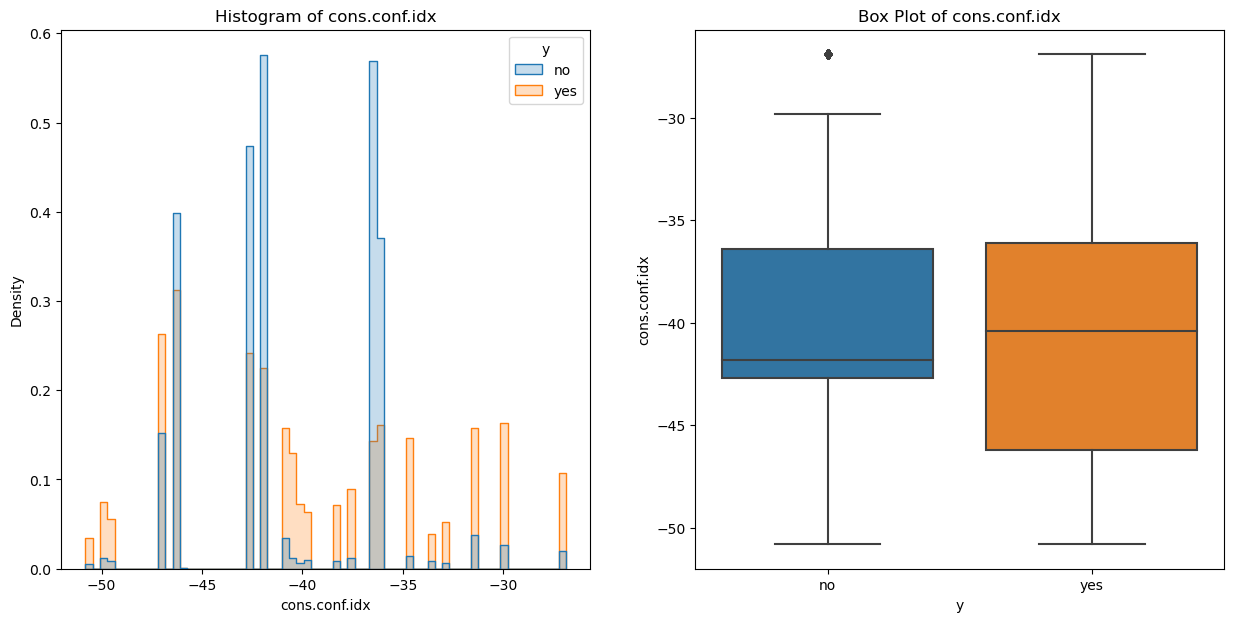

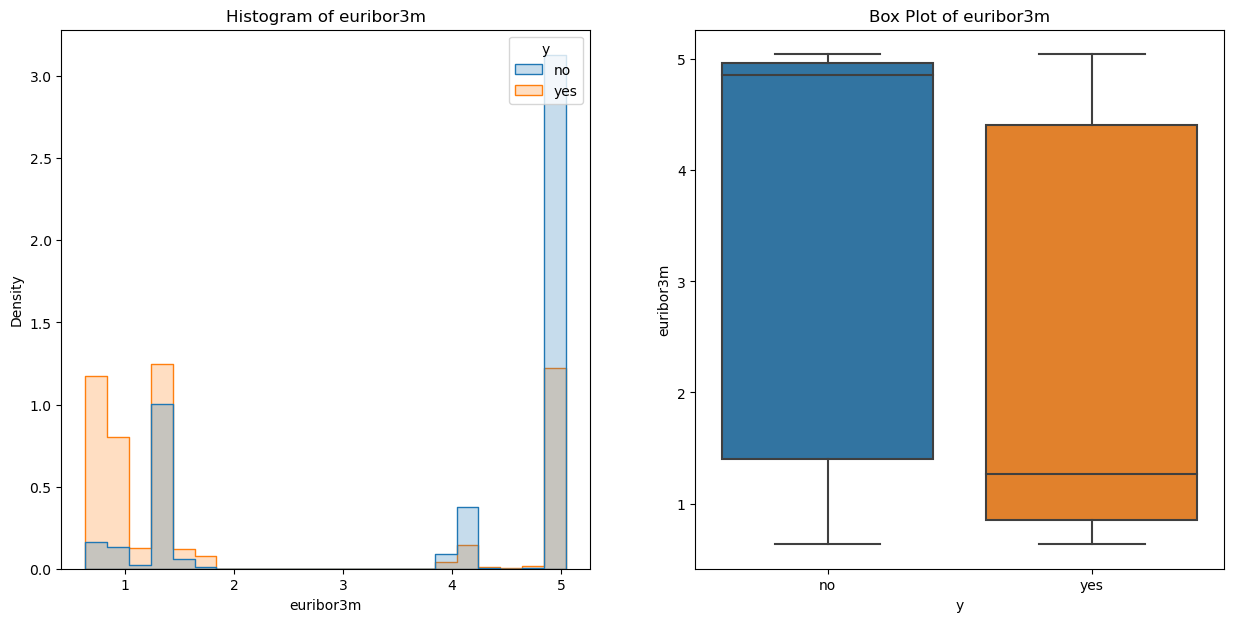

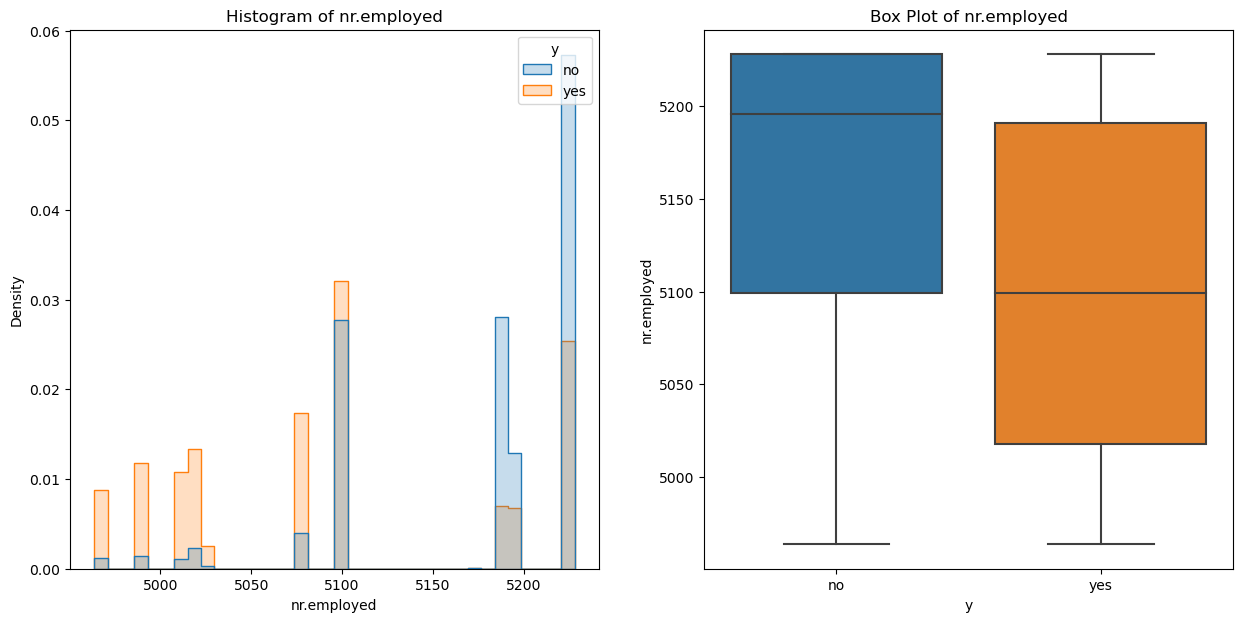

In [90]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Plot histograms and box plots for numerical variables
for col in numerical_columns:
    plt.figure(figsize=(15, 7))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, x=col, hue='y', element='step', stat='density', common_norm=False)
    plt.title(f'Histogram of {col}')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'Box Plot of {col}')

## EDA 2: Key Insights by Variable and Recommended Actions for Data Preparation and Feature Engineering


**Age: is not a decisive feature in predicting subscription.

General Observation: Most customers are younger, with a significant drop-off in the number of older customers.

Subscription Analysis: Subscribed customers tend to be slightly older on average (mean age 40.91) compared to non-subscribed customers (mean age 39.91). The age distribution is broader for subscribed customers, indicating that age plays a role within a broad range.


**Campaign: Fequent Contacts are not as effective as Assumed

General Observation: The number of contacts is highly skewed towards fewer contacts, with most customers being contacted only a few times. Very few customers are contacted many times.

Subscription Analysis: Subscribed customers have slightly fewer campaign contacts (mean 2.05) compared to non-subscribed customers (mean 2.63), suggesting that overly frequent contacts may not be as effective.


**Previous Contacts: Most customers haven't been contacted before, but those with more previous contacts are more likely to subscribe.

General Observation: Most customers have not been contacted in previous campaigns, with very few having been contacted more than once or twice.

Subscription Analysis: Subscribed customers have a higher mean number of previous contacts (0.49) compared to non-subscribed customers (0.13), highlighting the importance of follow-up contacts.


**Call Duration:  Longer calls boost subscription rates

Subscription Analysis: Subscribed customers have significantly longer call durations (mean 553.26 seconds) compared to non-subscribed customers (mean 220.87 seconds). Longer, more engaging calls correlate with higher subscription rates.

**Pdays:Most customers have not been contacted in previous campaigns within the last 1000 days. Earlier contacts after the last campaign contribute to subscribtions.

General Observation: Most customers have not been contacted in previous campaigns within the last 1000 days, indicating a large gap between contacts.
Subscription Analysis: Subscribed customers have a lower mean pdays (791.99) compared to non-subscribed customers (984.11), indicating that earlier contact after the last campaign is beneficial.

**Economic Conditions: Subscribed customers tend to be in less favorable economic conditions, with lower employment variation, Euribor rates, and employment numbers

*Emp.var.rate (Employment Variation Rate):*
Subscribed customers experienced a negative employment variation rate (-1.23) compared to a positive rate for non-subscribed customers (0.25), suggesting that customers in less favorable economic conditions may be more receptive to offers.

*Cons.price.idx (Consumer Price Index):* Non-subscribed customers have a slightly higher mean consumer price index (93.60) compared to subscribed customers (93.35).
Cons.conf.idx (Consumer Confidence Index): Subscribed customers have a higher (less negative) consumer confidence index (-39.79) compared to non-subscribed customers (-40.59).

*Euribor3m (Euribor 3 Month Rate):* Subscribed customers tend to have lower Euribor rates (mean 2.12) compared to non-subscribed customers (mean 3.81).

*Nr.employed (Number of Employees):* Subscribed customers are associated with lower employment numbers (mean 5095.12) compared to non-subscribed customers (mean 5176.17).

Summary Insights of data distribution and quality. 

Skewed Distributions:

Features such as pdays, previous, and campaign show highly skewed distributions, indicating that most customers fall into a narrow range for these features.

Clustered Values:

Features like emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed show values clustered around specific points, suggesting stable economic conditions during the data collection period.

Customer Contact Patterns:

Customers are rarely contacted multiple times in both current and previous campaigns. Longer call durations and fewer, more targeted contacts correlate with higher subscription rates.

Feature Engineering:

Apply log transformation to highly skewed features (campaign, previous, duration, pdays) to reduce skewness.
Standardize economic condition features (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed) to ensure they are on a similar scale.


Binary Features:
Create binary features indicating whether the number of campaign contacts exceeds a threshold.
Create binary features indicating whether pdays is less than a threshold (e.g., 1000 days).
Create a binary feature indicating whether the customer was contacted previously.

Binned Features:
Create binned features for duration to categorize calls into short, medium, and long durations.
Interaction Terms:
Create interaction terms between economic indicators and other features to capture combined effects.



## EDA 3: Highlighted Numerical Variables' Analysis

Further Analysis: 
Investigate the impact of these skewed and clustered distributions on the target variable (e.g.'y').

Feature Engineering: 
Consider transforming highly skewed features to reduce skewness and improve model performance.

Segmentation: 
Use the insights from these distributions to segment the customer base and tailor marketing strategies accordingly.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

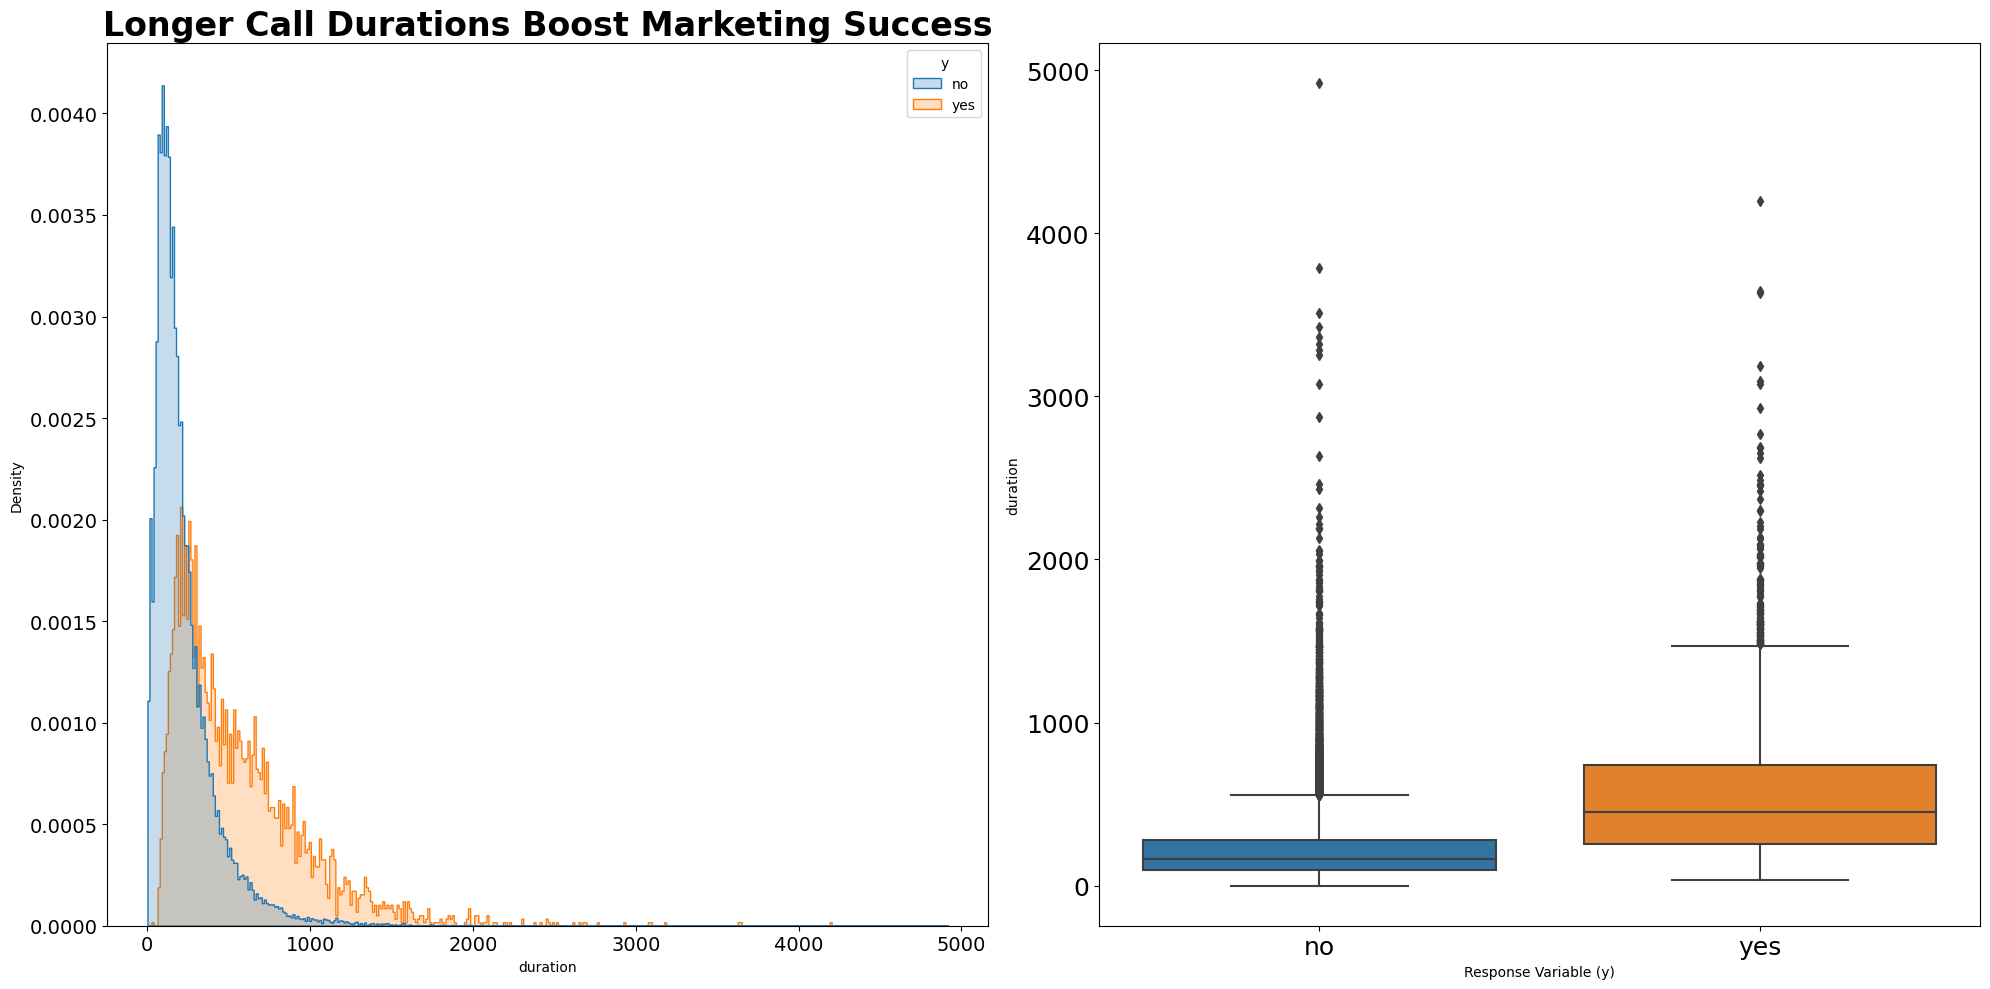

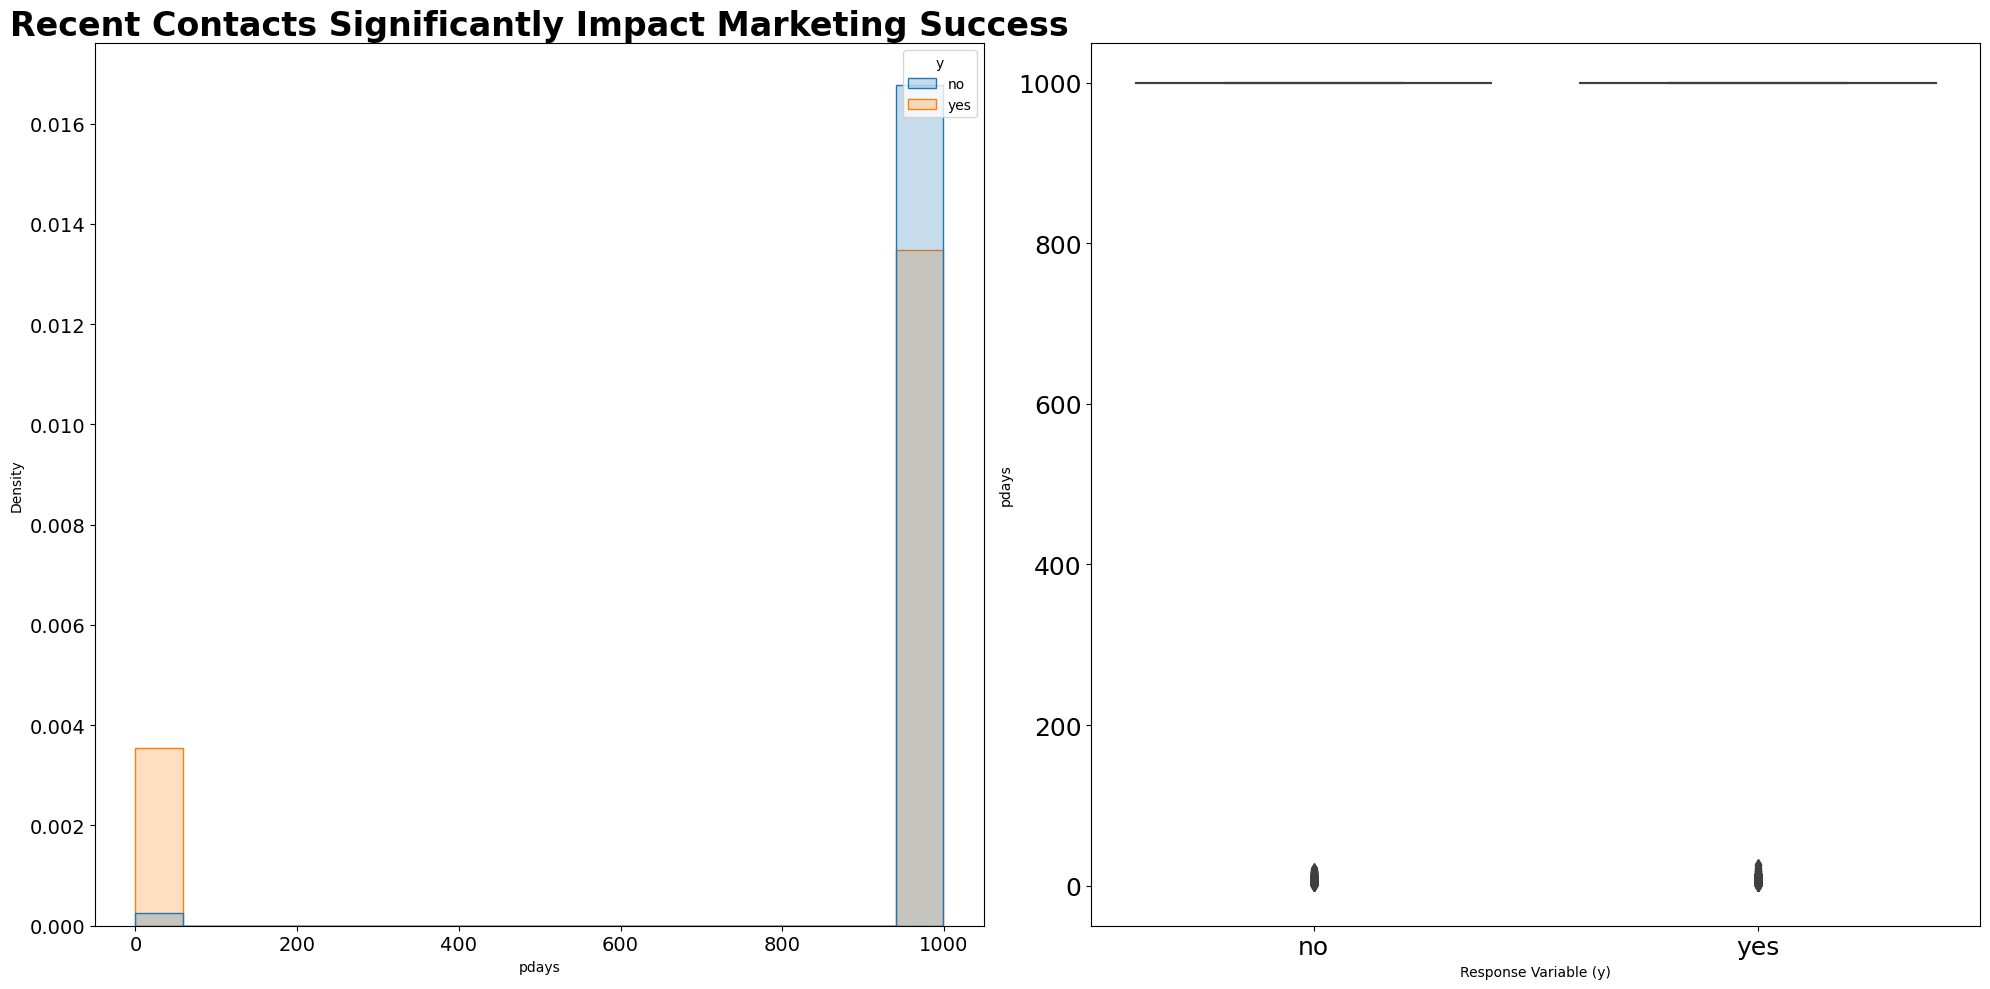

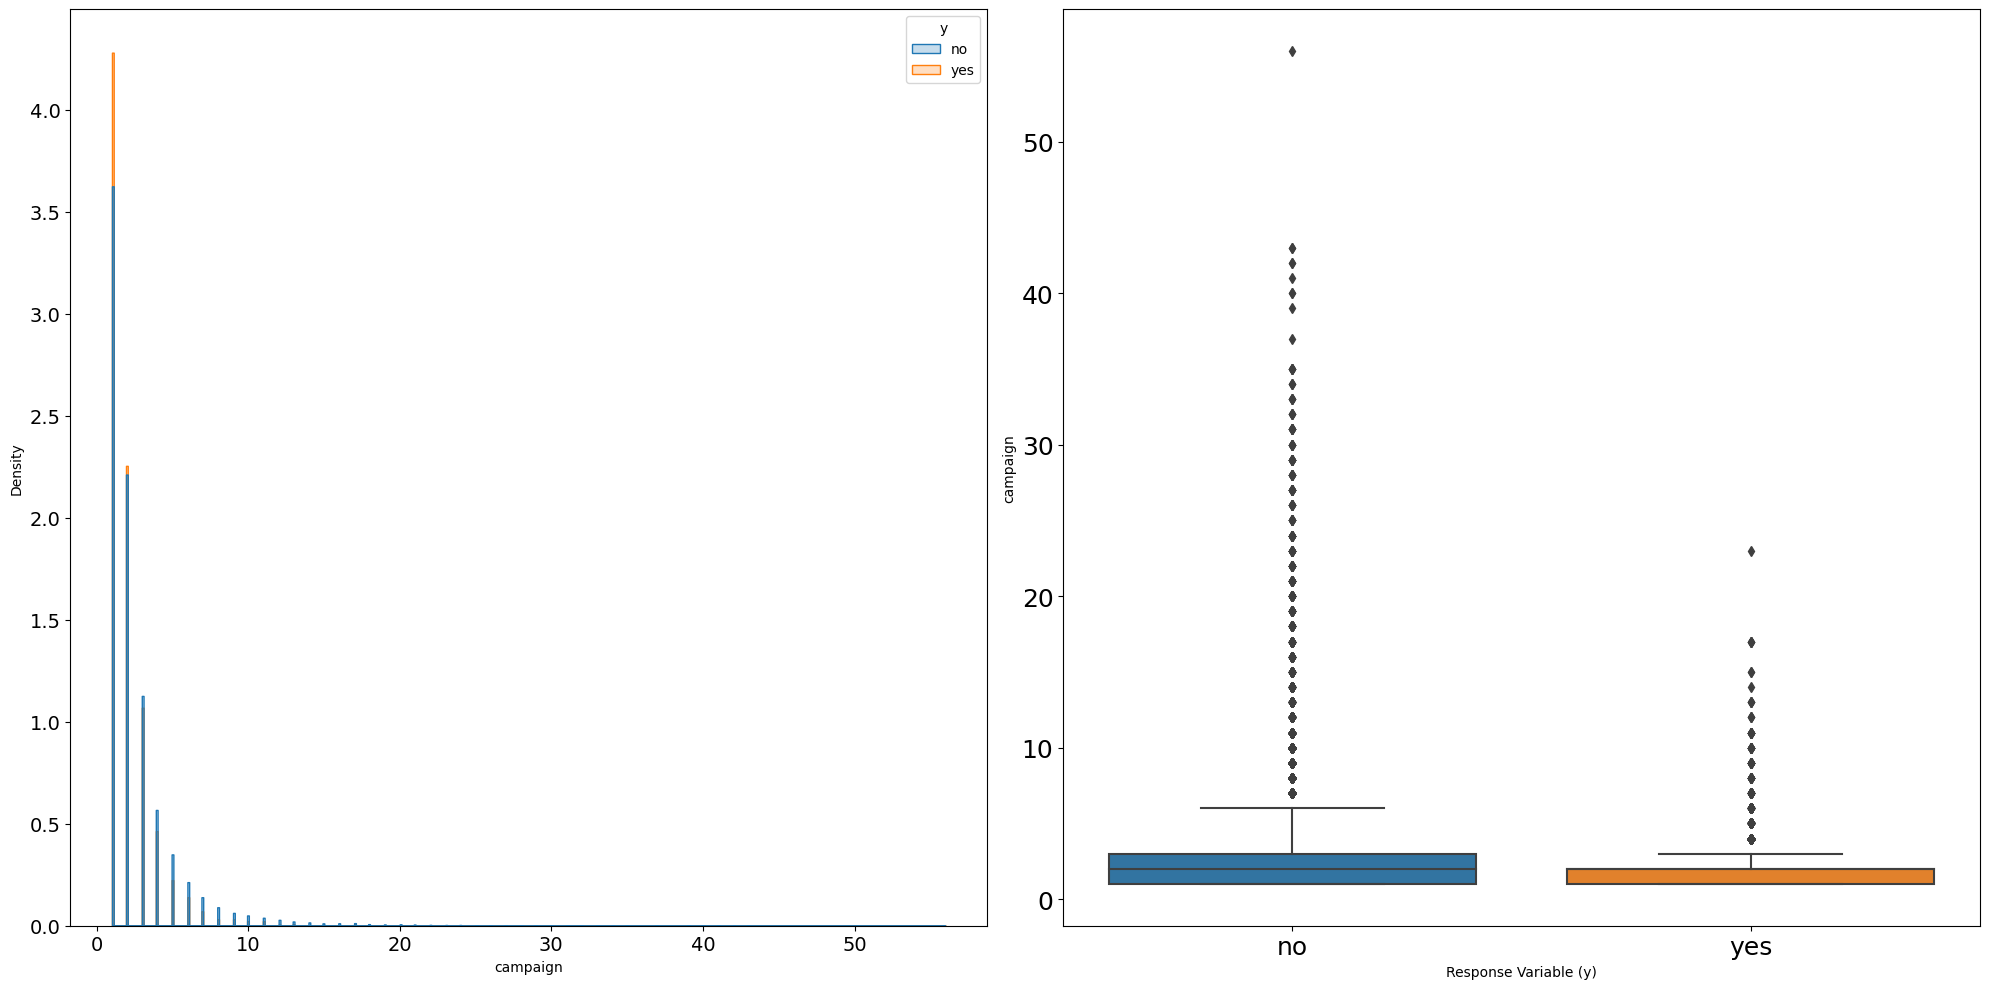

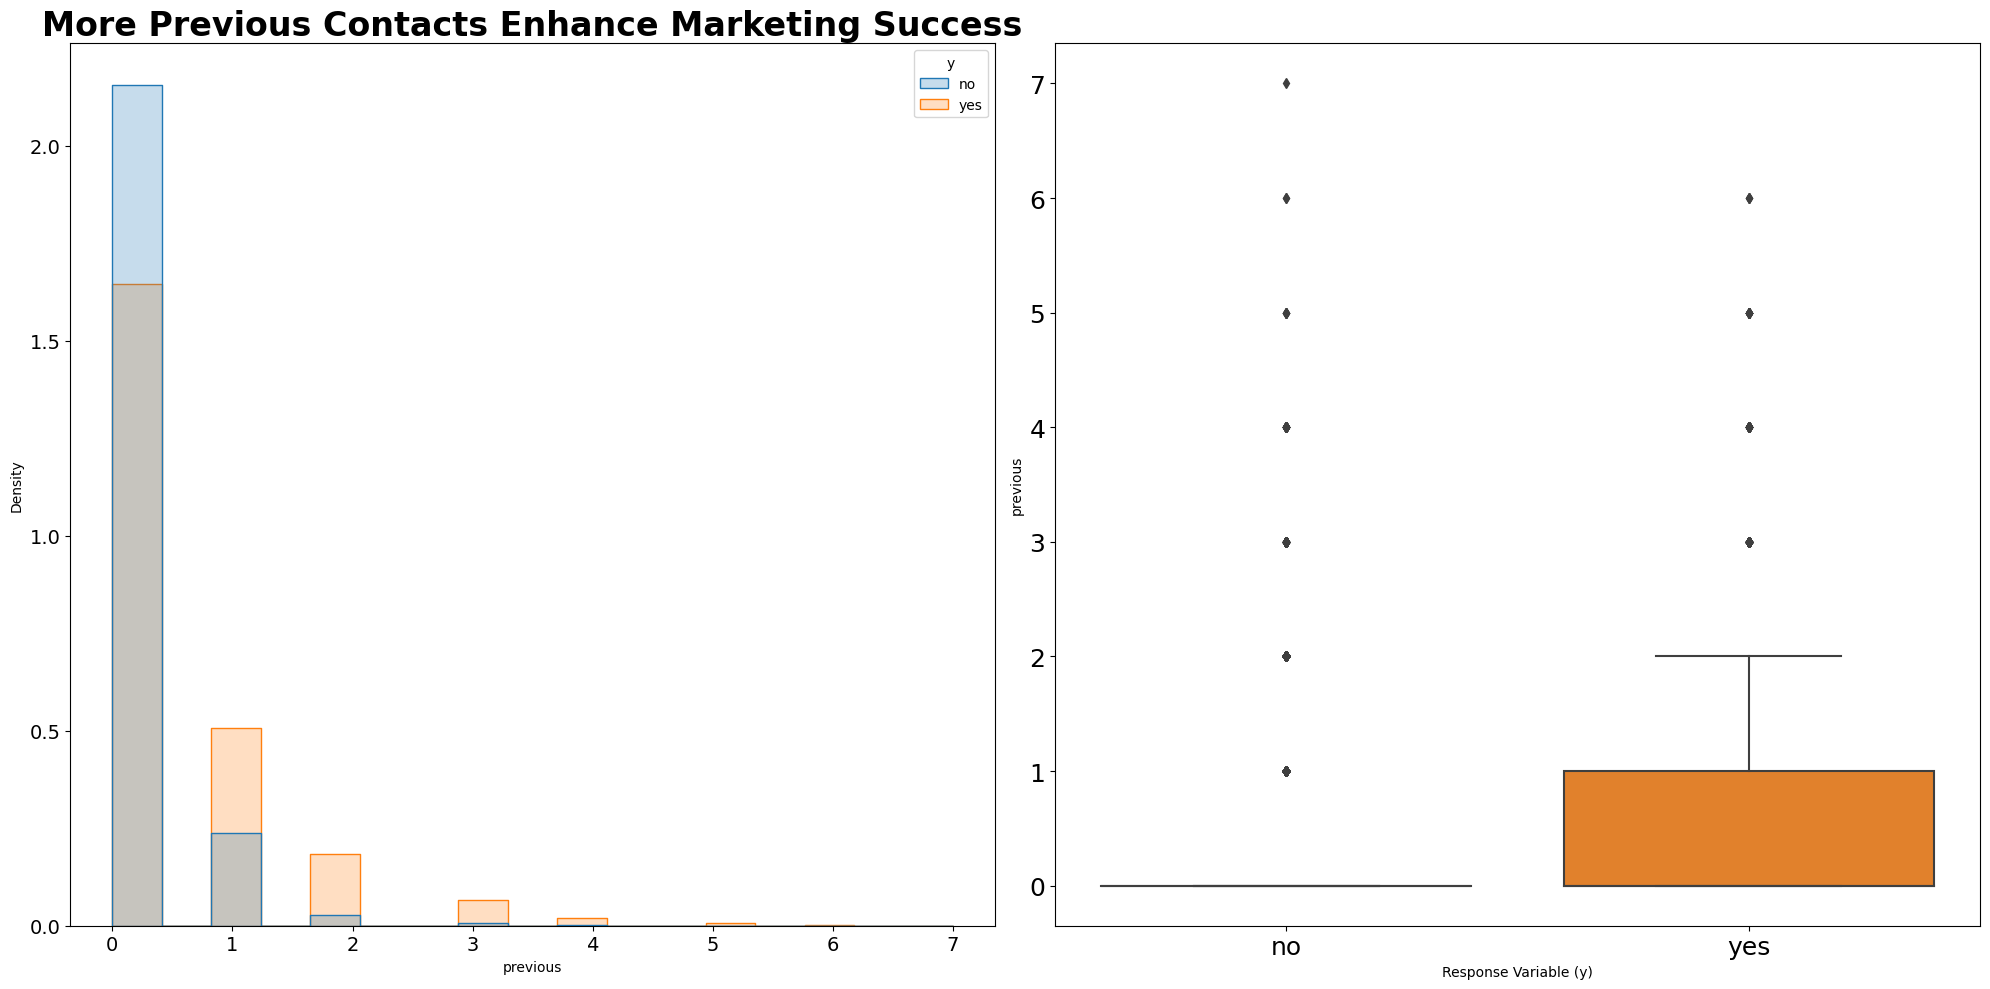

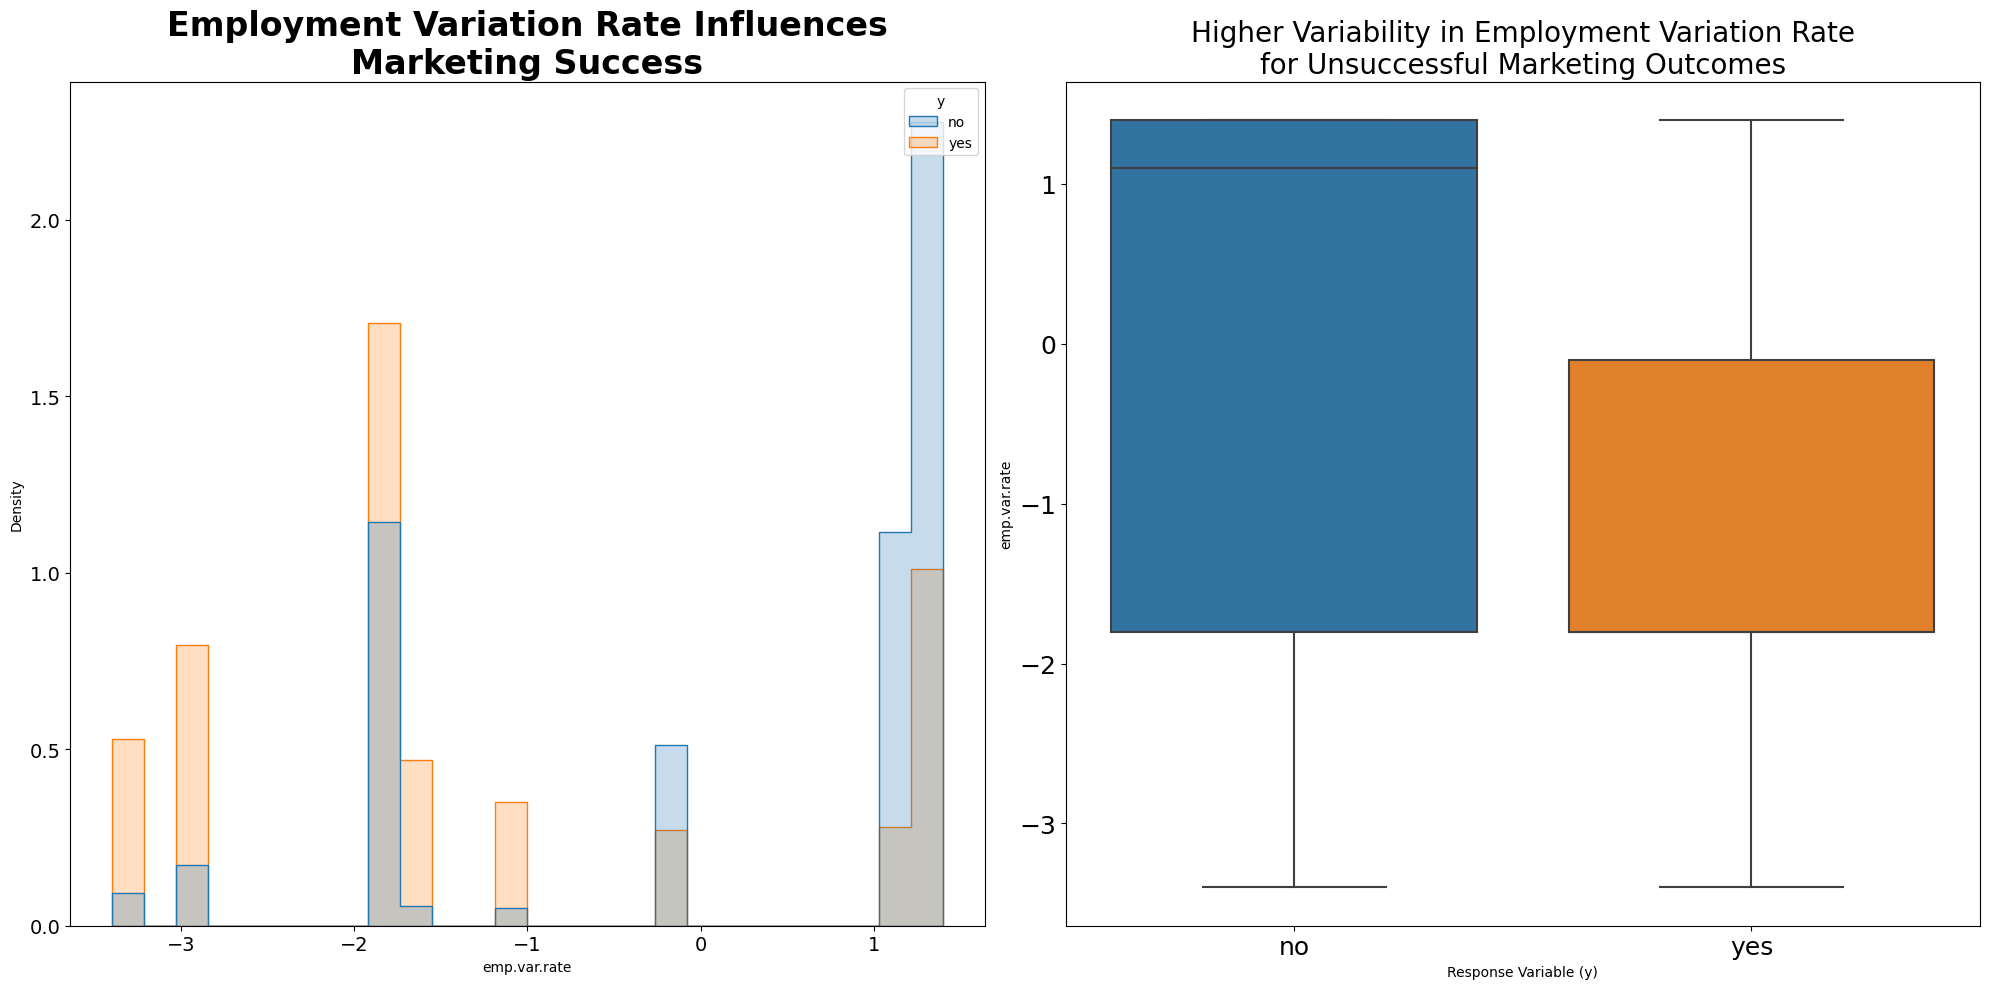

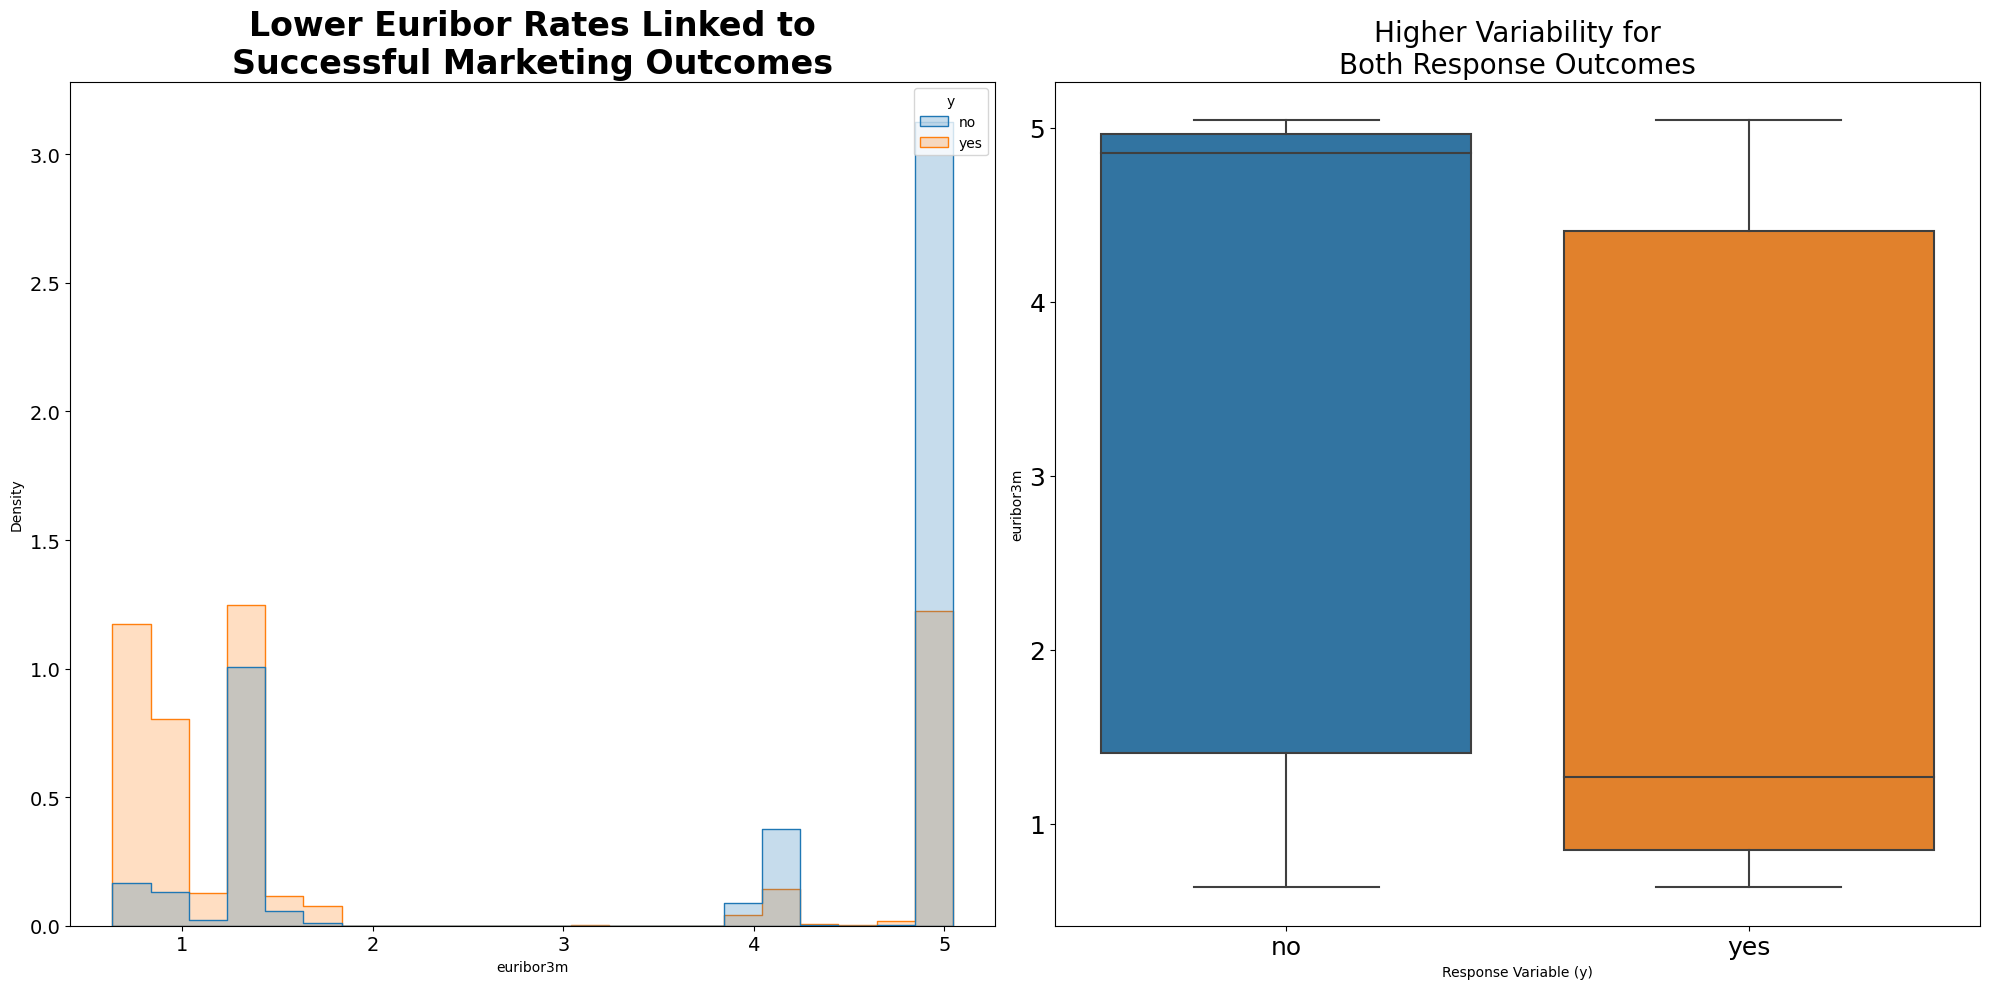

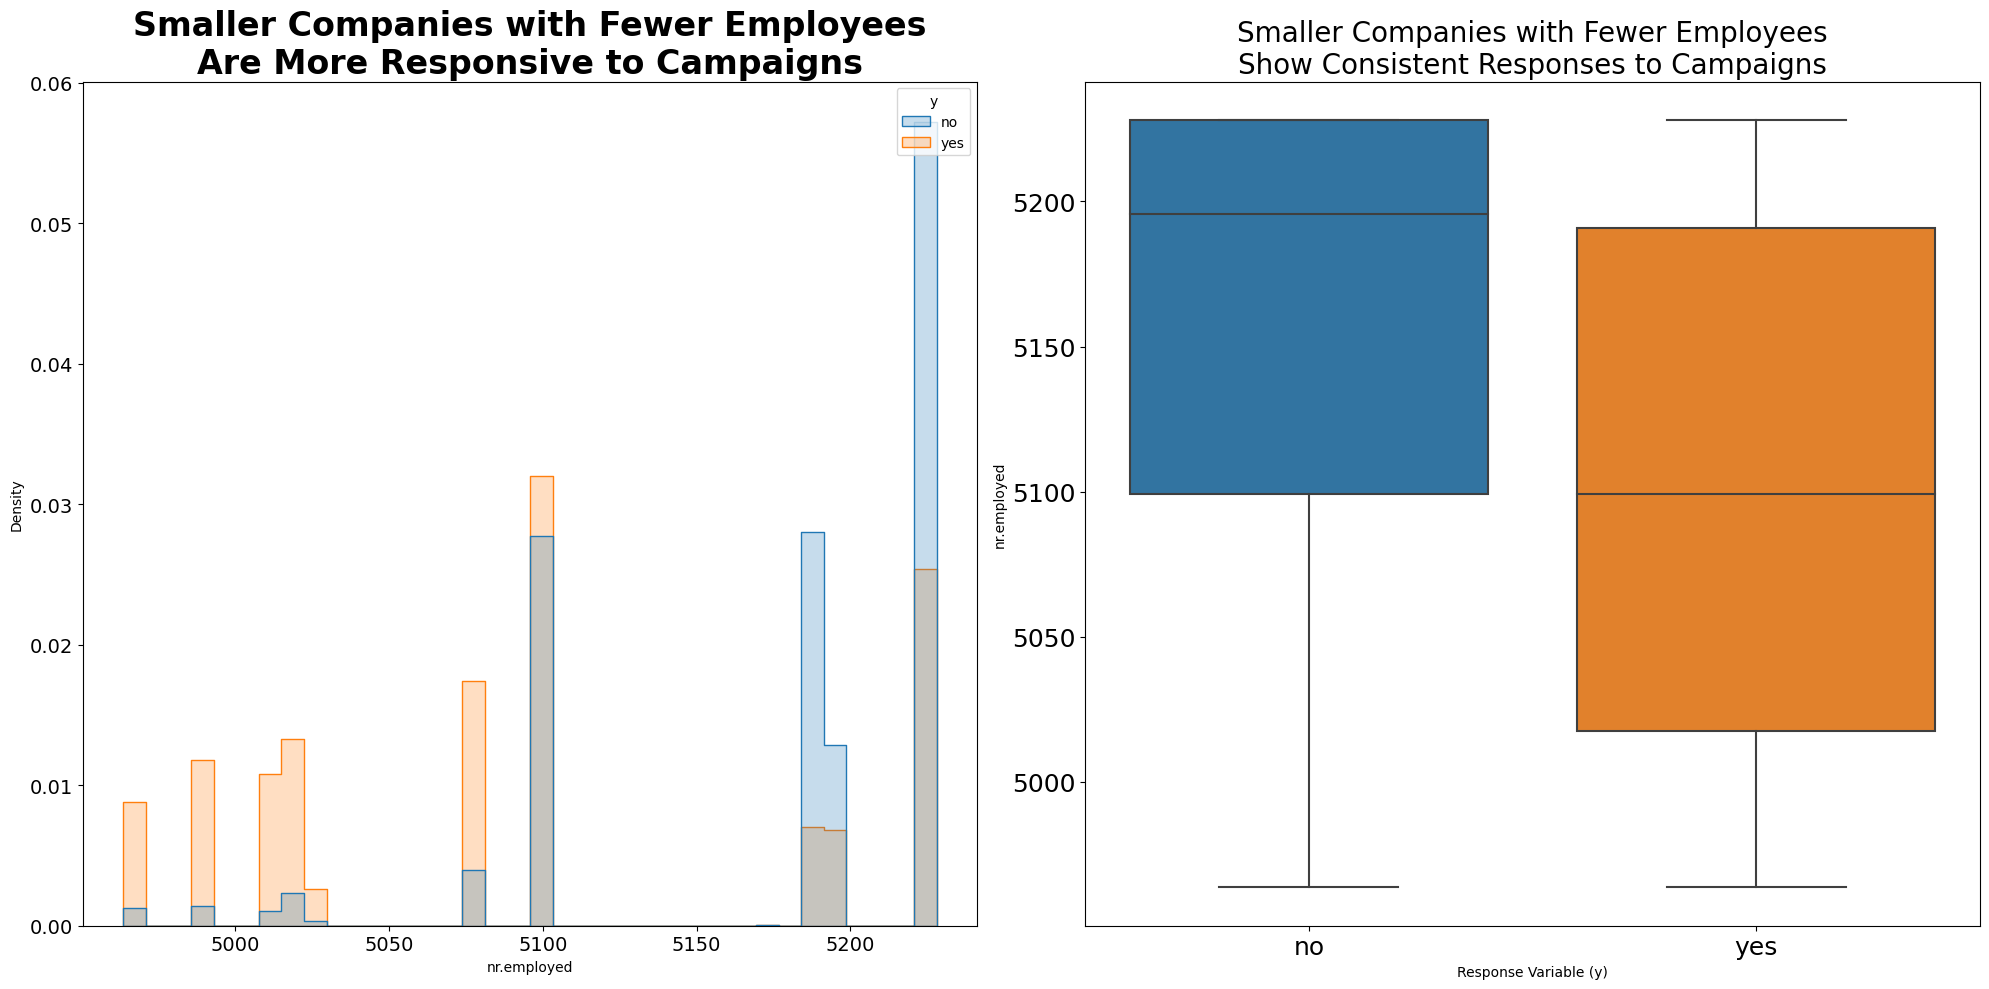

In [92]:
# List of selected numerical columns to plot
selected_numerical_columns = ['duration', 'pdays', 'campaign', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed']

# Define custom titles for each plot
titles_histogram = {
    'duration': 'Longer Call Durations Boost Marketing Success',
    'pdays': 'Recent Contacts Significantly Impact Marketing Success',
    'campaign':'',
    'previous': 'More Previous Contacts Enhance Marketing Success',
    'emp.var.rate': 'Employment Variation Rate Influences\nMarketing Success',
    'euribor3m': 'Lower Euribor Rates Linked to\nSuccessful Marketing Outcomes',
    'nr.employed': 'Smaller Companies with Fewer Employees\nAre More Responsive to Campaigns'
}

titles_boxplot = {
    'duration': '',
    'pdays': ' ',
    'campaign': '',
    'previous': ' ',
    'emp.var.rate': 'Higher Variability in Employment Variation Rate\nfor Unsuccessful Marketing Outcomes',
    'euribor3m': 'Higher Variability for\nBoth Response Outcomes',
    'nr.employed': 'Smaller Companies with Fewer Employees\nShow Consistent Responses to Campaigns'
}

# Plot histograms and box plots for selected numerical variables
for col in selected_numerical_columns:
    plt.figure(figsize=(20, 10))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, x=col, hue='y', element='step', stat='density', common_norm=False)
    plt.title(titles_histogram[col], fontsize =24, weight ='bold')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(titles_boxplot[col], fontsize =20)
    plt.xlabel('Response Variable (y)')
    plt.ylabel(col)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)  
    
    plt.tight_layout()
    plt.show()

## T-TEST

In [93]:
# Import T test
from scipy.stats import ttest_ind

age: t-statistic = 6.17, p-value = 0.000
duration: t-statistic = 89.96, p-value = 0.000
pdays: t-statistic = -69.72, p-value = 0.000
campaign: t-statistic = -13.50, p-value = 0.000
previous: t-statistic = 48.00, p-value = 0.000
emp.var.rate: t-statistic = -63.41, p-value = 0.000
euribor3m: t-statistic = -65.63, p-value = 0.000
nr.employed: t-statistic = -76.97, p-value = 0.000
cons.conf.idx: t-statistic = 11.14, p-value = 0.000


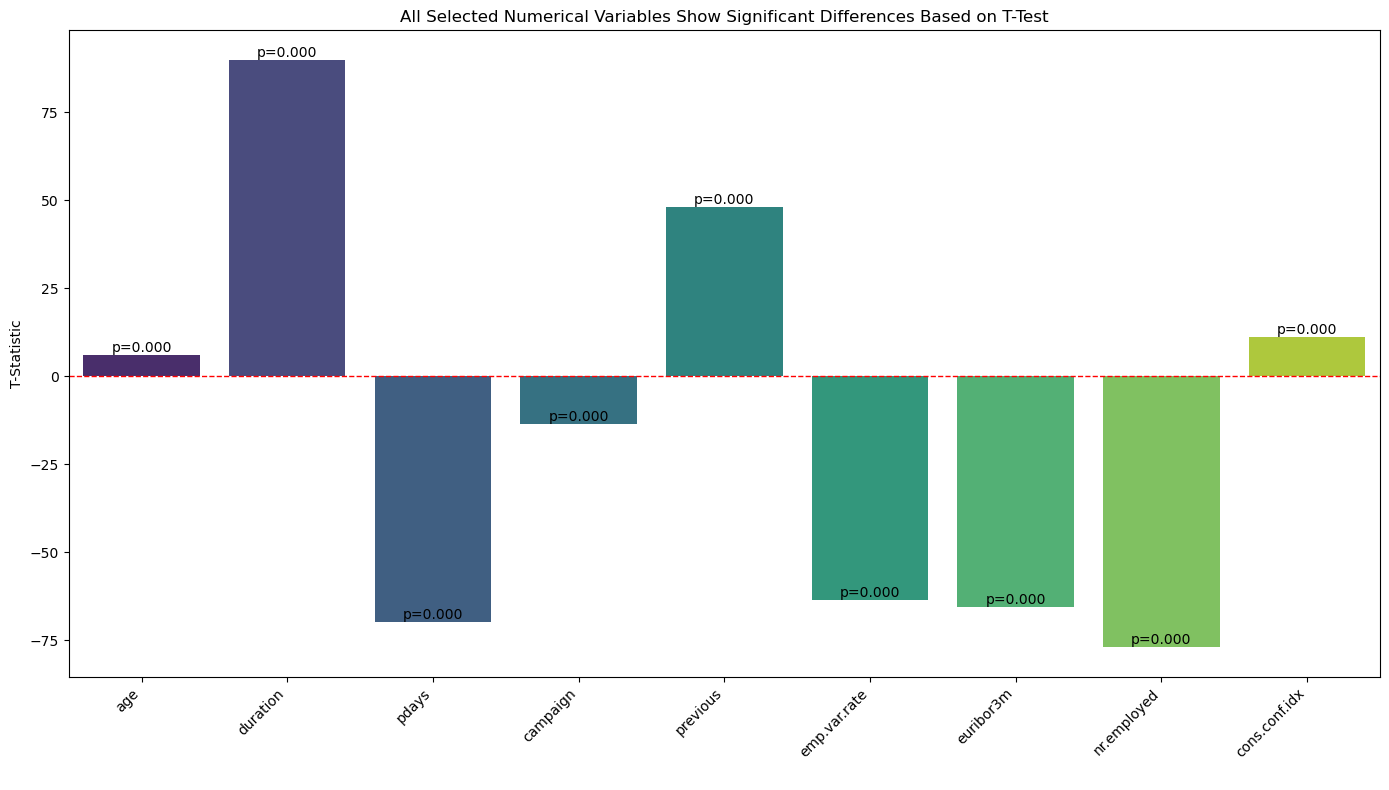

In [95]:
# List of numerical columns to perform t-tests
numerical_columns = ['age','duration', 'pdays', 'campaign', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed','cons.conf.idx']

# Initialize lists to store t-statistics and p-values
t_stats = []
p_values = []

# Perform t-tests for numerical variables
for col in numerical_columns:
    group_yes = df[df['y'] == 'yes'][col]
    group_no = df[df['y'] == 'no'][col]
    t_stat, p_val = ttest_ind(group_yes, group_no, nan_policy='omit')
    t_stats.append(t_stat)
    p_values.append(p_val)
    print(f"{col}: t-statistic = {t_stat:.2f}, p-value = {p_val:.3f}")

# Create a DataFrame for visualization
t_test_results = pd.DataFrame({
    'Variable': numerical_columns,
    't-statistic': t_stats,
    'p-value': p_values
})

# Plotting the t-statistics
plt.figure(figsize=(14, 8))
sns.barplot(x='Variable', y='t-statistic', data=t_test_results, palette='viridis')
plt.axhline(0, color='red', linewidth=1, linestyle='--')
plt.title('All Selected Numerical Variables Show Significant Differences Based on T-Test')
plt.xlabel(' ')
plt.ylabel('T-Statistic')
plt.xticks(rotation=45, ha='right')

# Annotate bars with p-values
for index, row in t_test_results.iterrows():
    plt.text(index, row['t-statistic'], f"p={row['p-value']:.3f}", color='black', ha="center", va="bottom")

plt.tight_layout()
plt.show()

## Correlations with Response Variable.

In [99]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [100]:
df['y_encoded'] = label_encoder.fit_transform(df['y'])

In [101]:
correlation_matrix = df[numerical_columns].corrwith(df['y_encoded'])

print("Correlation of numerical variables with the target variable:")
print(correlation_matrix)

Correlation of numerical variables with the target variable:
age              0.030381
duration         0.405297
pdays           -0.324948
campaign        -0.066361
previous         0.230202
emp.var.rate    -0.298289
euribor3m       -0.307740
nr.employed     -0.354669
cons.conf.idx    0.054802
dtype: float64


Findings:

Informative Features:

duration
nr.employed
pdays
euribor3m
emp.var.rate
previous

Less Informative Features:

cons.price.idx
campaign
age

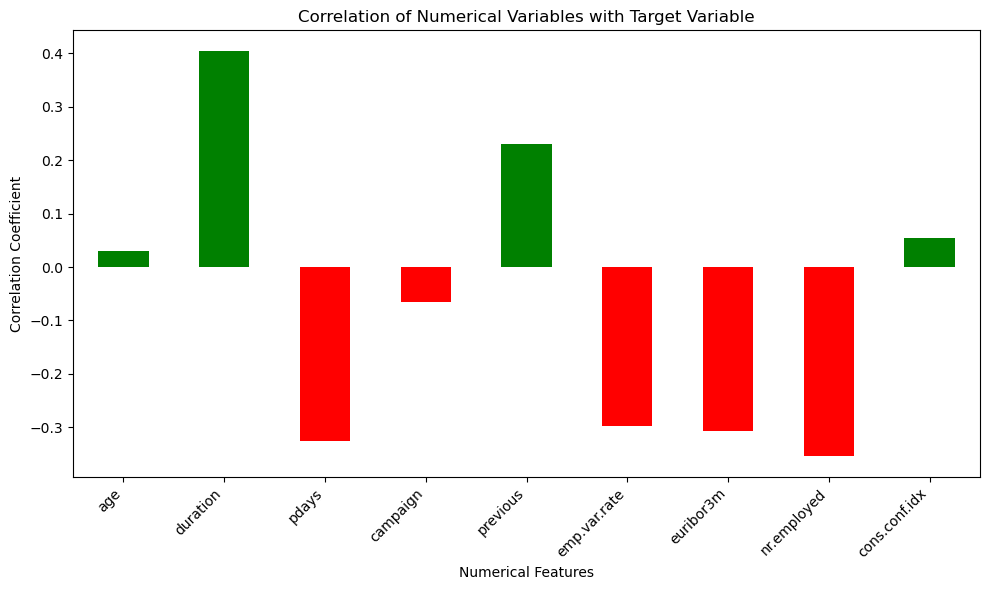

In [102]:
# for read me

plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in correlation_matrix]
correlation_matrix.plot(kind='bar', color=colors)
plt.title('Correlation of Numerical Variables with Target Variable')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

## Step 1: Categorical variables encoding
## Step 2: Numerical transofrmaton and create new features
## Step 3: cluster and segmentionation analysis 


In [105]:
# Log Transform 'duration'

df_1['duration_log'] = np.log1p(df_1['duration'])

# Create segments for 'campaign'
df_1['campaign_segment'] = pd.cut(df_1['campaign'], bins=[0, 2, 5, float('inf')], labels=['Few', 'Moderate', 'Many'])

# Segment 'pdays' into meaningful categories
df_1['pdays_segment'] = pd.cut(df_1['pdays'], bins=[-1, 100, float('inf')], labels=['Below 100 days', '100 days and above'])

# Segment 'previous' into meaningful categories
df_1['previous_segment'] = pd.cut(df_1['previous'], bins=[-1, 0, 1, float('inf')], labels=['0 previous', '1 previous', '2 or more previous'])

# Segment 'euribor3m' into meaningful categories
df_1['euribor3m_segment'] = pd.cut(df_1['euribor3m'], bins=[-1, 3, float('inf')], labels=['Below 3', '3 and above'])



In [106]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            41176 non-null  int64   
 1   duration                       41176 non-null  int64   
 2   campaign                       41176 non-null  int64   
 3   pdays                          41176 non-null  int64   
 4   previous                       41176 non-null  int64   
 5   emp.var.rate                   41176 non-null  float64 
 6   cons.price.idx                 41176 non-null  float64 
 7   cons.conf.idx                  41176 non-null  float64 
 8   euribor3m                      41176 non-null  float64 
 9   nr.employed                    41176 non-null  float64 
 10  y                              41176 non-null  object  
 11  y_encoded                      41176 non-null  int32   
 12  job_admin.                     41176 

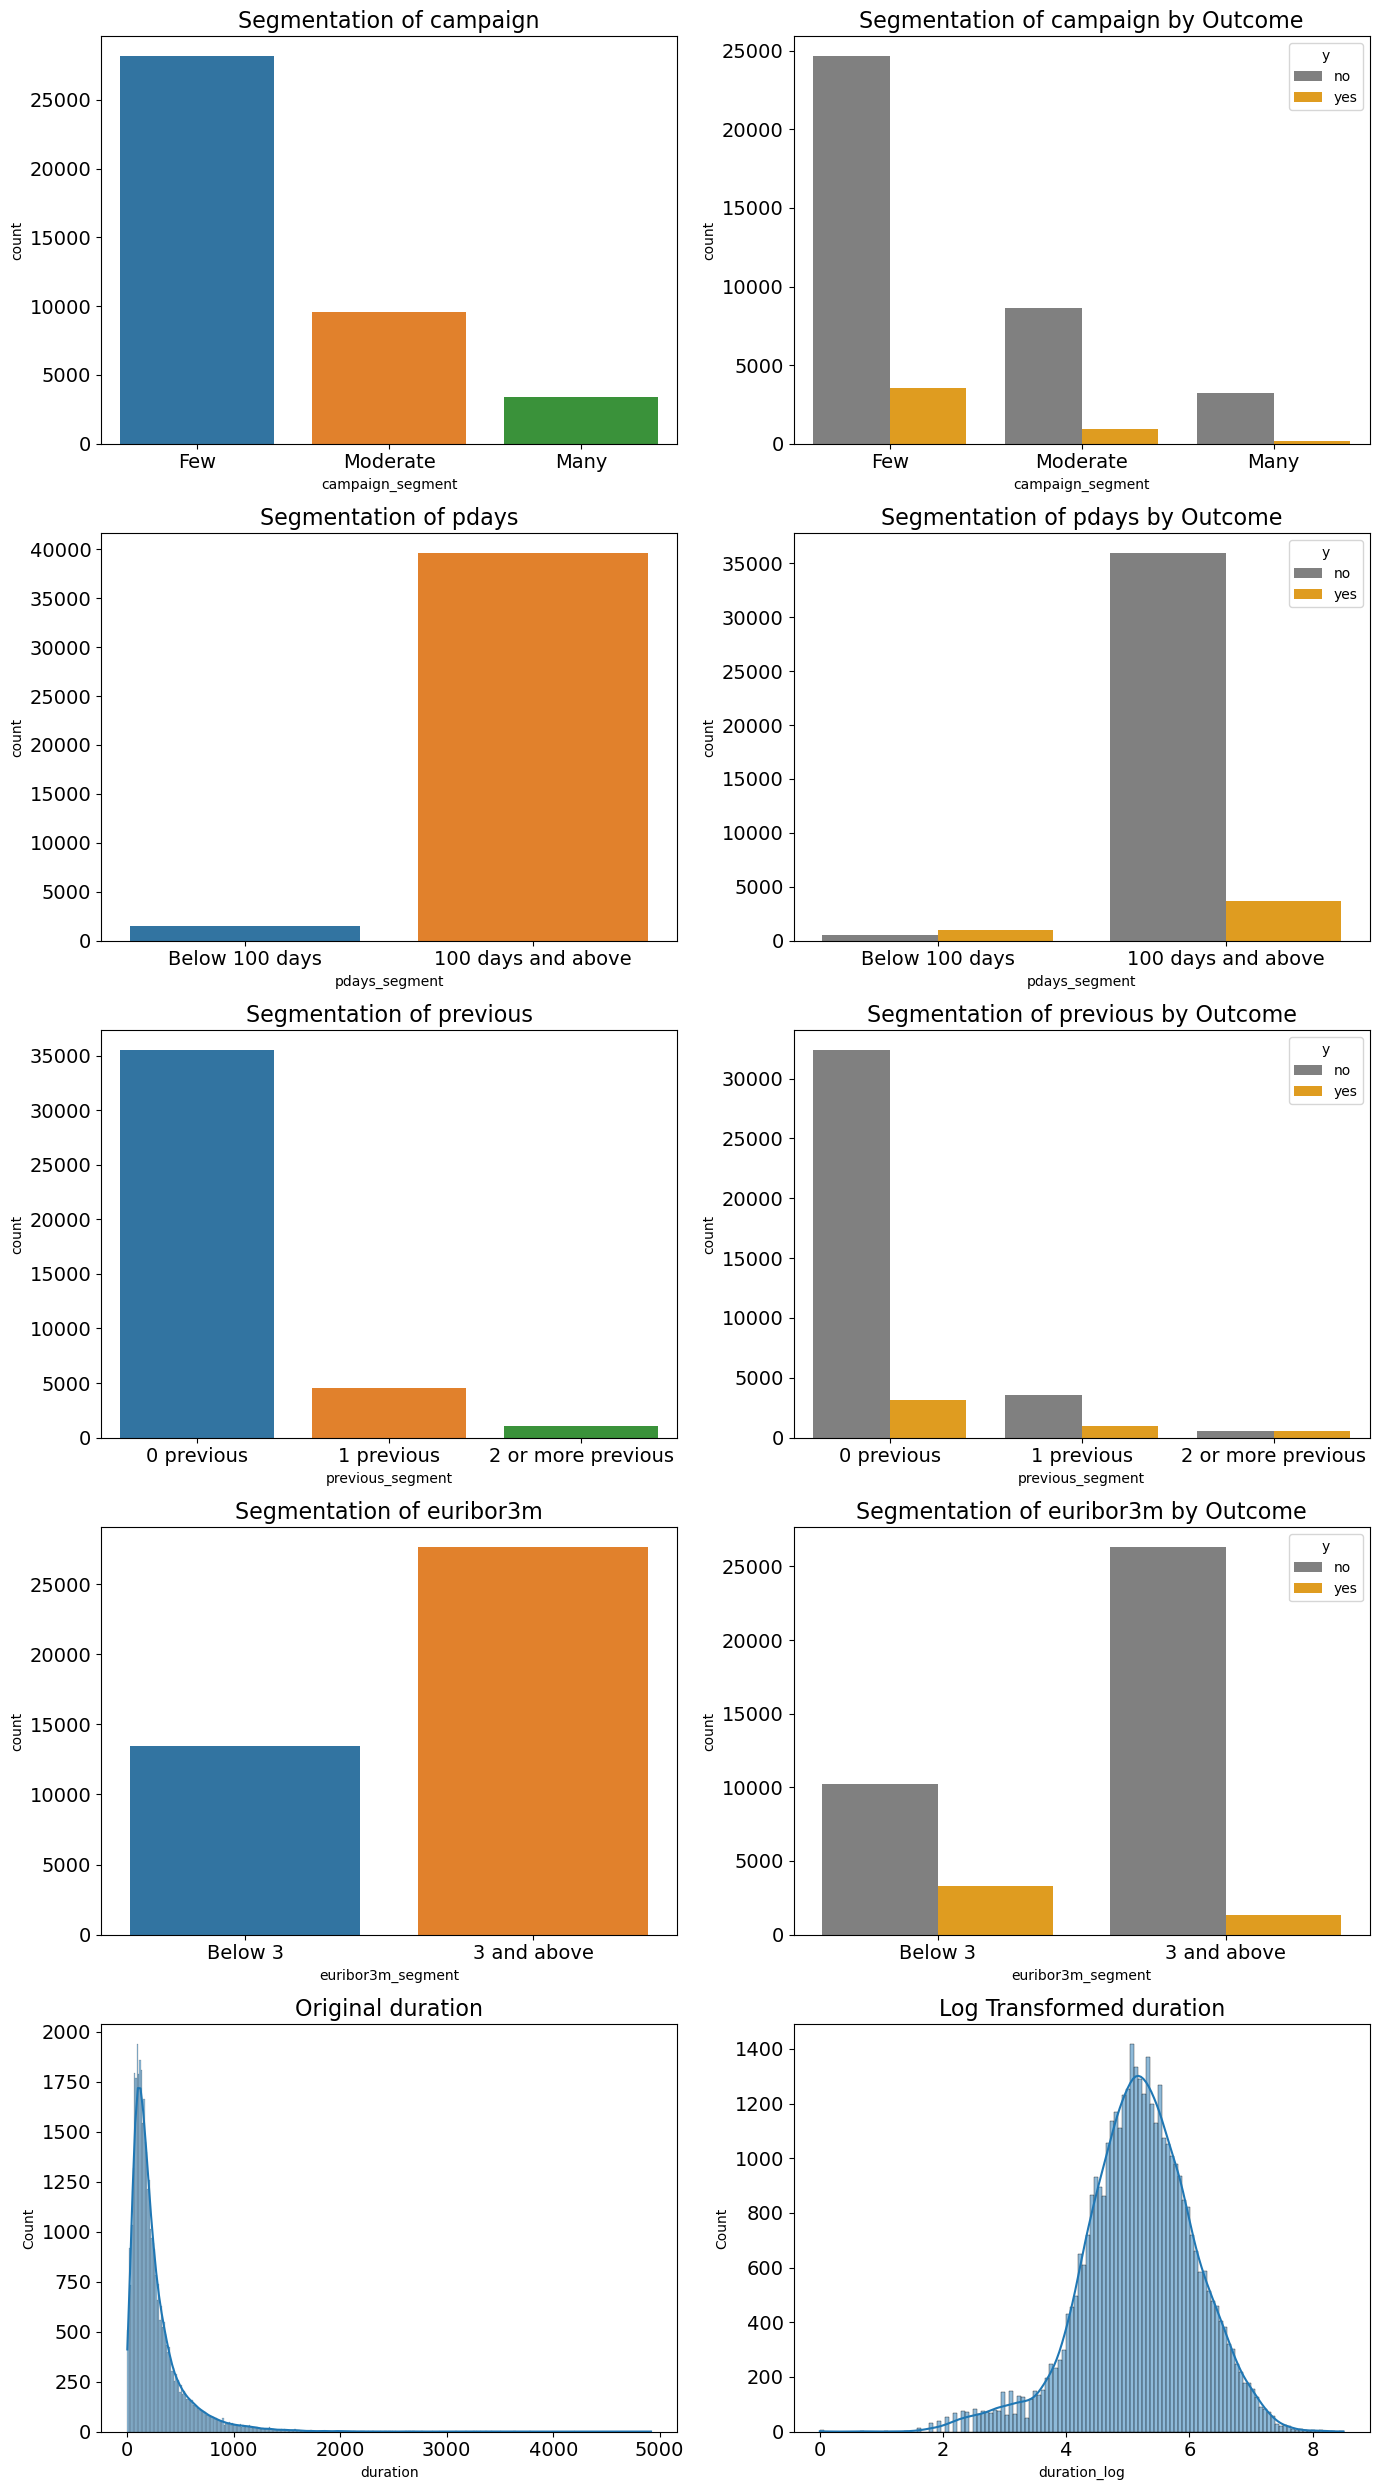

In [108]:
# Visualize the new features and their relationship with the outcome variable
title_fontsize = 16
label_fontsize = 14

def visualize_new_features(df):
    plt.figure(figsize=(14, 25))

    # Segmentation of 'campaign'
    plt.subplot(5, 2, 1)
    sns.countplot(x='campaign_segment', data=df_1)
    plt.title('Segmentation of campaign', fontsize=title_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)

    plt.subplot(5, 2, 2)
    sns.countplot(x='campaign_segment', hue='y', data=df_1, palette={'yes': 'orange', 'no': 'gray'})
    plt.title('Segmentation of campaign by Outcome', fontsize=title_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)            

    # Segmentation of 'pdays'
    plt.subplot(5, 2, 3)
    sns.countplot(x='pdays_segment', data=df_1)
    plt.title('Segmentation of pdays', fontsize=title_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)
    
    plt.subplot(5, 2, 4)
    sns.countplot(x='pdays_segment', hue='y', data=df_1, palette={'yes': 'orange', 'no': 'gray'})
    plt.title('Segmentation of pdays by Outcome', fontsize=title_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)
    
    # Segmentation of 'previous'
    plt.subplot(5, 2, 5)
    sns.countplot(x='previous_segment', data=df_1)
    plt.title('Segmentation of previous', fontsize=title_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)
    
    plt.subplot(5, 2, 6)
    sns.countplot(x='previous_segment', hue='y', data=df_1, palette={'yes': 'orange', 'no': 'gray'})
    plt.title('Segmentation of previous by Outcome', fontsize=title_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)
    
    
    # Segmentation of 'euribor3m'
    plt.subplot(5, 2, 7)
    sns.countplot(x='euribor3m_segment', data=df_1)
    plt.title('Segmentation of euribor3m', fontsize=title_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)

    plt.subplot(5, 2, 8)
    sns.countplot(x='euribor3m_segment', hue='y', data=df_1, palette={'yes': 'orange', 'no': 'gray'})
    plt.title('Segmentation of euribor3m by Outcome', fontsize=title_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)

    # Original 'duration'
    plt.subplot(5, 2, 9)
    sns.histplot(df_1['duration'], kde=True)
    plt.title('Original duration', fontsize=title_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)

    # Log-transformed 'duration'
    plt.subplot(5, 2, 10)
    sns.histplot(df_1['duration_log'], kde=True)
    plt.title('Log Transformed duration', fontsize=title_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)

    plt.tight_layout()
    plt.show()

visualize_new_features(df_1)

In [117]:
# Define categorical features for one-hot encoding
# Identify categorical features based on data types
categorical_features = df_1.select_dtypes(include=['object']).columns.tolist()

# Create dummy variables for all categorical features
df_2 = pd.get_dummies(df_1, columns=categorical_features, drop_first=False)




In [119]:
# Drop 'y'
df_2.drop(columns=['y_no', 'y_yes'], inplace=True)

In [121]:
# Define new features for one-hot encoding
New_features = ['campaign_segment','pdays_segment', 'previous_segment','euribor3m_segment']

# Apply one-hot encoding
df_2 = pd.get_dummies(df_2, columns=New_features, drop_first=False)


In [197]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   campaign                       41176 non-null  int64  
 2   previous                       41176 non-null  int64  
 3   cons.price.idx                 41176 non-null  float64
 4   cons.conf.idx                  41176 non-null  float64
 5   euribor3m                      41176 non-null  float64
 6   y_encoded                      41176 non-null  int32  
 7   job_admin.                     41176 non-null  bool   
 8   job_blue-collar                41176 non-null  bool   
 9   job_entrepreneur               41176 non-null  bool   
 10  job_housemaid                  41176 non-null  bool   
 11  job_management                 41176 non-null  bool   
 12  job_retired                    41176 non-null  bool

In [196]:
df_2.columns

Index(['age', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'y_encoded', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
   

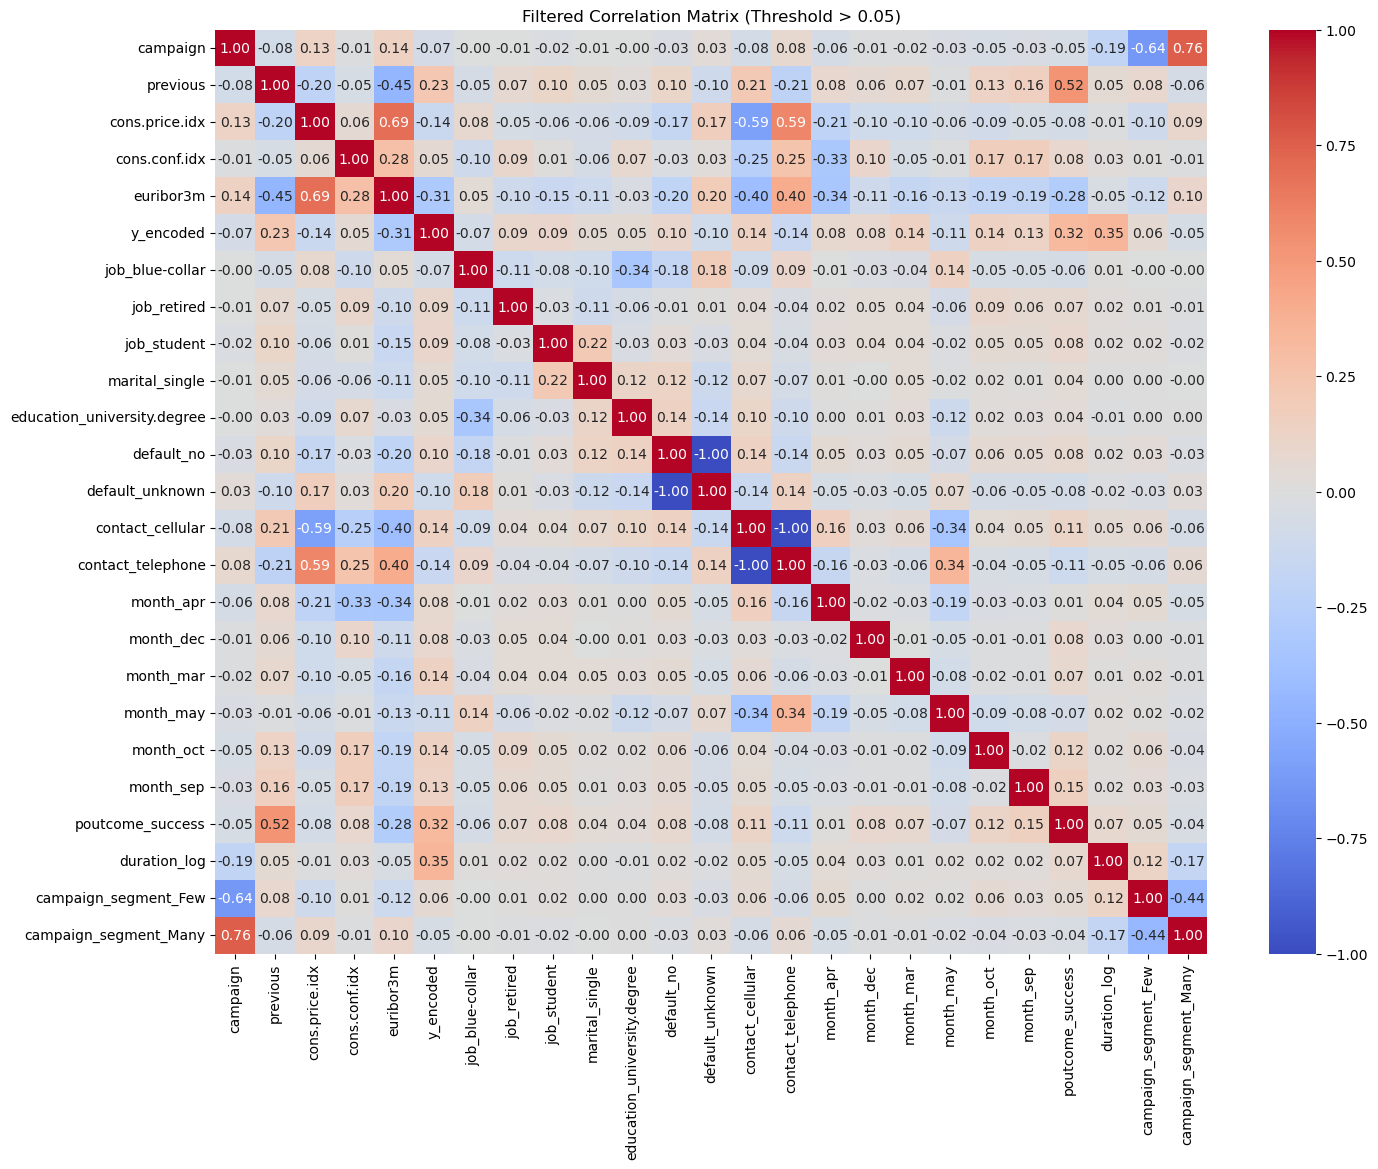

In [195]:
correlation_matrix = df_2.corr()


# Set a threshold for filtering
threshold = 0.05

# Find features that have high correlation with the target variable
target_correlations = correlation_matrix['y_encoded'].abs()
high_corr_features = target_correlations[target_correlations > threshold].index

# Filter the correlation matrix to include only highly correlated features
filtered_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

# Plot the filtered correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Filtered Correlation Matrix (Threshold > 0.05)')
plt.show()

# Insights from Correlations

Highly correlated with Target Varibale 'y'

euribor3m: 0.32
duration: 0.14
emp.var.rate: 0.14
nr.employed: 0.14
poutcome_success: -0.15
poutcome_nonexistent: 0.14
previous: 0.12
euribor3m_segment_3 and above: 0.12

Also there is highly correlatonship beween features. 

Highly Correlated Feature Pairs:
pdays and previous: Correlation = -0.59
emp.var.rate and euribor3m: Correlation = 0.95
emp.var.rate and nr.employed: Correlation = 0.91
euribor3m and nr.employed: Correlation = 0.94
euribor3m_segment_3 and above and euribor3m: Correlation = 0.94
poutcome_nonexistent and previous_segment_0 previous: Correlation = 0.95
previous_segment_1 previous and poutcome_success: Correlation = 0.88
previous_segment_2 or more previous and previous: Correlation = 0.88
These feature pairs have high correlation values and might introduce multicollinearity into your model if both features in the pair are included. You might consider removing or combining these features to reduce multicollinearity.

Summary:

pdays and previous are moderately negatively correlated.
emp.var.rate, euribor3m, and nr.employed are highly positively correlated with each other.
euribor3m_segment_3 and above is highly correlated with euribor3m.
poutcome_nonexistent and previous_segment_0 previous are highly correlated.
previous_segment_1 previous and poutcome_success are highly correlated.
previous_segment_2 or more previous is highly correlated with previous.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [198]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [199]:
# Separate features and target variable
X = df_2.drop(columns=['y_encoded'])
y = df_2['y_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)



### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

All variables are included in the initial model. I use Random Forest to identify the most important features and assess multicollinearity factors (VIF analysis) to exclude any highly correlated variables for further modeling

Then I exlude some variables based on previous correlatonship and results from my based model and VIF analysis to make sure all variables are selected are correlated with target variables without mlticollinearity concern.

then I true top 20, 15 and 12 of important variables to run Random forest models. 
i FOUND TOP 12 give me the best F-1 Score. 

I then use serach optimized threshoholds, grid serach to identify the best model for random forest classifere. 

then I tried other 5 classiferes to the top 12 selected features to compare the performance

Top Features based on Random Forest:
                             importance
duration_log                   0.272270
euribor3m                      0.121471
age                            0.077889
cons.price.idx                 0.043483
cons.conf.idx                  0.038623
poutcome_success               0.038059
campaign                       0.030894
previous                       0.019688
housing_yes                    0.013287
housing_no                     0.013239
education_university.degree    0.012415
job_admin.                     0.012194
marital_married                0.011767
education_high.school          0.011437
day_of_week_thu                0.011377
day_of_week_mon                0.011364
day_of_week_wed                0.010973
poutcome_failure               0.010920
day_of_week_tue                0.010843
marital_single                 0.010595


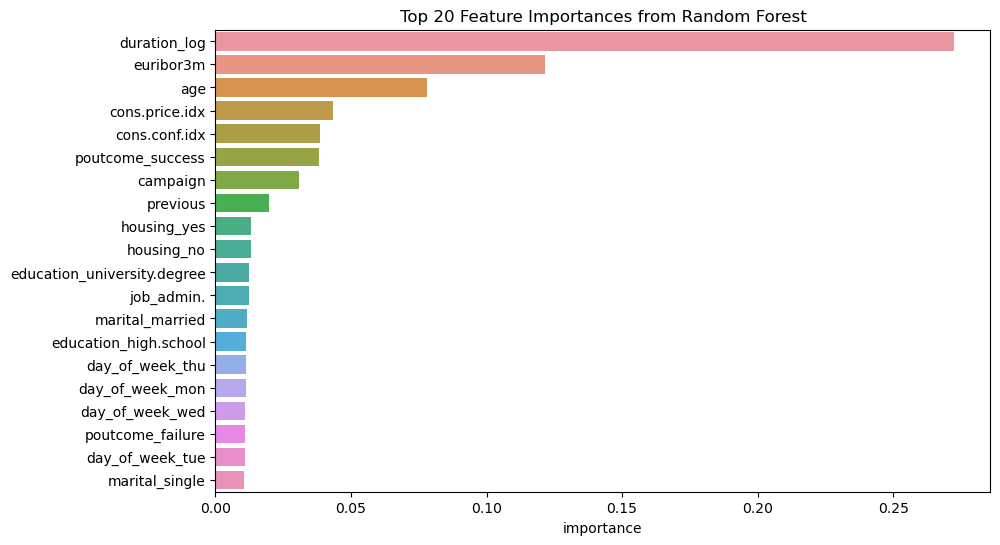

In [200]:

# Train a Random Forest model on the scaled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display top features
print("Top Features based on Random Forest:")
print(feature_importances.head(20))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(20).importance, y=feature_importances.head(20).index)
plt.title('Top 20 Feature Importances from Random Forest')
plt.show()



Variance Inflation Factor (VIF) for top features:
                             feature           VIF
0                           duration  3.025418e+00
1                       duration_log  3.143216e+00
2                          euribor3m  2.343753e+02
3                                age  1.109914e+00
4                        nr.employed  3.562891e+01
5                      cons.conf.idx  2.710842e+00
6                           campaign  1.099332e+00
7                     cons.price.idx  6.442062e+00
8                   poutcome_success  1.156579e+01
9                              pdays  7.743577e+04
10                      emp.var.rate  4.129200e+01
11  pdays_segment_100 days and above           inf
12         euribor3m_segment_Below 3           inf
13     euribor3m_segment_3 and above           inf
14      pdays_segment_Below 100 days           inf
15                       housing_yes  1.118654e+01
16       education_university.degree  1.146400e+00
17                        housin

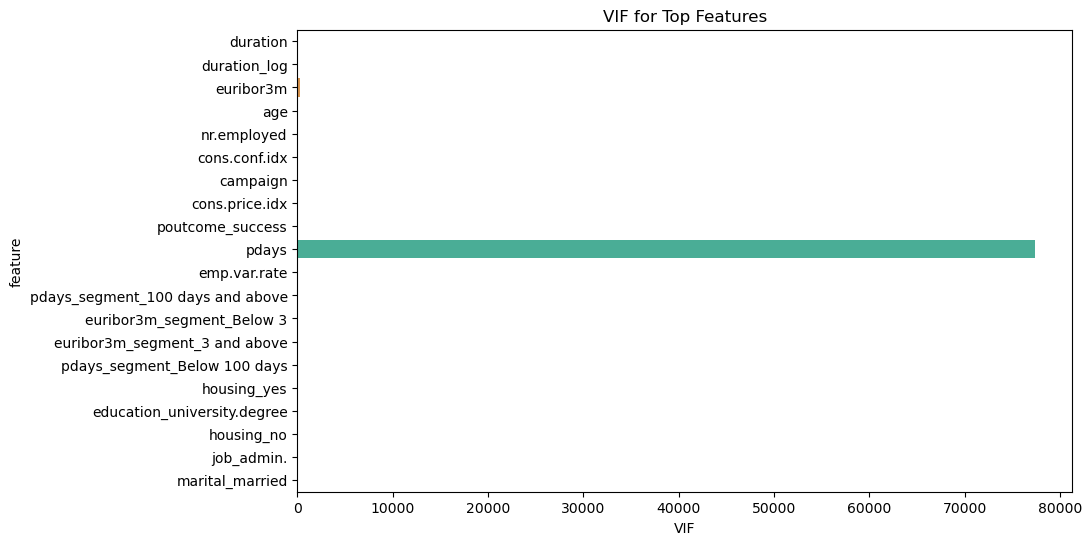

In [136]:
# VIF Analysis for top features
top_features = feature_importances.index[:20]  # Adjust number of top features as needed
X_vif = X_train_scaled[:, [X.columns.get_loc(col) for col in top_features]]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = top_features
vif_data["VIF"] = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]

# Display VIF
print("Variance Inflation Factor (VIF) for top features:")
print(vif_data)

# Plot VIF
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="feature", data=vif_data)
plt.title('VIF for Top Features')
plt.show()

## Insights:

High VIF Values (Potential Multicollinearity Issues):


pdays_segment_100 days and above
euribor3m_segment_Below 3
euribor3m_segment_3 and above
pdays_segment_Below 100 days 

Moderate VIF Values:

pdays: VIF = 77435.77
emp.var.rate: VIF = 41292.00
nr.employed: VIF = 35629.81


Acceptable VIF Values (Below 10):

duration: VIF = 3.82
duration_log: VIF = 3.14
euribor3m: VIF = 3.24
age: VIF = 1.10
cons.conf.idx: VIF = 2.70
campaign: VIF = 1.89
cons.price.idx: VIF = 4.64
poutcome_success: VIF = 5.16
housing_yes: VIF = 1.11
education_university.degree: VIF = 1.46
housing_no: VIF = 1.11
job_admin.: VIF = 1.13
marital_married: VIF = 1.10
Recommendations:

Exclude Features with Inf VIF Values:

pdays_segment_100 days and above
euribor3m_segment_Below 100 days
euribor3m_segment_3 and above
pdays_segment_Below 100 days


Consider Excluding Features with Very High VIF Values (Above 10):

pdays
emp.var.rate
nr.employed
    

the VIF insights is consistent with Previous Correlation Anlayis
Drop pdays_segment_100 days and above: VIF = inf
euribor3m_segment_Below 100 days: VIF = inf
euribor3m_segment_3 and above: VIF = inf
pdays_segment_Below 100 days: VIF = inf
emp.var.rate
pdays

Based on Correlation and Random Forest Top feature and VIF analysis 

the following variables are excluded from further modelling

Columnsdropped = 'Duration', 'pdays_segment_100 days and above',
'euribor3m_segment_Below 3',
'euribor3m_segment_3 and above',
'pdays_segment_Below 100 days',
'emp.var.rate','poutcome_nonexistent', 'previous_segment_1 previous',' previous_segment_0', 'previous_segment_2 or more', 'euribor3m' ] 


In [153]:
df_filtered = df_2

In [162]:
columns_to_remove = [ 'pdays','nr.employed' ] 
df_filtered.drop(columns=columns_to_remove, inplace=True)


In [201]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   campaign                       41176 non-null  int64  
 2   previous                       41176 non-null  int64  
 3   cons.price.idx                 41176 non-null  float64
 4   cons.conf.idx                  41176 non-null  float64
 5   euribor3m                      41176 non-null  float64
 6   y_encoded                      41176 non-null  int32  
 7   job_admin.                     41176 non-null  bool   
 8   job_blue-collar                41176 non-null  bool   
 9   job_entrepreneur               41176 non-null  bool   
 10  job_housemaid                  41176 non-null  bool   
 11  job_management                 41176 non-null  bool   
 12  job_retired                    41176 non-null  bool

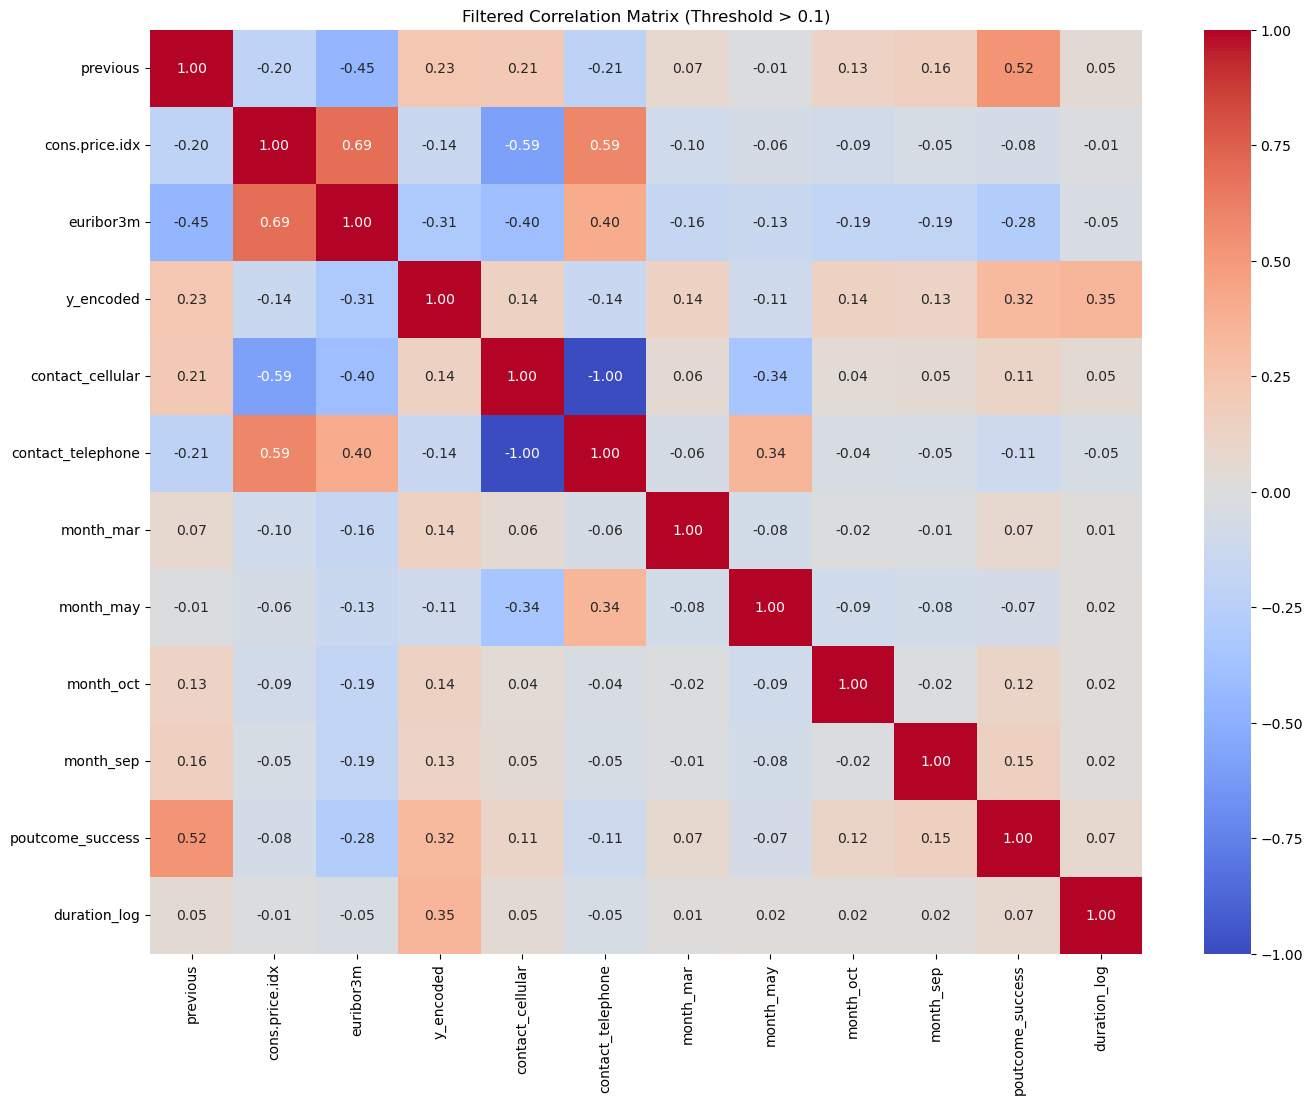

In [202]:
correlation_matrix = df_filtered.corr()

# Set a threshold for filtering
threshold = 0.1

# Find features that have high correlation with the target variable
target_correlations = correlation_matrix['y_encoded'].abs()
high_corr_features = target_correlations[target_correlations > threshold].index

# Filter the correlation matrix to include only highly correlated features
filtered_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

# Plot the filtered correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Filtered Correlation Matrix (Threshold > 0.1)')
plt.show()

Top Features based on Random Forest:
                             importance
duration_log                   0.272270
euribor3m                      0.121471
age                            0.077889
cons.price.idx                 0.043483
cons.conf.idx                  0.038623
poutcome_success               0.038059
campaign                       0.030894
previous                       0.019688
housing_yes                    0.013287
housing_no                     0.013239
education_university.degree    0.012415
job_admin.                     0.012194
marital_married                0.011767
education_high.school          0.011437
day_of_week_thu                0.011377
day_of_week_mon                0.011364
day_of_week_wed                0.010973
poutcome_failure               0.010920
day_of_week_tue                0.010843
marital_single                 0.010595


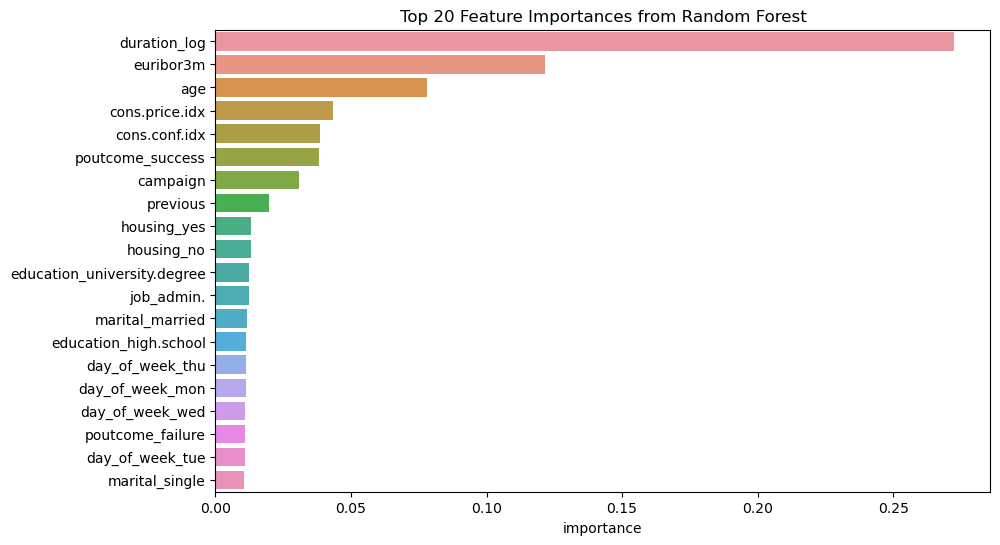

In [203]:
X = df_filtered.drop(columns=['y_encoded'])
y = df_filtered['y_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model on the scaled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display top features
print("Top Features based on Random Forest:")
print(feature_importances.head(20))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(20).importance, y=feature_importances.head(20).index)
plt.title('Top 20 Feature Importances from Random Forest')
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

In [169]:
from sklearn.metrics import classification_report
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10929
           1       0.67      0.43      0.52      1424

    accuracy                           0.91     12353
   macro avg       0.80      0.70      0.74     12353
weighted avg       0.90      0.91      0.90     12353



Top 20 Features DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration_log                 41176 non-null  float64
 1   euribor3m                    41176 non-null  float64
 2   age                          41176 non-null  int64  
 3   cons.price.idx               41176 non-null  float64
 4   cons.conf.idx                41176 non-null  float64
 5   poutcome_success             41176 non-null  bool   
 6   campaign                     41176 non-null  int64  
 7   previous                     41176 non-null  int64  
 8   housing_yes                  41176 non-null  bool   
 9   housing_no                   41176 non-null  bool   
 10  education_university.degree  41176 non-null  bool   
 11  job_admin.                   41176 non-null  bool   
 12  marital_married              41176 non-null  bo

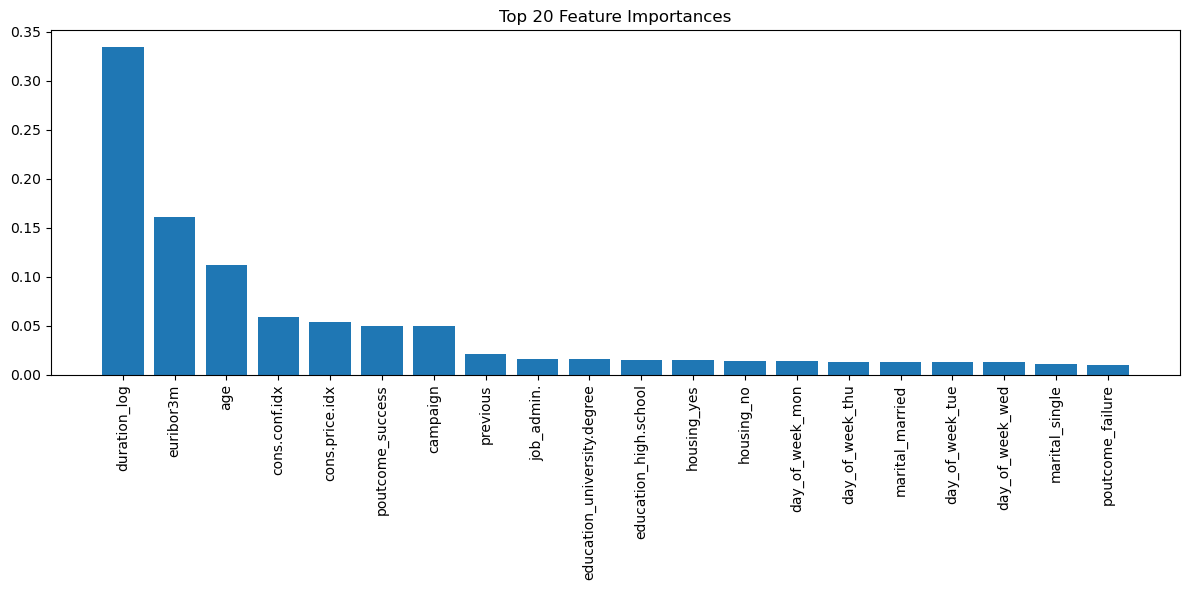

In [171]:
X = df_filtered.drop(columns=['y_encoded'])
y = df_filtered['y_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model on the scaled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Define the top 20 features
top_20_indices = indices[:20]
top_20_features = [X.columns[i] for i in top_20_indices]

# Filter the DataFrame to include only the top 20 features
df_top_20 = df_filtered[top_20_features + ['y_encoded']]

# Verify the new filtered DataFrame
print("Top 20 Features DataFrame Info:")
print(df_top_20.info())

# Split the data into features (X) and target (y)
X_top_20 = df_top_20.drop('y_encoded', axis=1)
y_top_20 = df_top_20['y_encoded']

# Split the data into training and testing sets
X_train_top_20, X_test_top_20, y_train_top_20, y_test_top_20 = train_test_split(X_top_20, y_top_20, test_size=0.3, random_state=42)

# Initialize the StandardScaler for the top 20 features
scaler_top_20 = StandardScaler()

# Fit and transform the training data for top 20 features
X_train_top_20_scaled = scaler_top_20.fit_transform(X_train_top_20)

# Transform the testing data for top 20 features
X_test_top_20_scaled = scaler_top_20.transform(X_test_top_20)

# Train a Random Forest Classifier on the top 20 features
clf_top_20 = RandomForestClassifier(random_state=42)
clf_top_20.fit(X_train_top_20_scaled, y_train_top_20)

# Predict on the test set
y_pred_top_20 = clf_top_20.predict(X_test_top_20_scaled)

# Evaluate the model
print(classification_report(y_test_top_20, y_pred_top_20))

# Visualize feature importance for top 20 features
importances_top_20 = clf_top_20.feature_importances_
indices_top_20 = np.argsort(importances_top_20)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(X_top_20.shape[1]), importances_top_20[indices_top_20], align="center")
plt.xticks(range(X_top_20.shape[1]), [X_top_20.columns[i] for i in indices_top_20], rotation=90)
plt.tight_layout()
plt.show()

Top 15 Features DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration_log                 41176 non-null  float64
 1   euribor3m                    41176 non-null  float64
 2   age                          41176 non-null  int64  
 3   cons.price.idx               41176 non-null  float64
 4   cons.conf.idx                41176 non-null  float64
 5   poutcome_success             41176 non-null  bool   
 6   campaign                     41176 non-null  int64  
 7   previous                     41176 non-null  int64  
 8   housing_yes                  41176 non-null  bool   
 9   housing_no                   41176 non-null  bool   
 10  education_university.degree  41176 non-null  bool   
 11  job_admin.                   41176 non-null  bool   
 12  marital_married              41176 non-null  bo

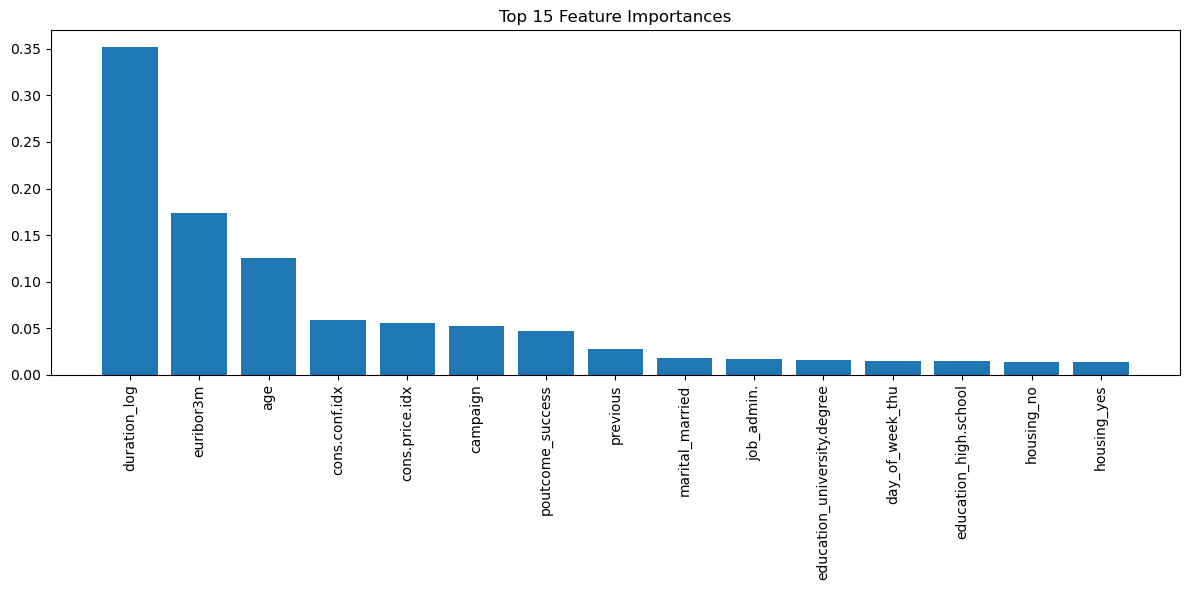

In [172]:
top_15_indices = indices[:15]
top_15_features = [X.columns[i] for i in top_15_indices]

# Filter the DataFrame to include only the top 15 features
df_top_15 = df_filtered[top_15_features + ['y_encoded']]

# Verify the new filtered DataFrame
print("Top 15 Features DataFrame Info:")
print(df_top_15.info())

# Split the data into features (X) and target (y)
X_top_15 = df_top_15.drop('y_encoded', axis=1)
y_top_15 = df_top_15['y_encoded']

# Split the data into training and testing sets
X_train_top_15, X_test_top_15, y_train_top_15, y_test_top_15 = train_test_split(X_top_15, y_top_15, test_size=0.3, random_state=42)

# Initialize the StandardScaler for the top 15 features
scaler_top_15 = StandardScaler()

# Fit and transform the training data for top 15 features
X_train_top_15_scaled = scaler_top_15.fit_transform(X_train_top_15)

# Transform the testing data for top 15 features
X_test_top_15_scaled = scaler_top_15.transform(X_test_top_15)

# Train a Random Forest Classifier on the top 15 features
clf_top_15 = RandomForestClassifier(random_state=42)
clf_top_15.fit(X_train_top_15_scaled, y_train_top_15)

# Predict on the test set
y_pred_top_15 = clf_top_15.predict(X_test_top_15_scaled)

# Evaluate the model
print(classification_report(y_test_top_15, y_pred_top_15))

# Visualize feature importance for top 15 features
importances_top_15 = clf_top_15.feature_importances_
indices_top_15 = np.argsort(importances_top_15)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(X_top_15.shape[1]), importances_top_15[indices_top_15], align="center")
plt.xticks(range(X_top_15.shape[1]), [X_top_15.columns[i] for i in indices_top_15], rotation=90)
plt.tight_layout()
plt.show()

Top 12 Features DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration_log                 41176 non-null  float64
 1   euribor3m                    41176 non-null  float64
 2   age                          41176 non-null  int64  
 3   cons.price.idx               41176 non-null  float64
 4   cons.conf.idx                41176 non-null  float64
 5   poutcome_success             41176 non-null  bool   
 6   campaign                     41176 non-null  int64  
 7   previous                     41176 non-null  int64  
 8   housing_yes                  41176 non-null  bool   
 9   housing_no                   41176 non-null  bool   
 10  education_university.degree  41176 non-null  bool   
 11  job_admin.                   41176 non-null  bool   
 12  y_encoded                    41176 non-null  in

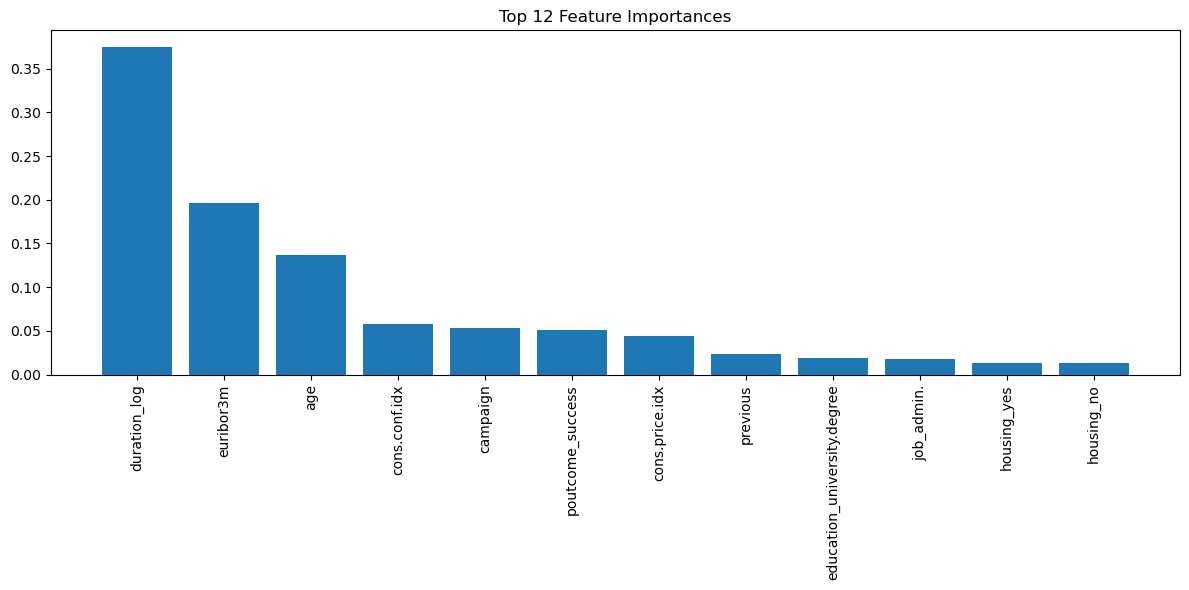

In [173]:
# Define the top 12 features
top_12_indices = indices[:12]
top_12_features = [X.columns[i] for i in top_12_indices]

# Filter the DataFrame to include only the top 12 features
df_top_12 = df_filtered[top_12_features + ['y_encoded']]

# Verify the new filtered DataFrame
print("Top 12 Features DataFrame Info:")
print(df_top_12.info())

# Split the data into features (X) and target (y)
X_top_12 = df_top_12.drop('y_encoded', axis=1)
y_top_12 = df_top_12['y_encoded']

# Split the data into training and testing sets
X_train_top_12, X_test_top_12, y_train_top_12, y_test_top_12 = train_test_split(X_top_12, y_top_12, test_size=0.3, random_state=42)

# Initialize the StandardScaler for the top 12 features
scaler_top_12 = StandardScaler()

# Fit and transform the training data for top 12 features
X_train_top_12_scaled = scaler_top_12.fit_transform(X_train_top_12)

# Transform the testing data for top 12 features
X_test_top_12_scaled = scaler_top_12.transform(X_test_top_12)

# Train a Random Forest Classifier on the top 12 features
clf_top_12 = RandomForestClassifier(random_state=42)
clf_top_12.fit(X_train_top_12_scaled, y_train_top_12)

# Predict on the test set
y_pred_top_12 = clf_top_12.predict(X_test_top_12_scaled)

# Evaluate the model
print(classification_report(y_test_top_12, y_pred_top_12))

# Visualize feature importance for top 12 features
importances_top_12 = clf_top_12.feature_importances_
indices_top_12 = np.argsort(importances_top_12)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Top 12 Feature Importances")
plt.bar(range(X_top_12.shape[1]), importances_top_12[indices_top_12], align="center")
plt.xticks(range(X_top_12.shape[1]), [X_top_12.columns[i] for i in indices_top_12], rotation=90)
plt.tight_layout()
plt.show()

### Problem 8: A Simple Model

Use Random Forest to build a basic model on your data.  

In [177]:
from sklearn.metrics import classification_report, f1_score, precision_recall_curve

Optimal threshold: 0.30000000000000004
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     10929
           1       0.55      0.77      0.64      1424

    accuracy                           0.90     12353
   macro avg       0.76      0.84      0.79     12353
weighted avg       0.92      0.90      0.91     12353



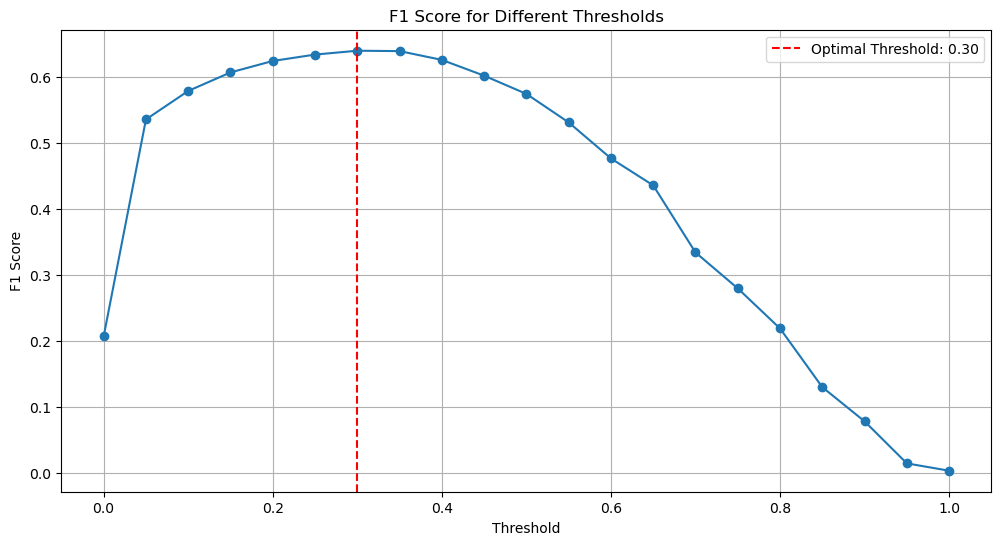

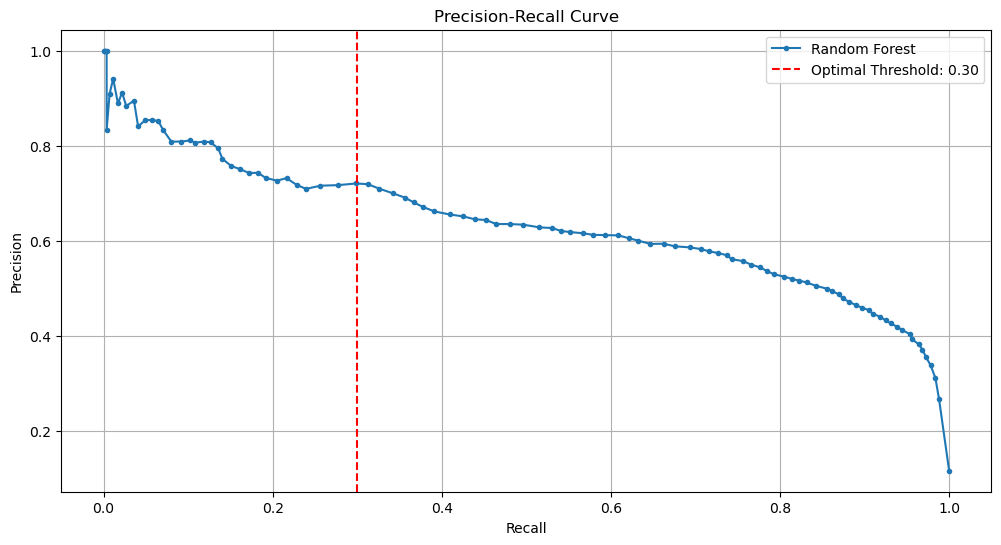

In [178]:
# 1. Predict probabilities on the test set
y_prob_top_12 = clf_top_12.predict_proba(X_test_top_12_scaled)[:, 1]

# 2. Evaluate different thresholds
def evaluate_thresholds(y_true, y_prob):
    thresholds = np.arange(0.0, 1.05, 0.05)
    f1_scores = []
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        f1_scores.append(f1)
    return thresholds, f1_scores

thresholds, f1_scores = evaluate_thresholds(y_test_top_12, y_prob_top_12)

# 3. Find the optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f'Optimal threshold: {optimal_threshold}')

# 4. Predict using the optimal threshold
y_pred_optimal = (y_prob_top_12 >= optimal_threshold).astype(int)

# 5. Evaluate the model with the optimal threshold
print(classification_report(y_test_top_12, y_pred_optimal))

# 6. Visualize the F1 scores for different thresholds
plt.figure(figsize=(12, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Thresholds')
plt.legend()
plt.grid()
plt.show()

# 7. Plot precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_top_12, y_prob_top_12)
plt.figure(figsize=(12, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_recall_curve, roc_curve, auc, accuracy_score

Top 12 Features DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration_log                 41176 non-null  float64
 1   euribor3m                    41176 non-null  float64
 2   age                          41176 non-null  int64  
 3   cons.price.idx               41176 non-null  float64
 4   cons.conf.idx                41176 non-null  float64
 5   poutcome_success             41176 non-null  bool   
 6   campaign                     41176 non-null  int64  
 7   previous                     41176 non-null  int64  
 8   housing_yes                  41176 non-null  bool   
 9   housing_no                   41176 non-null  bool   
 10  education_university.degree  41176 non-null  bool   
 11  job_admin.                   41176 non-null  bool   
 12  y_encoded                    41176 non-null  in

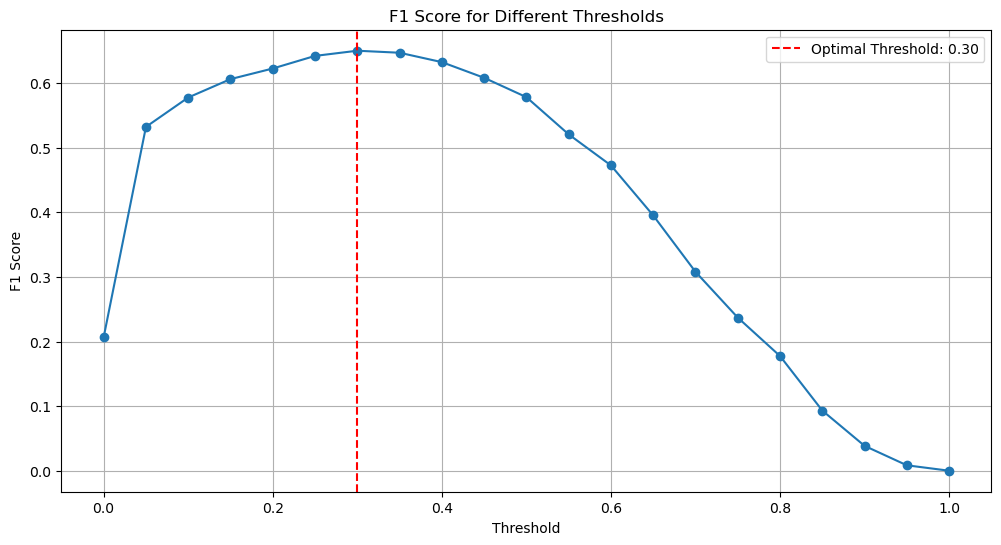

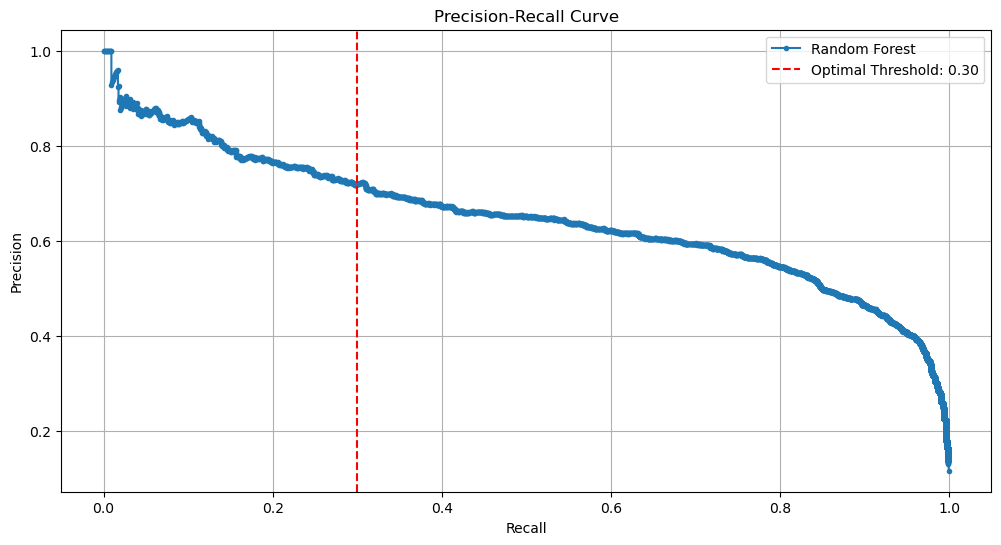

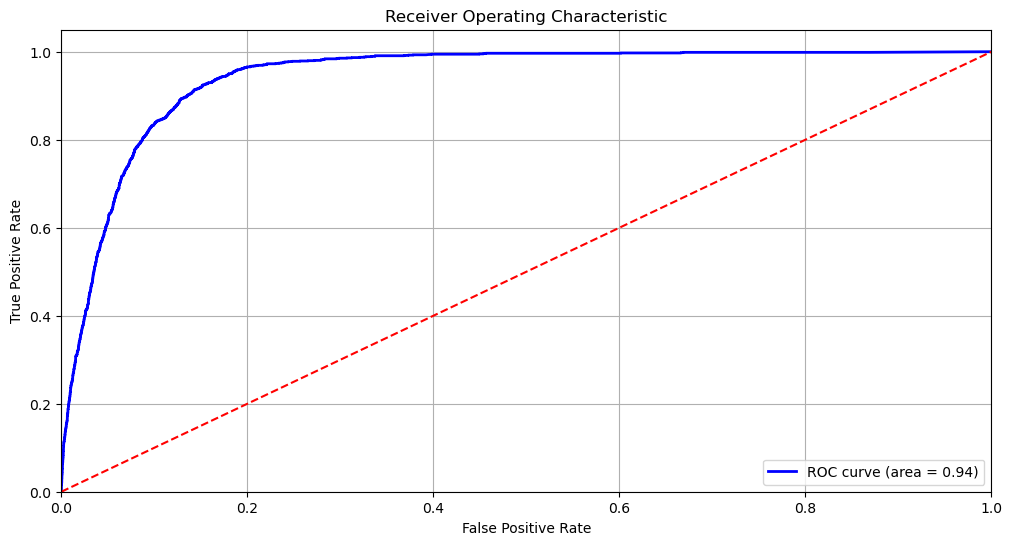

In [179]:

# Separate features and target variable
X = df_filtered.drop(columns=['y_encoded'])
y = df_filtered['y_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model on the scaled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Define the top 12 features
top_12_indices = indices[:12]
top_12_features = [X.columns[i] for i in top_12_indices]

# Filter the DataFrame to include only the top 12 features
df_top_12 = df_filtered[top_12_features + ['y_encoded']]

# Verify the new filtered DataFrame
print("Top 12 Features DataFrame Info:")
print(df_top_12.info())

# Split the data into features (X) and target (y)
X_top_12 = df_top_12.drop('y_encoded', axis=1)
y_top_12 = df_top_12['y_encoded']

# Split the data into training and testing sets
X_train_top_12, X_test_top_12, y_train_top_12, y_test_top_12 = train_test_split(X_top_12, y_top_12, test_size=0.3, random_state=42)

# Initialize the StandardScaler for the top 12 features
scaler_top_12 = StandardScaler()

# Fit and transform the training data for top 12 features
X_train_top_12_scaled = scaler_top_12.fit_transform(X_train_top_12)

# Transform the testing data for top 12 features
X_test_top_12_scaled = scaler_top_12.transform(X_test_top_12)

# Initial Model Training and Cross-Validation
clf_initial = RandomForestClassifier(random_state=42)
cross_val_scores = cross_val_score(clf_initial, X_train_top_12_scaled, y_train_top_12, cv=5, scoring='f1')
print(f'Initial cross-validation F1 scores: {cross_val_scores}')
print(f'Mean cross-validation F1 score: {np.mean(cross_val_scores)}')

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='f1', 
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train_top_12_scaled, y_train_top_12)
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Train the Model with Optimal Hyperparameters
clf_optimized = RandomForestClassifier(**best_params, random_state=42)
clf_optimized.fit(X_train_top_12_scaled, y_train_top_12)

# Predict probabilities on the test set
y_prob_top_12 = clf_optimized.predict_proba(X_test_top_12_scaled)[:, 1]

# Function to evaluate different thresholds
def evaluate_thresholds(y_true, y_prob):
    thresholds = np.arange(0.0, 1.05, 0.05)
    f1_scores = []
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        f1_scores.append(f1)
    return thresholds, f1_scores

# Evaluate different thresholds
thresholds, f1_scores = evaluate_thresholds(y_test_top_12, y_prob_top_12)

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f'Optimal threshold: {optimal_threshold}')

# Predict using the optimal threshold
y_pred_optimal = (y_prob_top_12 >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
print(classification_report(y_test_top_12, y_pred_optimal))

# Visualize the F1 scores for different thresholds
plt.figure(figsize=(12, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Thresholds')
plt.legend()
plt.grid()
plt.show()

# Plot precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_top_12, y_prob_top_12)
plt.figure(figsize=(12, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_top_12, y_prob_top_12)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Problem 9: Apply to all Classifiers

### Problem 10: Find the best model for each type of classifier

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [183]:
# Define the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),  # KNN doesn't have a class_weight parameter
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced')
}

# Define the parameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'KNN': {
        'n_neighbors': [5, 10, 20],
        'weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf']
    }
}

In [184]:
# Function to evaluate different thresholds
def evaluate_thresholds(y_true, y_prob):
    thresholds = np.arange(0.0, 1.05, 0.05)
    f1_scores = []
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        f1_scores.append(f1)
    return thresholds, f1_scores


In [185]:
# Train each classifier, find the optimal threshold, and store results
for name, clf in classifiers.items():
    print(f'\nTraining {name}...')
    
    # Initial Model Training and Cross-Validation
    cross_val_scores = cross_val_score(clf, X_train_top_12_scaled, y_train_top_12, cv=5, scoring='f1')
    print(f'Initial cross-validation F1 scores for {name}: {cross_val_scores}')
    print(f'Mean cross-validation F1 score for {name}: {np.mean(cross_val_scores)}')
    
    # Hyperparameter tuning using GridSearchCV
    param_grid = param_grids[name]
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
    
    start_time = time.time()
    grid_search.fit(X_train_top_12_scaled, y_train_top_12)
    end_time = time.time()
    computation_time = end_time - start_time
    best_params = grid_search.best_params_
    print(f'Best hyperparameters for {name}: {best_params}')
    print(f'Computation time for GridSearchCV: {computation_time:.2f} seconds')
   

  # Train the model with optimal hyperparameters
    clf_optimized = grid_search.best_estimator_
    clf_optimized.fit(X_train_top_12_scaled, y_train_top_12)
    
    # Predict probabilities on the test set
    y_prob_top_12 = clf_optimized.predict_proba(X_test_top_12_scaled)[:, 1]
    
    # Evaluate different thresholds
    thresholds, f1_scores = evaluate_thresholds(y_test_top_12, y_prob_top_12)
    
    # Find the optimal threshold
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    print(f'Optimal threshold for {name}: {optimal_threshold}')
    
    # Store results
    result = {
        'optimal_threshold': optimal_threshold,
        'thresholds': thresholds,
        'f1_scores': f1_scores,
        'y_prob': y_prob_top_12,
        'precision_recall_curve': precision_recall_curve(y_test_top_12, y_prob_top_12),
        'roc_curve': roc_curve(y_test_top_12, y_prob_top_12),
        'training_accuracy': accuracy_score(y_train_top_12, clf_optimized.predict(X_train_top_12_scaled)),
        'testing_accuracy': accuracy_score(y_test_top_12, (y_prob_top_12 >= optimal_threshold).astype(int)),
        'computation_time': computation_time
    }
    
    # Save results and model
    joblib.dump(result, f'{name}_results.pkl')
    joblib.dump(clf_optimized, f'{name}_model.pkl')



Training Random Forest...
Initial cross-validation F1 scores for Random Forest: [0.55526545 0.55135135 0.54185419 0.52957234 0.52920354]
Mean cross-validation F1 score for Random Forest: 0.5414493726596555
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Computation time for GridSearchCV: 223.24 seconds
Optimal threshold for Random Forest: 0.55

Training Logistic Regression...
Initial cross-validation F1 scores for Logistic Regression: [0.54492188 0.55685131 0.55162385 0.53940284 0.53391053]
Mean cross-validation F1 score for Logistic Regression: 0.5453420817180266
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Computation time for GridSearchCV: 1.02 seconds
Optimal threshold for Logistic Regression: 0.75

Training KNN...
Initial cross-validation F1 scores f

### Problem 11: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

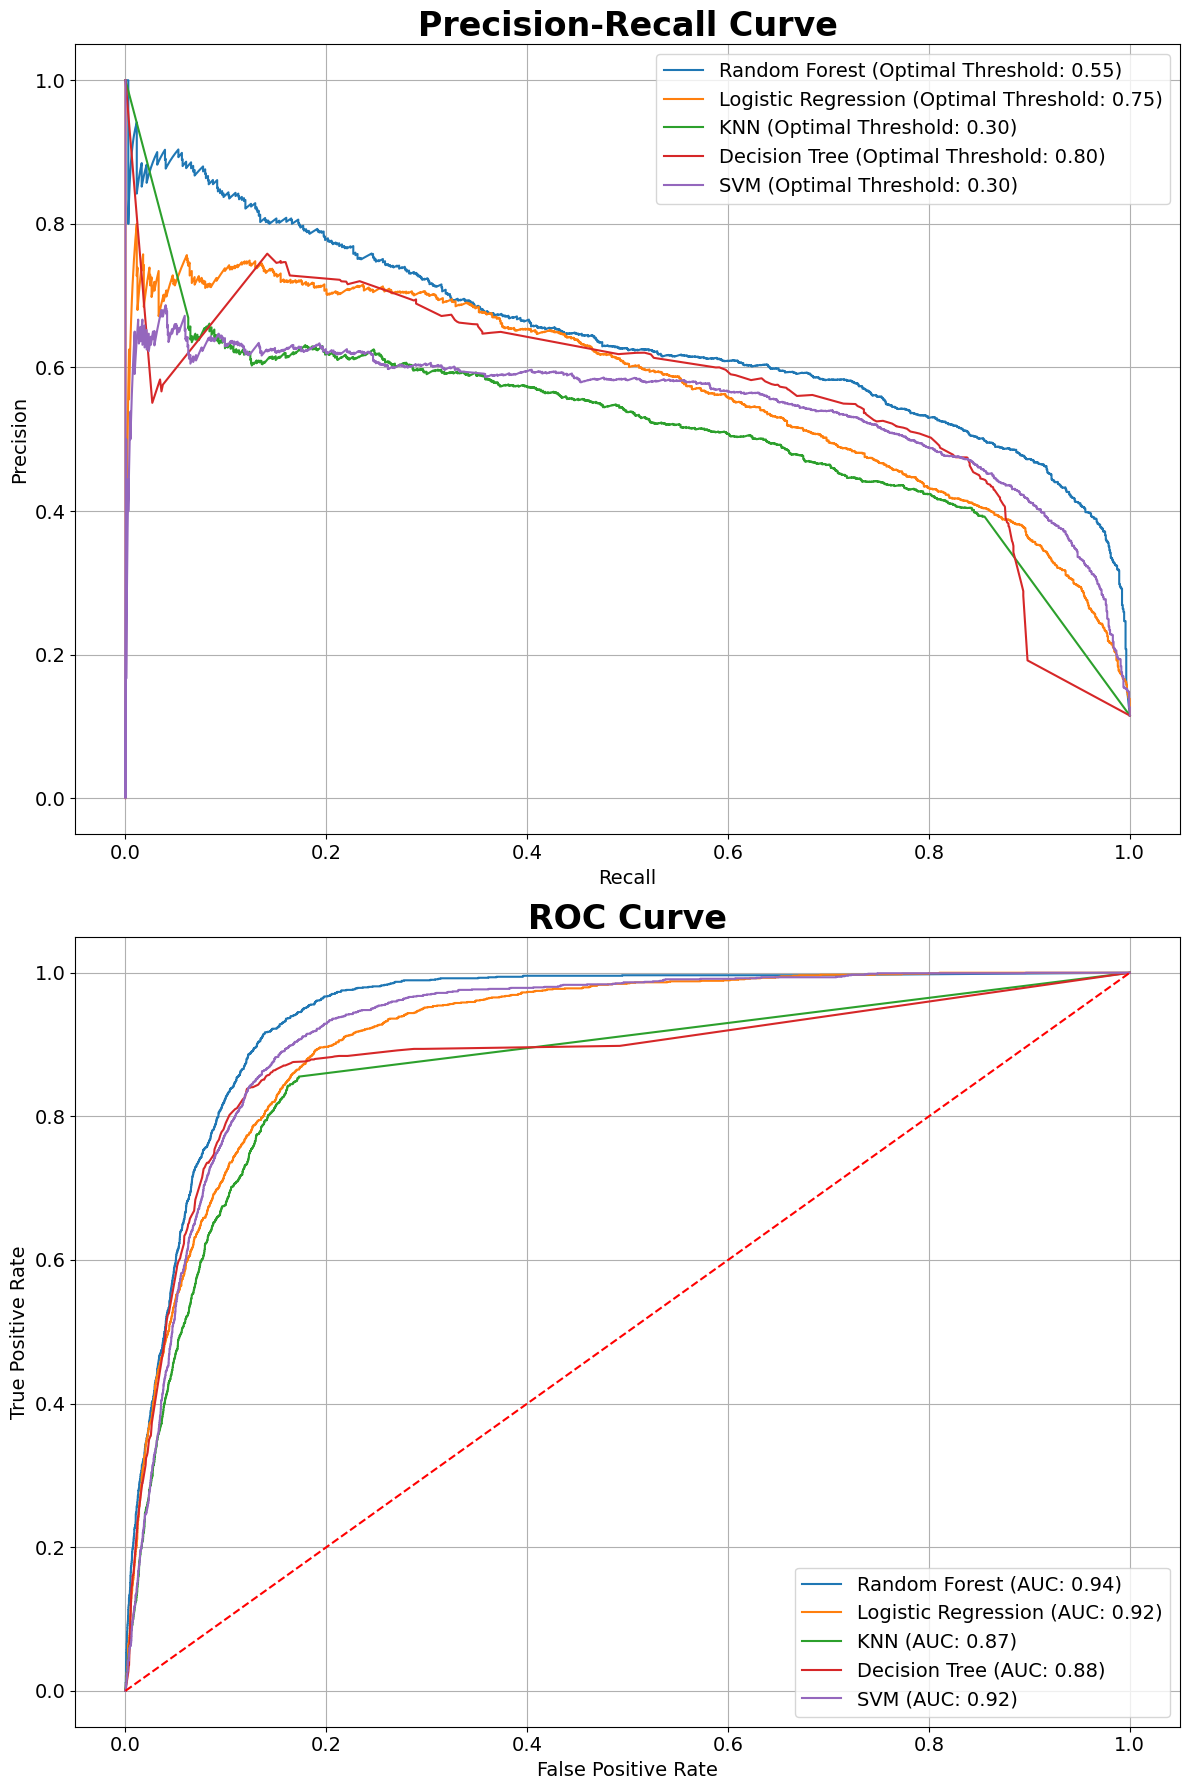

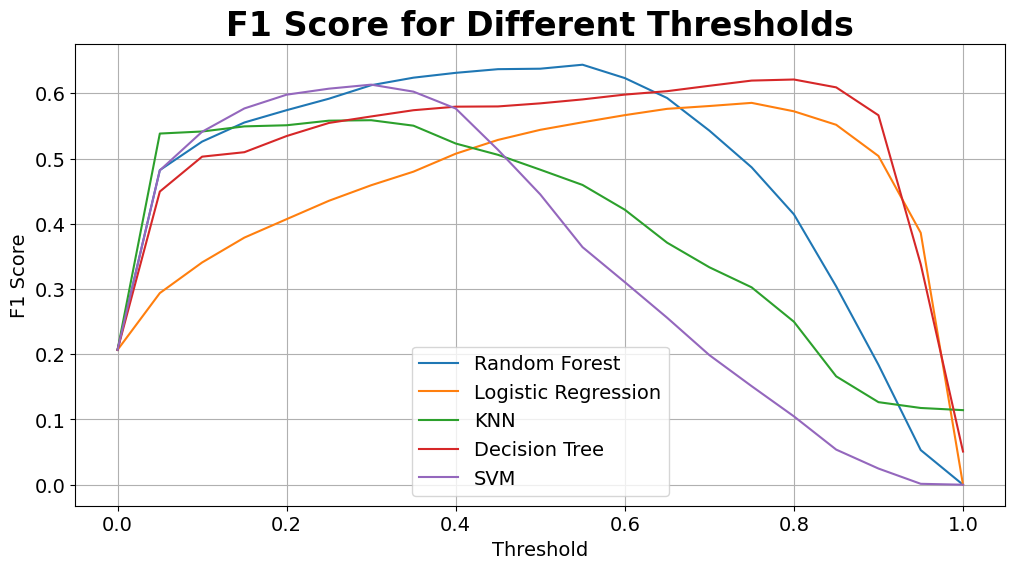


Random Forest Classifier:
Optimal Threshold: 0.55
Training Accuracy: 0.95
Testing Accuracy: 0.91
Computation Time: 223.24 seconds

Logistic Regression Classifier:
Optimal Threshold: 0.75
Training Accuracy: 0.84
Testing Accuracy: 0.89
Computation Time: 1.02 seconds

KNN Classifier:
Optimal Threshold: 0.30
Training Accuracy: 1.00
Testing Accuracy: 0.88
Computation Time: 9.69 seconds

Decision Tree Classifier:
Optimal Threshold: 0.80
Training Accuracy: 0.89
Testing Accuracy: 0.90
Computation Time: 5.61 seconds

SVM Classifier:
Optimal Threshold: 0.30
Training Accuracy: 0.85
Testing Accuracy: 0.89
Computation Time: 711.70 seconds


In [187]:
# Classifier names
classifier_names = ['Random Forest', 'Logistic Regression', 'KNN', 'Decision Tree', 'SVM']

# Load results
results = {}
for name in classifier_names:
    results[name] = joblib.load(f'{name}_results.pkl')

# Plotting results
plt.figure(figsize=(12, 18))

# Precision-Recall Curve
plt.subplot(2, 1, 1)
for name in classifier_names:
    precision, recall, _ = results[name]['precision_recall_curve']
    plt.plot(recall, precision, label=f'{name} (Optimal Threshold: {results[name]["optimal_threshold"]:.2f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=24, weight='bold')
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

# ROC Curve
plt.subplot(2, 1, 2)
for name in classifier_names:
    fpr, tpr, _ = results[name]['roc_curve']
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC: {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=24, weight='bold')
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


# F1 Score for Different Thresholds
plt.figure(figsize=(12, 6))
for name in classifier_names:
    thresholds = results[name]['thresholds']
    f1_scores = results[name]['f1_scores']
    plt.plot(thresholds, f1_scores, label=f'{name}')
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.title('F1 Score for Different Thresholds', fontsize=24, weight='bold')
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Print final evaluation metrics
for name in classifier_names:
    print(f'\n{name} Classifier:')
    print(f'Optimal Threshold: {results[name]["optimal_threshold"]:.2f}')
    print(f'Training Accuracy: {results[name]["training_accuracy"]:.2f}')
    print(f'Testing Accuracy: {results[name]["testing_accuracy"]:.2f}')
    print(f'Computation Time: {results[name]["computation_time"]:.2f} seconds')


##### Questions